In [2]:
import os
os.getcwd()


'/Users/anacarolinaalexandrino/Documents/Info_Work/Conversafilho/notebooks'

In [3]:
os.listdir("../data/raw/text")


['00006949-Rio Tietê Um grande rio sofrendo pe.txt', '_chat 3.txt']

In [4]:
import pandas as pd
import re

# Expressão regular para o formato do WhatsApp
pattern = re.compile(
    r'^\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] ([^:]+): (.*)$'
)

def load_whatsapp_chat(filepath):
    rows = []

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()

            match = pattern.match(line)
            if match:
                date, time, sender, message = match.groups()
                dt = pd.to_datetime(f"{date} {time}", dayfirst=True)

                rows.append({
                    "datetime": dt,
                    "sender": sender,
                    "message": message
                })

    return pd.DataFrame(rows)

# Caminho correto:
filepath = "../data/raw/text/_chat 3.txt"

df = load_whatsapp_chat(filepath)

df.head(), len(df)


(             datetime           sender  \
 0 2023-01-20 07:49:29       Edgar vivo   
 1 2023-01-20 07:49:29       Edgar vivo   
 2 2023-01-20 08:56:01  Ana Alexandrino   
 3 2023-01-20 09:14:27       Edgar vivo   
 4 2023-01-21 09:04:48       Edgar vivo   
 
                                              message  
 0  ‎As mensagens e ligações são protegidas com a ...  
 1                                                 Oi  
 2                                              Filho  
 3                                                 Oi  
 4                                      O mãeeeeeeeee  ,
 6568)

In [5]:
df.head(10)


,datetime,sender,message
0,2023-01-20 07:49:29,Edgar vivo,‎As mensagens e ligações são protegidas com a ...
1,2023-01-20 07:49:29,Edgar vivo,Oi
2,2023-01-20 08:56:01,Ana Alexandrino,Filho
3,2023-01-20 09:14:27,Edgar vivo,Oi
4,2023-01-21 09:04:48,Edgar vivo,O mãeeeeeeeee
5,2023-01-21 17:08:45,Edgar vivo,Mãe o Luís Soares está no Grêmio
6,2023-01-21 17:09:08,Edgar vivo,está jogando agora
7,2023-01-21 17:13:01,Edgar vivo,Lu Soares no Brasil 🇧🇷 🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇺🇾🇺🇾🇺🇾🇺🇾🇺🇾
8,2023-01-21 17:14:28,Edgar vivo,Grêmio 😝😝😝😝😝
9,2023-01-21 17:23:45,Edgar vivo,😄😄😄😄😄


In [6]:
df.tail(10)

,datetime,sender,message
6558,2025-11-16 21:32:13,Edgar vivo,Não
6559,2025-11-17 14:41:51,Ana Alexandrino,Já tomou banho ?
6560,2025-11-17 14:42:01,Ana Alexandrino,A doutora pediu pra remarcar
6561,2025-11-17 14:42:10,Edgar vivo,Q horas
6562,2025-11-17 14:42:17,Ana Alexandrino,Quarta
6563,2025-11-17 14:42:42,Ana Alexandrino,Quer ligar no salão e ver se pode antecipar?
6564,2025-11-17 14:42:52,Edgar vivo,Não
6565,2025-11-17 14:43:00,Ana Alexandrino,(011) 2615-1226
6566,2025-11-17 14:43:17,Ana Alexandrino,Liga lá e veja se podem atender o Edgar antes
6567,2025-11-17 18:17:18,Ana Alexandrino,Q horas o jantar?


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6568 entries, 0 to 6567
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6568 non-null   datetime64[ns]
 1   sender    6568 non-null   object        
 2   message   6568 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 154.1+ KB


In [8]:
df['sender'].value_counts()

sender
Ana Alexandrino    3338
Edgar vivo         3230
Name: count, dtype: int64

In [9]:
df[df['message'].str.contains("omitido", case=False, na=False)]['message'].value_counts()

Series([], Name: count, dtype: int64)

In [10]:
# ver se temlinhas estranhas #
def invalid_lines(filepath):
    bad = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            if not pattern.match(line.strip()):
                bad.append(line.strip())
    return bad

bad_lines = invalid_lines(filepath)
len(bad_lines)

2057

In [11]:
bad_lines[:20]

['\u200e[20/01/2023, 07:54:52] Ana Alexandrino: \u200eCartão do contato omitido',
 '\u200e[21/01/2023, 09:05:03] Ana Alexandrino: \u200efigurinha omitida',
 '\u200e[21/01/2023, 09:10:25] Edgar vivo: \u200evídeo omitido',
 '\u200e[21/01/2023, 17:09:46] Edgar vivo: \u200eáudio ocultado',
 '\u200e[21/01/2023, 17:15:14] Edgar vivo: \u200eáudio ocultado',
 '\u200e[21/01/2023, 17:22:32] Edgar vivo: \u200eáudio ocultado',
 '\u200e[21/01/2023, 17:22:44] Edgar vivo: \u200eáudio ocultado',
 '\u200e[21/01/2023, 17:22:57] Edgar vivo: \u200eáudio ocultado',
 '\u200e[21/01/2023, 18:06:08] Edgar vivo: \u200eimagem ocultada',
 '\u200e[21/01/2023, 18:34:35] Ana Alexandrino: \u200eáudio ocultado',
 '\u200e[21/01/2023, 18:36:10] Ana Alexandrino: \u200eáudio ocultado',
 '\u200e[21/01/2023, 19:41:13] Edgar vivo: \u200eáudio ocultado',
 '\u200e[22/01/2023, 07:11:34] Edgar vivo: \u200eimagem ocultada',
 '\u200e[22/01/2023, 07:11:59] Edgar vivo: \u200eáudio ocultado',
 '\u200e[22/01/2023, 08:01:20] Edgar vivo

In [12]:
import pandas as pd
import re

# Novo padrão que aceita \u200e no início
pattern = re.compile(
    r'^\u200e?\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] ([^:]+): (.*)$'
)

def load_whatsapp_chat(filepath):
    rows = []

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()

            match = pattern.match(line)
            if match:
                date, time, sender, message = match.groups()
                dt = pd.to_datetime(f"{date} {time}", dayfirst=True)

                rows.append({
                    "datetime": dt,
                    "sender": sender,
                    "message": message
                })

    return pd.DataFrame(rows)

In [13]:
df = load_whatsapp_chat(filepath)
len(df), df.head()

(7704,
              datetime           sender  \
 0 2023-01-20 07:49:29       Edgar vivo   
 1 2023-01-20 07:49:29       Edgar vivo   
 2 2023-01-20 07:54:52  Ana Alexandrino   
 3 2023-01-20 08:56:01  Ana Alexandrino   
 4 2023-01-20 09:14:27       Edgar vivo   
 
                                              message  
 0  ‎As mensagens e ligações são protegidas com a ...  
 1                                                 Oi  
 2                         ‎Cartão do contato omitido  
 3                                              Filho  
 4                                                 Oi  )

In [14]:
bad_lines = invalid_lines(filepath)
len(bad_lines)

921

In [16]:
import pandas as pd
import re

# Padrão que aceita o caractere invisível \u200e antes do [
pattern = re.compile(
    r'^\u200e?\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] ([^:]+): (.*)$'
)

def load_whatsapp_chat(filepath):
    rows = []
    current = None  # mensagem que está sendo construída

    with open(filepath, 'r', encoding='utf-8') as f:
        for raw_line in f:
            line = raw_line.rstrip('\n').strip()

            if not line:
                # linha vazia -> ignora
                continue

            match = pattern.match(line)
            if match:
                # Fechar a mensagem anterior, se existir
                if current is not None:
                    rows.append(current)

                date, time, sender, message = match.groups()
                dt = pd.to_datetime(f"{date} {time}", dayfirst=True)

                current = {
                    "datetime": dt,
                    "sender": sender,
                    "message": message
                }
            else:
                # Não bateu com o padrão: provavelmente é continuação da mensagem anterior
                if current is not None:
                    current["message"] += "\n" + line
                else:
                    # Linha perdida antes de qualquer mensagem (raro)
                    # Se quiser, você pode guardar isso em um log
                    pass

    # Não esquecer de adicionar a última mensagem
    if current is not None:
        rows.append(current)

    return pd.DataFrame(rows)

In [17]:
filepath = "../data/raw/text/_chat 3.txt"
df = load_whatsapp_chat(filepath)
len(df), df.head()

(7704,
              datetime           sender  \
 0 2023-01-20 07:49:29       Edgar vivo   
 1 2023-01-20 07:49:29       Edgar vivo   
 2 2023-01-20 07:54:52  Ana Alexandrino   
 3 2023-01-20 08:56:01  Ana Alexandrino   
 4 2023-01-20 09:14:27       Edgar vivo   
 
                                              message  
 0  ‎As mensagens e ligações são protegidas com a ...  
 1                                                 Oi  
 2                         ‎Cartão do contato omitido  
 3                                              Filho  
 4                                                 Oi  )

In [18]:
def invalid_lines(filepath):
    bad = []
    started = False

    with open(filepath, 'r', encoding='utf-8') as f:
        for raw_line in f:
            line = raw_line.rstrip('\n').strip()
            if not line:
                continue

            match = pattern.match(line)
            if match:
                # linha de mensagem normal
                started = True
            else:
                # se já começamos a ler mensagens, isso deve ser continuação
                # então não é "bad"
                if not started:
                    bad.append(line)

    return bad

bad_lines = invalid_lines(filepath)
len(bad_lines), bad_lines[:20]

(0, [])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  7704 non-null   datetime64[ns]
 1   sender    7704 non-null   object        
 2   message   7704 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 180.7+ KB


In [20]:
df['sender'].value_counts()

sender
Ana Alexandrino    3990
Edgar vivo         3714
Name: count, dtype: int64

In [21]:
df.sort_values('datetime').head(5), df.sort_values('datetime').tail(5)

(             datetime           sender  \
 0 2023-01-20 07:49:29       Edgar vivo   
 1 2023-01-20 07:49:29       Edgar vivo   
 2 2023-01-20 07:54:52  Ana Alexandrino   
 3 2023-01-20 08:56:01  Ana Alexandrino   
 4 2023-01-20 09:14:27       Edgar vivo   
 
                                              message  
 0  ‎As mensagens e ligações são protegidas com a ...  
 1                                                 Oi  
 2                         ‎Cartão do contato omitido  
 3                                              Filho  
 4                                                 Oi  ,
                 datetime           sender  \
 7699 2025-11-17 14:42:42  Ana Alexandrino   
 7700 2025-11-17 14:42:52       Edgar vivo   
 7701 2025-11-17 14:43:00  Ana Alexandrino   
 7702 2025-11-17 14:43:17  Ana Alexandrino   
 7703 2025-11-17 18:17:18  Ana Alexandrino   
 
                                                 message  
 7699       Quer ligar no salão e ver se pode antecipar?  
 7700  

In [22]:
import numpy as np

def classify_message(msg: str) -> str:
    m = msg.lower()
    if "áudio ocultado" in m or "audio ocultado" in m:
        return "audio"
    if "imagem ocultada" in m:
        return "image"
    if "vídeo omitido" in m or "video omitido" in m:
        return "video"
    if "figurinha omitida" in m:
        return "sticker"
    if "cartão do contato omitido" in m:
        return "contact"
    return "text"

df["content_type"] = df["message"].apply(classify_message)
df["content_type"].value_counts()

content_type
text       6591
image       482
sticker     369
audio       153
video       106
contact       3
Name: count, dtype: int64

Número total de mensagens: 7704

Primeiras linhas:


,datetime,sender,message
0,2023-01-20 07:49:29,Edgar vivo,‎As mensagens e ligações são protegidas com a ...
1,2023-01-20 07:49:29,Edgar vivo,Oi
2,2023-01-20 07:54:52,Ana Alexandrino,‎Cartão do contato omitido
3,2023-01-20 08:56:01,Ana Alexandrino,Filho
4,2023-01-20 09:14:27,Edgar vivo,Oi



Últimas linhas:


,datetime,sender,message
7699,2025-11-17 14:42:42,Ana Alexandrino,Quer ligar no salão e ver se pode antecipar?
7700,2025-11-17 14:42:52,Edgar vivo,Não
7701,2025-11-17 14:43:00,Ana Alexandrino,(011) 2615-1226
7702,2025-11-17 14:43:17,Ana Alexandrino,Liga lá e veja se podem atender o Edgar antes\...
7703,2025-11-17 18:17:18,Ana Alexandrino,Q horas o jantar?\n19?



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  7704 non-null   datetime64[ns]
 1   sender    7704 non-null   object        
 2   message   7704 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 180.7+ KB


None


Mensagens por remetente:


sender
Ana Alexandrino    3990
Edgar vivo         3714
Name: count, dtype: int64


Exemplo de linhas com colunas derivadas:


,datetime,sender,message,date,month,hour
0,2023-01-20 07:49:29,Edgar vivo,‎As mensagens e ligações são protegidas com a ...,2023-01-20,2023-01,7
1,2023-01-20 07:49:29,Edgar vivo,Oi,2023-01-20,2023-01,7
2,2023-01-20 07:54:52,Ana Alexandrino,‎Cartão do contato omitido,2023-01-20,2023-01,7
3,2023-01-20 08:56:01,Ana Alexandrino,Filho,2023-01-20,2023-01,8
4,2023-01-20 09:14:27,Edgar vivo,Oi,2023-01-20,2023-01,9



Distribuição por tipo de conteúdo:


content_type
text       6591
image       482
sticker     369
audio       153
video       106
contact       3
Name: count, dtype: int64


Número de mensagens de TEXTO (sem áudio/imagem/etc.): 6591

Mensagens por REMETENTE:


sender
Ana Alexandrino    3990
Edgar vivo         3714
Name: count, dtype: int64


Mensagens por DIA (primeiros e últimos 5 dias):


date
2023-01-20     5
2023-01-21    20
2023-01-22    17
2023-01-23     4
2023-01-24     4
dtype: int64

date
2025-11-13     5
2025-11-14     2
2025-11-15    11
2025-11-16     8
2025-11-17     9
dtype: int64


Mensagens por MÊS:


month
2023-01     63
2023-02     80
2023-04     52
2023-05    188
2023-06    258
2023-07     60
2023-11    285
2023-12     58
2024-01    386
2024-02    158
2024-03    567
2024-04    178
2024-05    310
2024-06    279
2024-07    396
2024-08    348
2024-09    267
2024-10    198
2024-11    348
2024-12    271
2025-01    406
2025-02    250
2025-03    361
2025-04    133
2025-05    167
2025-06    170
2025-07    408
2025-08    268
2025-09    175
2025-10    335
2025-11    281
Freq: M, dtype: int64


Mensagens por HORA do dia:


hour
0       5
1       1
4       1
5      21
6     230
7     236
8     275
9     528
10    296
11    426
12    316
13    689
14    534
15    435
16    568
17    483
18    552
19    514
20    569
21    632
22    291
23    102
dtype: int64

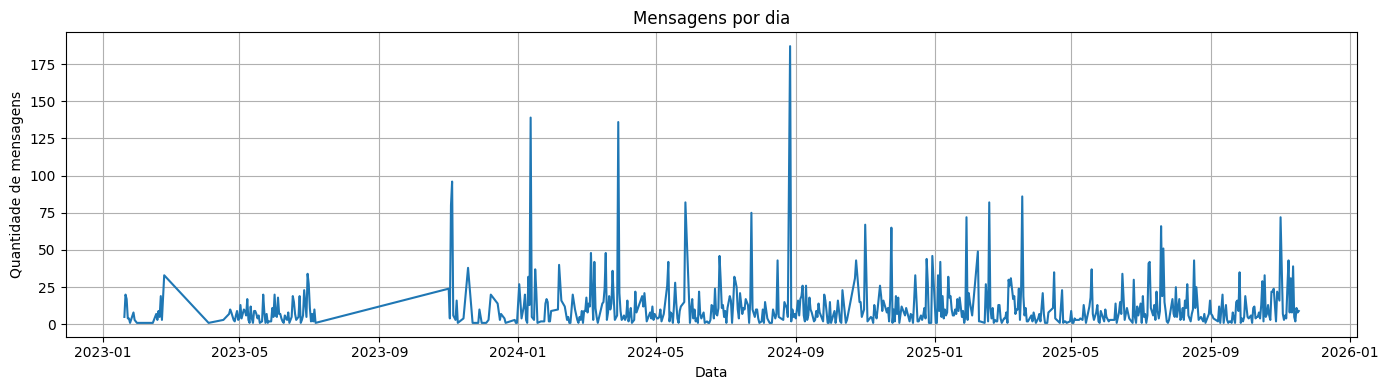

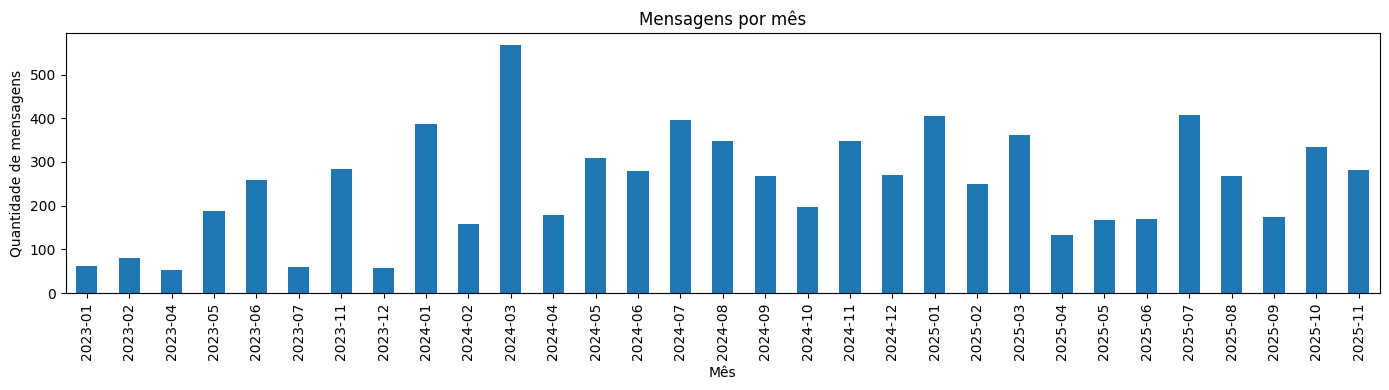

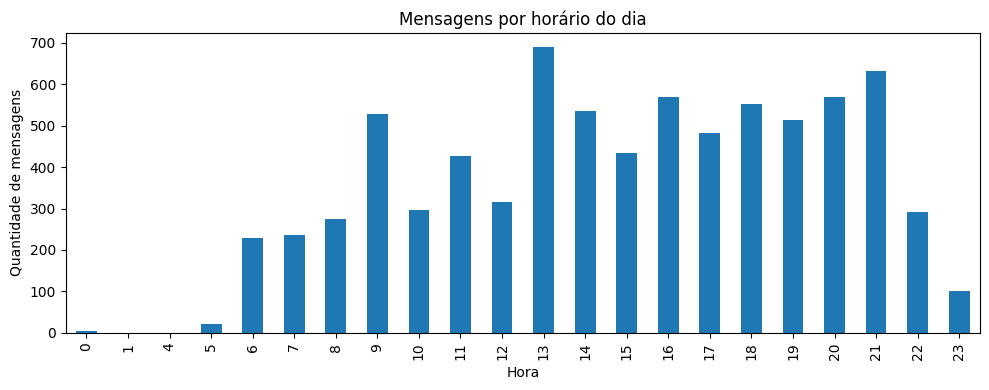


Arquivo salvo em: ../data/processed/conversas_tratadas.csv
Pronto! Dados carregados, limpos, classificados e com análises básicas geradas.


In [25]:
# ============================================================
# ETAPA 0 - IMPORTAÇÕES BÁSICAS
# ============================================================

import pandas as pd
import re
import matplotlib.pyplot as plt

# (opcional se o notebook poluir de warnings)
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# ETAPA 1 - DEFINIR PADRÃO (REGEX) E FUNÇÃO PARA CARREGAR O CHAT
# ============================================================

# Padrão que aceita também o caractere invisível \u200e antes do [
pattern = re.compile(
    r'^\u200e?\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] ([^:]+): (.*)$'
)

def load_whatsapp_chat(filepath: str) -> pd.DataFrame:
    """
    Lê um arquivo de exportação do WhatsApp no formato:
    [20/01/2023, 07:49:29] Nome: Mensagem
    (aceitando também o caractere invisível \u200e no início)
    
    - Junta corretamente mensagens em múltiplas linhas.
    - Retorna um DataFrame com colunas:
        datetime, sender, message
    """
    rows = []
    current = None  # mensagem que está sendo construída

    with open(filepath, 'r', encoding='utf-8') as f:
        for raw_line in f:
            # remove quebra de linha e espaços nas pontas
            line = raw_line.rstrip('\n').strip()

            if not line:
                # linha vazia -> ignora
                continue

            match = pattern.match(line)
            if match:
                # Fechar a mensagem anterior, se existir
                if current is not None:
                    rows.append(current)

                date, time, sender, message = match.groups()
                dt = pd.to_datetime(f"{date} {time}", dayfirst=True)

                current = {
                    "datetime": dt,
                    "sender": sender,
                    "message": message
                }
            else:
                # Não bateu com o padrão:
                # se já temos uma mensagem em construção,
                # consideramos que esta linha é continuação da anterior
                if current is not None:
                    current["message"] += "\n" + line
                else:
                    # Linha solta antes de qualquer mensagem (raro). Ignoramos.
                    pass

    # Adicionar a última mensagem construída, se houver
    if current is not None:
        rows.append(current)

    df = pd.DataFrame(rows)

    # Ordenar por data/hora, só pra garantir
    df = df.sort_values("datetime").reset_index(drop=True)
    return df

# ============================================================
# ETAPA 2 - CARREGAR O ARQUIVO E FAZER CHECAGENS BÁSICAS
# ============================================================

filepath = "../data/raw/text/_chat 3.txt"  # ajuste se o nome/caminho mudar

df = load_whatsapp_chat(filepath)

print("Número total de mensagens:", len(df))
print("\nPrimeiras linhas:")
display(df.head())

print("\nÚltimas linhas:")
display(df.tail())

print("\nInformações do DataFrame:")
display(df.info())

print("\nMensagens por remetente:")
display(df['sender'].value_counts())

# ============================================================
# ETAPA 3 - CRIAR COLUNAS DERIVADAS (DATA, MÊS, HORA)
# ============================================================

# Data (sem hora)
df["date"] = df["datetime"].dt.date

# Mês (como período, ex: 2023-01)
df["month"] = df["datetime"].dt.to_period("M")

# Hora (0 a 23)
df["hour"] = df["datetime"].dt.hour

print("\nExemplo de linhas com colunas derivadas:")
display(df.head())

# ============================================================
# ETAPA 4 - CLASSIFICAR TIPO DE CONTEÚDO (TEXTO, ÁUDIO, IMAGEM, ETC.)
# ============================================================

def classify_message(msg: str) -> str:
    """
    Classifica a mensagem em:
    - text
    - audio
    - image
    - video
    - sticker
    - contact
    usando palavras-chave presentes no texto.
    """
    m = msg.lower()
    if "áudio ocultado" in m or "audio ocultado" in m:
        return "audio"
    if "imagem ocultada" in m:
        return "image"
    if "vídeo omitido" in m or "video omitido" in m:
        return "video"
    if "figurinha omitida" in m:
        return "sticker"
    if "cartão do contato omitido" in m:
        return "contact"
    return "text"

df["content_type"] = df["message"].apply(classify_message)

print("\nDistribuição por tipo de conteúdo:")
display(df["content_type"].value_counts())

# Também podemos criar um DataFrame só com texto
df_text = df[df["content_type"] == "text"].copy()
print("\nNúmero de mensagens de TEXTO (sem áudio/imagem/etc.):", len(df_text))

# ============================================================
# ETAPA 5 - ESTATÍSTICAS SIMPLES (POR PESSOA, POR DIA, POR MÊS, POR HORA)
# ============================================================

print("\nMensagens por REMETENTE:")
display(df["sender"].value_counts())

print("\nMensagens por DIA (primeiros e últimos 5 dias):")
df_per_day = df.groupby("date").size()
display(df_per_day.head())
display(df_per_day.tail())

print("\nMensagens por MÊS:")
df_per_month = df.groupby("month").size()
display(df_per_month)

print("\nMensagens por HORA do dia:")
df_per_hour = df.groupby("hour").size().sort_index()
display(df_per_hour)

# ============================================================
# ETAPA 6 - GRÁFICOS BÁSICOS
# ============================================================

# --- 6.1. Mensagens por dia (série temporal) ---
plt.figure(figsize=(14, 4))
df_per_day.plot()
plt.title("Mensagens por dia")
plt.xlabel("Data")
plt.ylabel("Quantidade de mensagens")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 6.2. Mensagens por mês (barras) ---
plt.figure(figsize=(14, 4))
df_per_month.plot(kind="bar")
plt.title("Mensagens por mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de mensagens")
plt.tight_layout()
plt.show()

# --- 6.3. Mensagens por hora do dia (barras) ---
plt.figure(figsize=(10, 4))
df_per_hour.plot(kind="bar")
plt.title("Mensagens por horário do dia")
plt.xlabel("Hora")
plt.ylabel("Quantidade de mensagens")
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA 7 - (OPCIONAL) SALVAR UM DATASET LIMPO PARA USO FUTURO
# ============================================================

# Por exemplo, salvando apenas as colunas principais:
cols_to_save = ["datetime", "sender", "message", "content_type", "date", "month", "hour"]
df[cols_to_save].to_csv("../data/processed/conversas_tratadas.csv", index=False)

print("\nArquivo salvo em: ../data/processed/conversas_tratadas.csv")
print("Pronto! Dados carregados, limpos, classificados e com análises básicas geradas.")

Total de mensagens do Edgar: 3714

Mensagens do Edgar por mês:


month
2023-01     46
2023-02     56
2023-04     50
2023-05    188
2023-06    258
2023-07     60
2023-11    126
2023-12     37
2024-01    241
2024-02     65
2024-03    269
2024-04     83
2024-05     98
2024-06    144
2024-07    192
2024-08    240
2024-09    128
2024-10     72
2024-11     96
2024-12    122
2025-01    151
2025-02    102
2025-03    142
2025-04     65
2025-05     66
2025-06     73
2025-07    201
2025-08     75
2025-09     65
2025-10     98
2025-11    105
Freq: M, dtype: int64

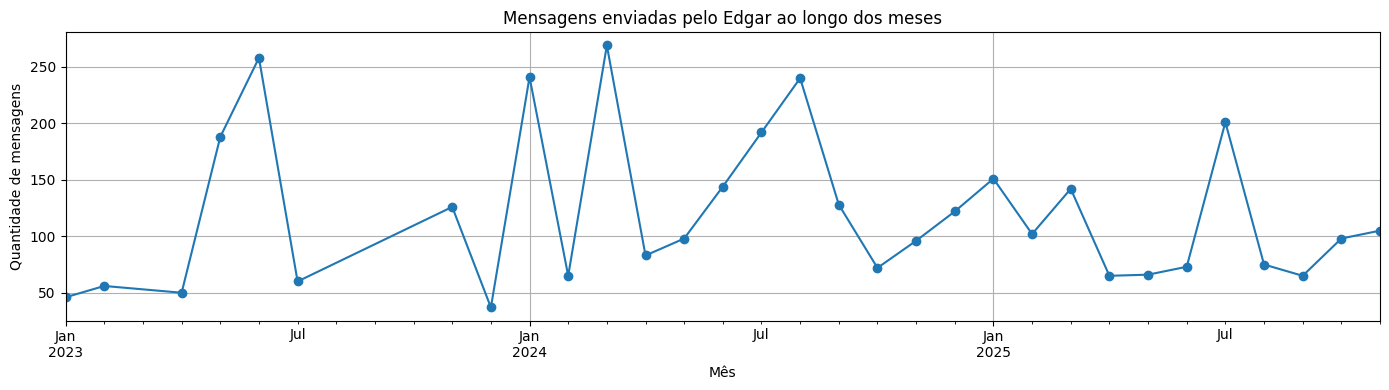


Coeficiente da tendência: -0.6532258064516099
📉 A tendência é de queda: ele está mandando menos mensagens ao longo do tempo.


In [26]:
# ============================================================
# ANÁLISE: QUANTIDADE DE MENSAGENS DO EDGAR AO LONGO DOS MESES
# ============================================================

# 1. Filtrar apenas mensagens enviadas por ele
df_edgar = df[df["sender"].str.contains("Edgar", case=False)].copy()

print("Total de mensagens do Edgar:", len(df_edgar))

# 2. Agrupar por mês
msgs_por_mes = df_edgar.groupby("month").size()

print("\nMensagens do Edgar por mês:")
display(msgs_por_mes)

# 3. Plotar gráfico
plt.figure(figsize=(14,4))
msgs_por_mes.plot(kind="line", marker="o")

plt.title("Mensagens enviadas pelo Edgar ao longo dos meses")
plt.xlabel("Mês")
plt.ylabel("Quantidade de mensagens")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Cálculo de tendência (para ver claramente se caiu ou subiu)
import numpy as np

# Transformar período em número para regressão
meses_num = np.arange(len(msgs_por_mes))
valores = msgs_por_mes.values

# Ajuste de linha (tendência)
coef = np.polyfit(meses_num, valores, 1)
tendencia = coef[0]

print("\nCoeficiente da tendência:", tendencia)

if tendencia < 0:
    print("📉 A tendência é de queda: ele está mandando menos mensagens ao longo do tempo.")
elif tendencia > 0:
    print("📈 A tendência é de alta: ele está mandando mais mensagens ao longo do tempo.")
else:
    print("➖ A tendência é estável: não há aumento nem queda.")

In [27]:
pip install statsmodels scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 36.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [28]:
import sys
!{sys.executable} -m pip install statsmodels scikit-learn

Remetentes encontrados:
sender
Ana Alexandrino    3990
Edgar vivo         3714
Name: count, dtype: int64

Visão geral mensal:


,month,msgs_total,msgs_filho,msgs_ana,dias_ativos,media_tam_msg,prop_filho,t
0,2023-01,63,46,17,9,21.920635,0.730159,0
1,2023-02,80,56,24,8,17.287500,0.700000,1
2,2023-04,52,50,2,10,44.480769,0.961538,2
3,2023-05,188,188,0,30,46.000000,1.000000,3
4,2023-06,258,258,0,30,46.000000,1.000000,4



Resumo do modelo de tendência (OLS) - mensagens do filho por mês:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.2279
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.637
Time:                        19:36:57   Log-Likelihood:                -173.82
No. Observations:                  31   AIC:                             351.6
Df Residuals:                      29   BIC:                             354.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

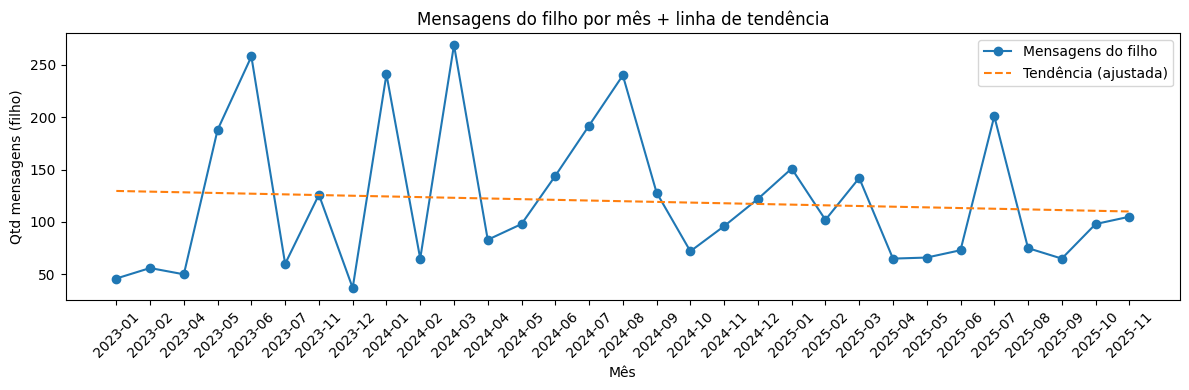


Simulação bootstrap para testar se a queda é forte:
Beta1 observado: -0.6532258064516115
p-valor (prob de observar uma queda tão ou mais forte por acaso): 0.32
➡️ Resultado não tão forte estatisticamente: a tendência pode estar dentro da variação aleatória.


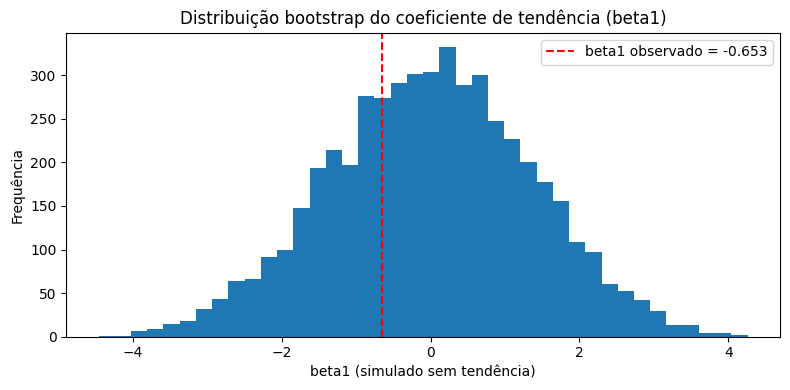


Clusters (fases) de meses:


,month,msgs_filho,msgs_ana,prop_filho,cluster
0,2023-01,46,17,0.730159,2
1,2023-02,56,24,0.700000,2
2,2023-04,50,2,0.961538,0
3,2023-05,188,0,1.000000,0
4,2023-06,258,0,1.000000,0
5,2023-07,60,0,1.000000,0
6,2023-11,126,159,0.442105,2
7,2023-12,37,21,0.637931,2
8,2024-01,241,145,0.624352,1
9,2024-02,65,93,0.411392,2


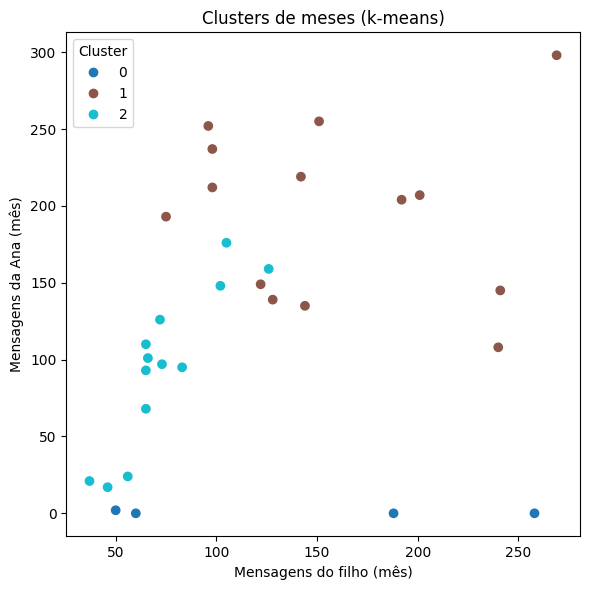


================ RESUMO INTERPRETATIVO ================
- Número de meses analisados: 31
- Média de mensagens do filho por mês: 119.8
- Desvio padrão das mensagens do filho por mês: 67.3
- Coeficiente de tendência (beta1): -0.653
- p-valor do teste via simulação bootstrap: 0.320

Clusters encontrados (fases):
         msgs_filho    msgs_ana  prop_filho
cluster                                    
0        139.000000    0.500000    0.990385
1        156.928571  196.642857    0.438664
2         73.923077   95.000000    0.478304


In [29]:
# ============================================================
# ETAPA A - PREPARAR DADOS MENSAIS PARA ANÁLISES AVANÇADAS
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Garante colunas básicas
df["date"] = df["datetime"].dt.date
df["month"] = df["datetime"].dt.to_period("M")
df["msg_len"] = df["message"].str.len()

# Identificar o nome "do filho" de forma automática (suposição: o outro é você)
print("Remetentes encontrados:")
print(df["sender"].value_counts())

# Se quiser, você pode fixar manualmente aqui, se preferir:
nome_filho = "Edgar vivo"
nome_ana   = "Ana Alexandrino"

# Filtrar apenas meses onde o filho aparece
df["is_filho"] = df["sender"] == nome_filho
df["is_ana"]   = df["sender"] == nome_ana

# Agregado mensal
monthly = df.groupby("month").agg(
    msgs_total=("message", "size"),
    msgs_filho=("is_filho", "sum"),
    msgs_ana=("is_ana", "sum"),
    dias_ativos=("date", lambda x: x.nunique()),
    media_tam_msg=("msg_len", "mean")
).reset_index()

# Taxa: proporção das mensagens do filho
monthly["prop_filho"] = monthly["msgs_filho"] / monthly["msgs_total"]

# Índice de tempo para modelos (0,1,2,3,...)
monthly = monthly.sort_values("month").reset_index(drop=True)
monthly["t"] = np.arange(len(monthly))

print("\nVisão geral mensal:")
display(monthly.head())

# ============================================================
# ETAPA B - MODELO DE TENDÊNCIA (REGRESSÃO) PARA MENSAGENS DO FILHO
# ============================================================

# Modelo: msgs_filho ~ tempo (t)
y = monthly["msgs_filho"].values
X = sm.add_constant(monthly["t"].values)  # constante + tempo

model = sm.OLS(y, X)
results = model.fit()

print("\nResumo do modelo de tendência (OLS) - mensagens do filho por mês:")
print(results.summary())

# Coeficiente de tendência (beta1)
beta1 = results.params[1]
print("\nCoeficiente de tendência (beta1):", beta1)

if beta1 < 0:
    print("📉 Interpretação: Em média, o número de mensagens que ele te manda DIMINUI ao longo dos meses.")
elif beta1 > 0:
    print("📈 Interpretação: Em média, o número de mensagens que ele te manda AUMENTA ao longo dos meses.")
else:
    print("➖ Interpretação: Tendência média é estável.")

# Plot com linha de tendência
plt.figure(figsize=(12,4))
plt.plot(monthly["month"].astype(str), monthly["msgs_filho"], marker="o", label="Mensagens do filho")
plt.plot(monthly["month"].astype(str), results.fittedvalues, label="Tendência (ajustada)", linestyle="--")
plt.xticks(rotation=45)
plt.xlabel("Mês")
plt.ylabel("Qtd mensagens (filho)")
plt.title("Mensagens do filho por mês + linha de tendência")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA C - SIMULAÇÃO (BOOTSTRAP) PARA TESTAR "QUEDA AO LONGO DO TEMPO"
# ============================================================

# Ideia: Se NÃO houvesse tendência, a contagem de mensagens do filho
# seria mais ou menos "aleatória". Vamos simular cenários sem tendência
# e ver quão comum é obter um beta1 tão negativo quanto o observado.

n_boot = 5000
beta1_boot = []

vals = y.copy()

rng = np.random.default_rng(42)

for _ in range(n_boot):
    # embaralha as contagens entre os meses (quebrando qualquer relação com o tempo)
    perm = rng.permutation(vals)
    model_boot = sm.OLS(perm, X).fit()
    beta1_boot.append(model_boot.params[1])

beta1_boot = np.array(beta1_boot)

# p-valor unilateral: probabilidade de obter um beta1 <= beta1_observado sob o cenário "sem tendência"
p_val = (beta1_boot <= beta1).mean()

print("\nSimulação bootstrap para testar se a queda é forte:")
print("Beta1 observado:", beta1)
print("p-valor (prob de observar uma queda tão ou mais forte por acaso):", p_val)

if p_val < 0.05 and beta1 < 0:
    print("➡️ Resultado estatisticamente significativo: a queda nas mensagens do filho ao longo dos meses é improvável de ser apenas acaso.")
else:
    print("➡️ Resultado não tão forte estatisticamente: a tendência pode estar dentro da variação aleatória.")

plt.figure(figsize=(8,4))
plt.hist(beta1_boot, bins=40)
plt.axvline(beta1, color="red", linestyle="--", label=f"beta1 observado = {beta1:.3f}")
plt.title("Distribuição bootstrap do coeficiente de tendência (beta1)")
plt.xlabel("beta1 (simulado sem tendência)")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA D - MACHINE LEARNING (CLUSTERIZAÇÃO DE MESES)
# ============================================================

# Queremos ver se existem "tipos de meses" (mais próximos, mais distantes, etc.)
features = monthly[["msgs_filho", "msgs_ana", "dias_ativos", "media_tam_msg", "prop_filho"]].copy()

# Padronizar (média 0, desvio 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Escolher um número pequeno de clusters (por ex. 3 "fases")
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
monthly["cluster"] = kmeans.fit_predict(features_scaled)

print("\nClusters (fases) de meses:")
display(monthly[["month", "msgs_filho", "msgs_ana", "prop_filho", "cluster"]])

# Visualização simples: msgs_filho vs msgs_ana, colorido por cluster
plt.figure(figsize=(6,6))
scatter = plt.scatter(monthly["msgs_filho"], monthly["msgs_ana"], c=monthly["cluster"], cmap="tab10")
plt.xlabel("Mensagens do filho (mês)")
plt.ylabel("Mensagens da Ana (mês)")
plt.title("Clusters de meses (k-means)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA E - RESUMO EM LINGUAGEM MAIS "HUMANA"
# ============================================================

print("\n================ RESUMO INTERPRETATIVO ================")
print(f"- Número de meses analisados: {len(monthly)}")
print(f"- Média de mensagens do filho por mês: {monthly['msgs_filho'].mean():.1f}")
print(f"- Desvio padrão das mensagens do filho por mês: {monthly['msgs_filho'].std():.1f}")
print(f"- Coeficiente de tendência (beta1): {beta1:.3f}")
print(f"- p-valor do teste via simulação bootstrap: {p_val:.3f}")
print("\nClusters encontrados (fases):")
print(monthly.groupby('cluster')[['msgs_filho', 'msgs_ana', 'prop_filho']].mean())
print("========================================================")

Quantidade de respostas analisadas: 1725


,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,reply_minutes
3,2023-01-20 08:56:01,Ana Alexandrino,Filho,2023-01-20,2023-01,8,text,5,False,True,Edgar vivo,2023-01-20 09:14:27,1106.0,18.433333
6,2023-01-21 09:05:03,Ana Alexandrino,‎figurinha omitida,2023-01-21,2023-01,9,sticker,18,False,True,Edgar vivo,2023-01-21 09:10:25,322.0,5.366667
23,2023-01-21 18:36:10,Ana Alexandrino,‎áudio ocultado,2023-01-21,2023-01,18,audio,15,False,True,Edgar vivo,2023-01-21 19:41:13,3903.0,65.050000
29,2023-01-22 07:18:56,Ana Alexandrino,Agora ele tem q ir pra escola,2023-01-22,2023-01,7,text,29,False,True,Edgar vivo,2023-01-22 08:01:20,2544.0,42.400000
32,2023-01-22 08:18:38,Ana Alexandrino,Eu quero,2023-01-22,2023-01,8,text,8,False,True,Edgar vivo,2023-01-22 09:14:13,3335.0,55.583333


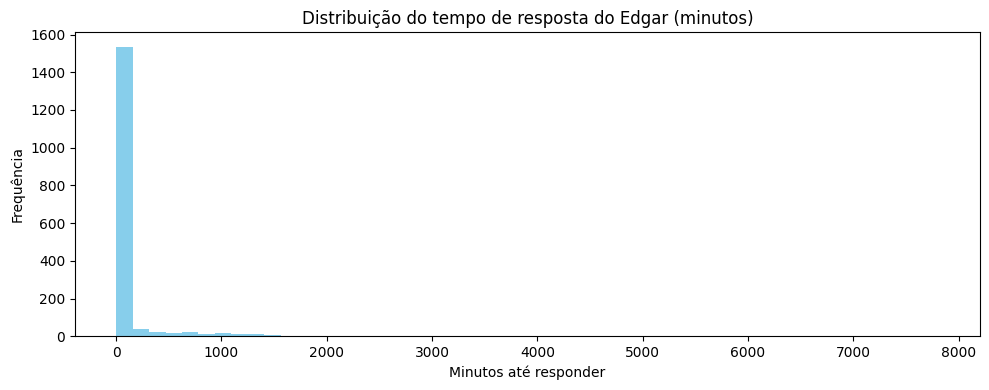


Resumo estatístico do tempo de resposta (em minutos):


count    1725.000000
mean      136.935865
std       585.677767
min         0.000000
25%         0.150000
50%         0.383333
75%         5.650000
max      7812.516667
Name: reply_minutes, dtype: float64


Probabilidade de resposta do Edgar em diferentes intervalos:
  ≤    1 min : 64.99%
  ≤    2 min : 69.80%
  ≤    5 min : 74.43%
  ≤   10 min : 77.28%
  ≤   15 min : 79.07%
  ≤   30 min : 82.32%
  ≤   60 min : 85.45%
  ≤  120 min : 88.00%
  ≤  240 min : 90.90%
  ≤ 1440 min : 97.80%


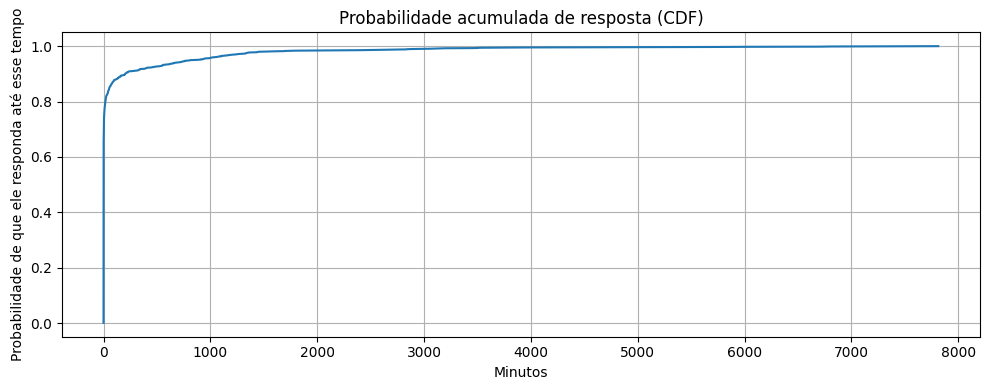


Modelo exponencial:
λ (lambda) estimado = 0.007303
Tempo médio até resposta = 136.94 minutos


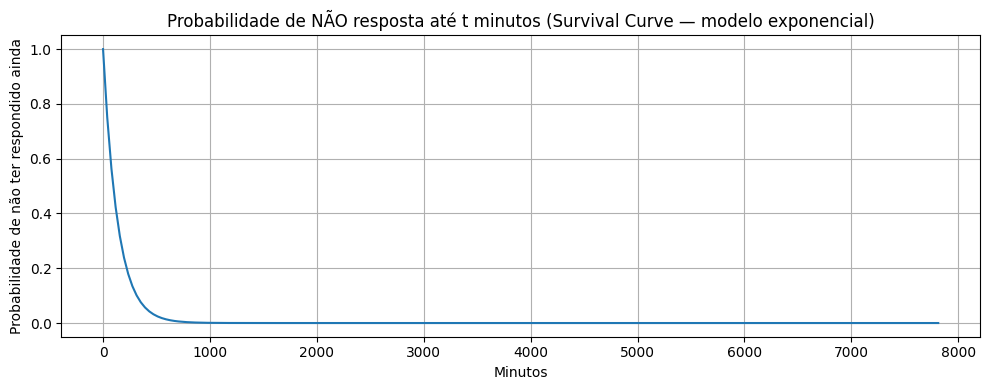


Probabilidade modelada de resposta em até t minutos:
  Modelo ≤    1 min : 0.73%
  Modelo ≤    2 min : 1.45%
  Modelo ≤    5 min : 3.59%
  Modelo ≤   10 min : 7.04%
  Modelo ≤   15 min : 10.38%
  Modelo ≤   30 min : 19.67%
  Modelo ≤   60 min : 35.48%
  Modelo ≤  120 min : 58.37%
  Modelo ≤  240 min : 82.67%
  Modelo ≤ 1440 min : 100.00%


In [30]:
# ============================================================
# ETAPA A — CALCULAR TEMPO DE RESPOSTA (ELE → VOCÊ)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Garantir ordenação temporal
df = df.sort_values("datetime").reset_index(drop=True)

nome_filho = "Edgar vivo"
nome_ana   = "Ana Alexandrino"

# Criar uma coluna "sender_next" e "time_to_next"
df["sender_next"] = df["sender"].shift(-1)
df["datetime_next"] = df["datetime"].shift(-1)

df["time_to_next"] = (df["datetime_next"] - df["datetime"]).dt.total_seconds()

# Selecionar situações onde:
# - VOCÊ mandou
# - ELE respondeu imediatamente depois (sem outra pessoa no meio)
df_reply = df[
    (df["sender"] == nome_ana) &
    (df["sender_next"] == nome_filho)
].copy()

# Tempo de resposta em minutos
df_reply["reply_minutes"] = df_reply["time_to_next"] / 60.0

print("Quantidade de respostas analisadas:", len(df_reply))
display(df_reply.head())

# ============================================================
# ETAPA B — DISTRIBUIÇÃO DO TEMPO DE RESPOSTA
# ============================================================

plt.figure(figsize=(10,4))
plt.hist(df_reply["reply_minutes"], bins=50, color="skyblue")
plt.title("Distribuição do tempo de resposta do Edgar (minutos)")
plt.xlabel("Minutos até responder")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# Estatísticas descritivas
print("\nResumo estatístico do tempo de resposta (em minutos):")
display(df_reply["reply_minutes"].describe())

# ============================================================
# ETAPA C — PROBABILIDADE DE RESPONDER EM UM INTERVALO ESPECÍFICO
# ============================================================

def prob_reply_within(minutes):
    return (df_reply["reply_minutes"] <= minutes).mean()

intervalos = [1, 2, 5, 10, 15, 30, 60, 120, 240, 1440]

print("\nProbabilidade de resposta do Edgar em diferentes intervalos:")
for m in intervalos:
    print(f"  ≤ {m:4d} min : {prob_reply_within(m):.2%}")

# Curva de probabilidade acumulada
sorted_minutes = np.sort(df_reply["reply_minutes"].values)
p = np.arange(1, len(sorted_minutes)+1) / len(sorted_minutes)

plt.figure(figsize=(10,4))
plt.plot(sorted_minutes, p)
plt.title("Probabilidade acumulada de resposta (CDF)")
plt.xlabel("Minutos")
plt.ylabel("Probabilidade de que ele responda até esse tempo")
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA D — MODELO EXPOENCIAL (HAZARD)
# ============================================================

# O modelo exponencial assume que:
# probabilidade de resposta decai de forma suave com o tempo

lambda_hat = 1 / df_reply["reply_minutes"].mean()

print("\nModelo exponencial:")
print(f"λ (lambda) estimado = {lambda_hat:.6f}")
print(f"Tempo médio até resposta = {1/lambda_hat:.2f} minutos")

# Função de sobrevivência (probabilidade de NÃO responder até t)
t = np.linspace(0, df_reply["reply_minutes"].max(), 200)
S = np.exp(-lambda_hat * t)

plt.figure(figsize=(10,4))
plt.plot(t, S)
plt.title("Probabilidade de NÃO resposta até t minutos (Survival Curve — modelo exponencial)")
plt.xlabel("Minutos")
plt.ylabel("Probabilidade de não ter respondido ainda")
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA E — PROBABILIDADE DE RESPOSTA EM T MINUTOS (MODELO)
# ============================================================

def model_prob_reply(t_minutes):
    return 1 - np.exp(-lambda_hat * t_minutes)

print("\nProbabilidade modelada de resposta em até t minutos:")
for m in intervalos:
    print(f"  Modelo ≤ {m:4d} min : {model_prob_reply(m):.2%}")

Visão geral mensal:


,month,mean_reply,median_reply,perc_1,perc_5,perc_10,n_responses,t
0,2023-01,119.512963,55.583333,0.111111,0.111111,0.222222,9,0
1,2023-02,622.060256,22.766667,0.384615,0.461538,0.461538,13,1
2,2023-04,6802.716667,6802.716667,0.000000,0.000000,0.000000,1,2
3,2023-11,255.981250,0.875000,0.531250,0.703125,0.765625,64,3
4,2023-12,1102.853333,0.483333,0.600000,0.666667,0.733333,15,4


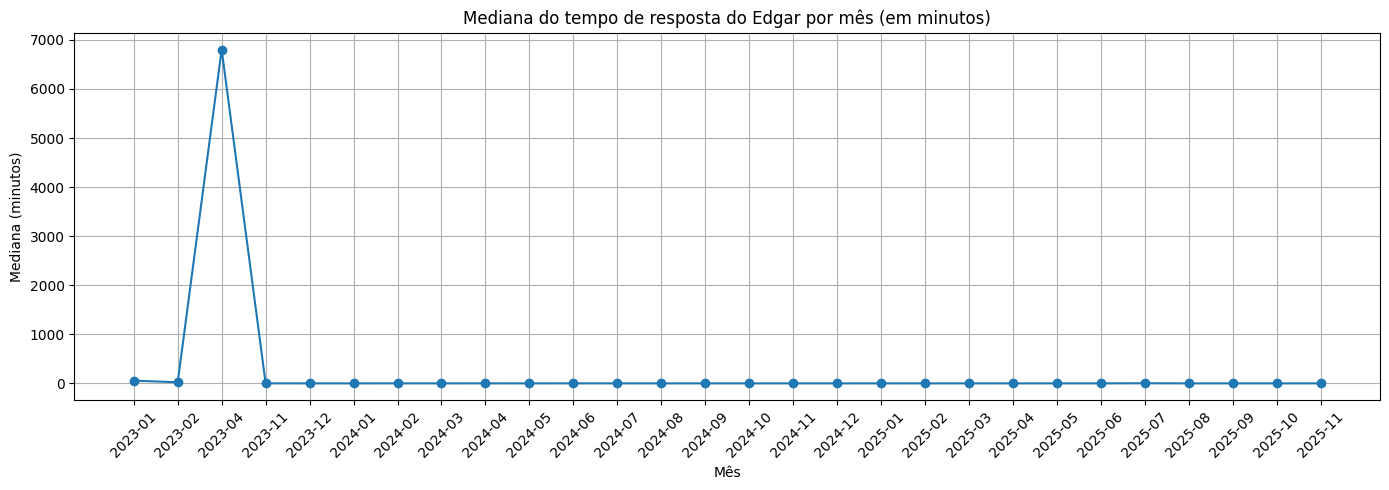

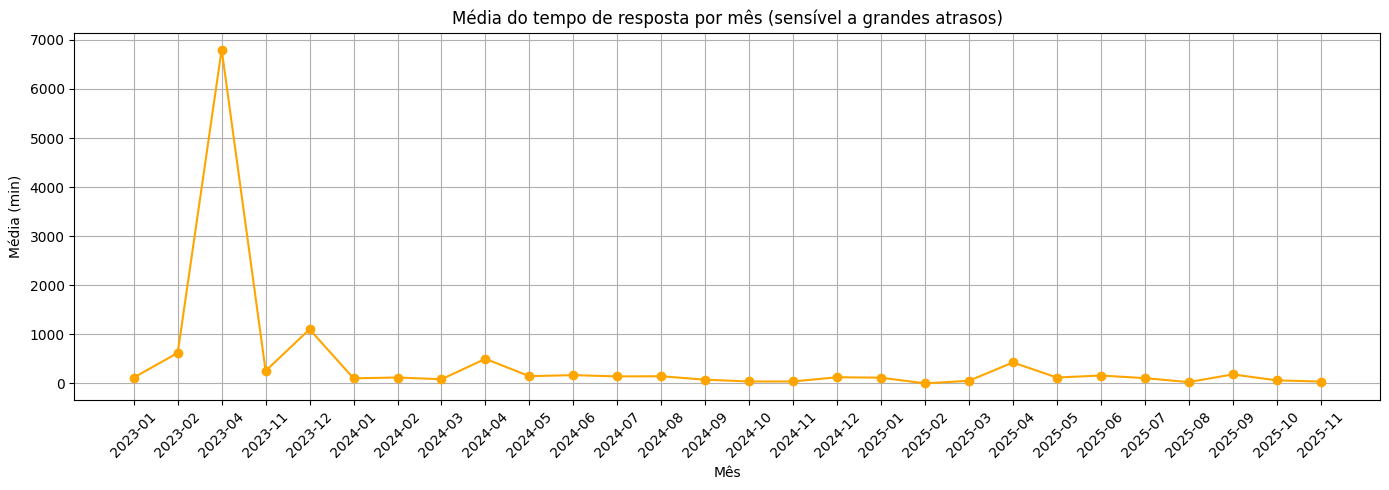

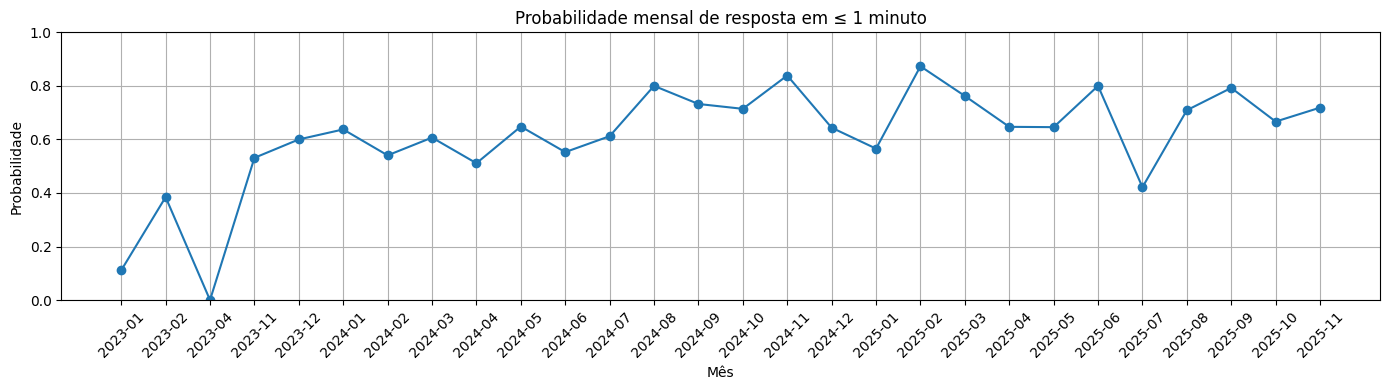

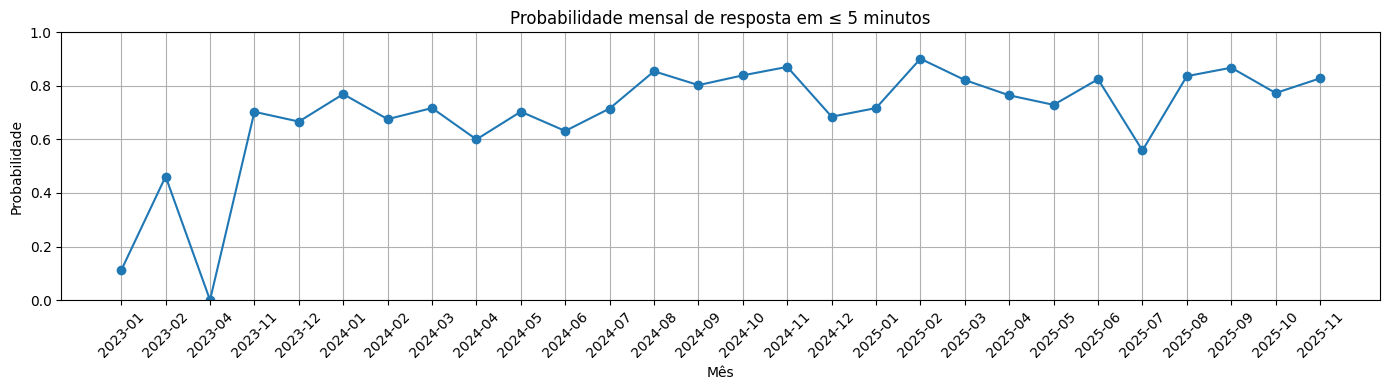

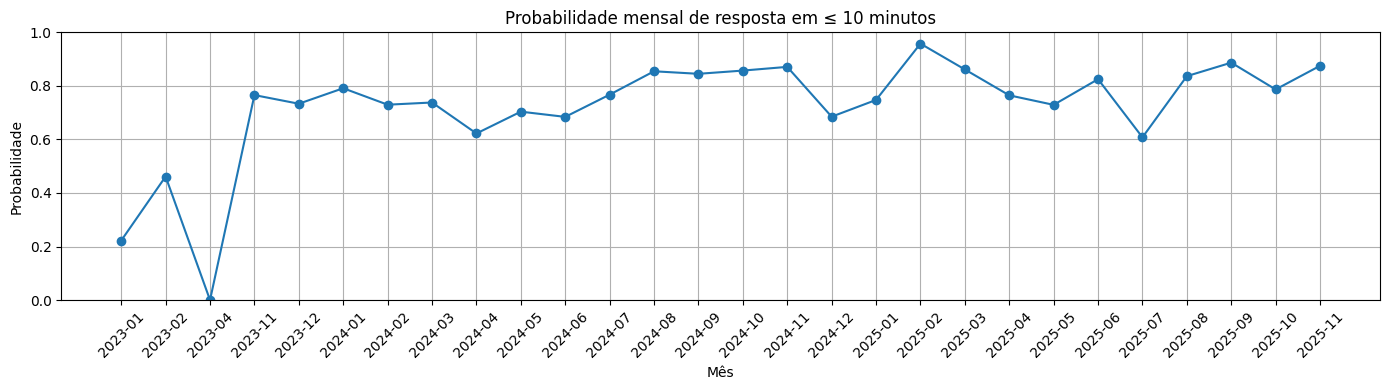


=== Modelo de tendência da MEDIANA do tempo de resposta ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.172
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.153
Time:                        19:42:49   Log-Likelihood:                -238.54
No. Observations:                  28   AIC:                             481.1
Df Residuals:                      26   BIC:                             483.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

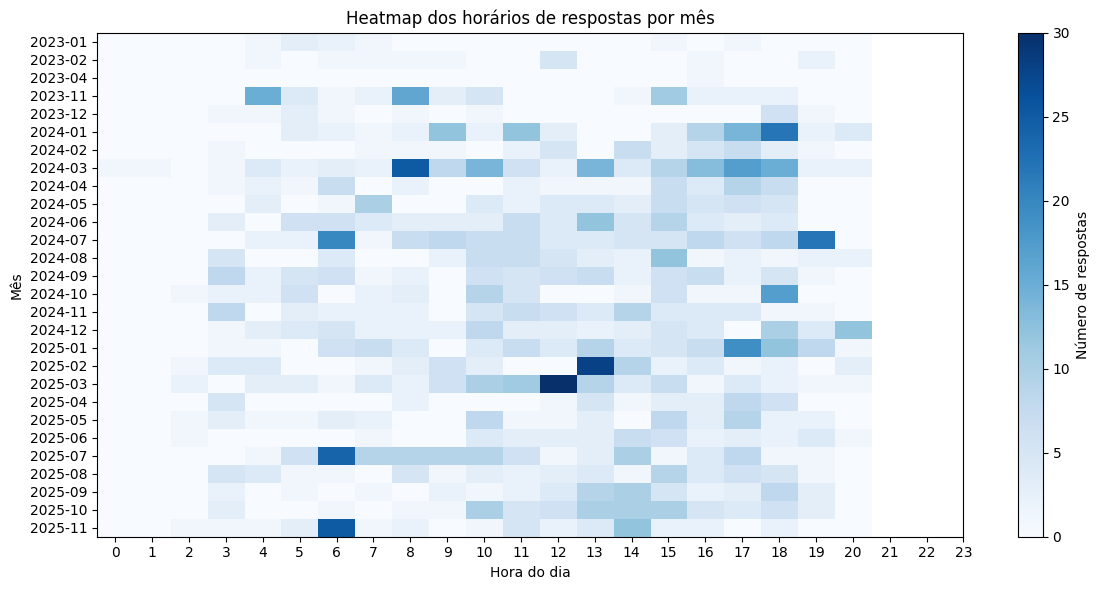


================== RESUMO INTERPRETATIVO ==================
Meses analisados: 28
Tendência da mediana de resposta (beta1): -43.378
Tendência da prob. ≤5 min (beta1): 0.015

Interpretação:
✔ Ele está respondendo mais rápido ao longo do tempo.
✔ Ele está aumentando a velocidade com que te responde.



In [31]:
# ============================================================
# ETAPA 1 — PREPARAR DADOS MENSALIZADOS DE TEMPO DE RESPOSTA
# ============================================================

# Cria coluna 'month' para df_reply
df_reply["month"] = df_reply["datetime"].dt.to_period("M")

# Estatísticas mensais
response_monthly = df_reply.groupby("month").agg(
    mean_reply=("reply_minutes", "mean"),
    median_reply=("reply_minutes", "median"),
    perc_1=("reply_minutes", lambda x: (x <= 1).mean()),
    perc_5=("reply_minutes", lambda x: (x <= 5).mean()),
    perc_10=("reply_minutes", lambda x: (x <= 10).mean()),
    n_responses=("reply_minutes", "size")
).reset_index()

# Converte período para número (para modelos)
response_monthly = response_monthly.sort_values("month")
response_monthly["t"] = range(len(response_monthly))

print("Visão geral mensal:")
display(response_monthly.head())

# ============================================================
# ETAPA 2 — GRÁFICOS DA EVOLUÇÃO DO TEMPO DE RESPOSTA
# ============================================================

plt.figure(figsize=(14,5))
plt.plot(response_monthly["month"].astype(str), response_monthly["median_reply"], marker="o")
plt.title("Mediana do tempo de resposta do Edgar por mês (em minutos)")
plt.xlabel("Mês")
plt.ylabel("Mediana (minutos)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(response_monthly["month"].astype(str), response_monthly["mean_reply"], marker="o", color="orange")
plt.title("Média do tempo de resposta por mês (sensível a grandes atrasos)")
plt.xlabel("Mês")
plt.ylabel("Média (min)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA 3 — EVOLUÇÃO DA PROBABILIDADE DE RESPOSTA RÁPIDA
# ============================================================

for perc, label in [("perc_1", "1 minuto"), ("perc_5", "5 minutos"), ("perc_10", "10 minutos")]:
    plt.figure(figsize=(14,4))
    plt.plot(response_monthly["month"].astype(str), response_monthly[perc], marker="o")
    plt.ylim(0,1)
    plt.title(f"Probabilidade mensal de resposta em ≤ {label}")
    plt.xlabel("Mês")
    plt.ylabel("Probabilidade")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ============================================================
# ETAPA 4 — REGRESSÃO: TENDÊNCIA DO TEMPO DE RESPOSTA
# ============================================================

import statsmodels.api as sm
import numpy as np

# Modelo: mediana ~ tempo
y = response_monthly["median_reply"].values
X = sm.add_constant(response_monthly["t"].values)

model = sm.OLS(y, X).fit()
print("\n=== Modelo de tendência da MEDIANA do tempo de resposta ===")
print(model.summary())

beta_mediana = model.params[1]
print("\nCoeficiente (beta1):", beta_mediana)

if beta_mediana < 0:
    print("📉 Ele está respondendo cada vez mais rápido.")
elif beta_mediana > 0:
    print("📈 Ele está demorando mais ao longo do tempo.")
else:
    print("➖ Nenhuma tendência significativa.")

# ============================================================
# ETAPA 5 — REGRESSÃO DA PROBABILIDADE DE RESPOSTA RÁPIDA (≤5 MIN)
# ============================================================

y2 = response_monthly["perc_5"].values
X2 = sm.add_constant(response_monthly["t"].values)

model2 = sm.OLS(y2, X2).fit()

print("\n=== Modelo da probabilidade de resposta em ≤5 minutos ===")
print(model2.summary())

beta_prob5 = model2.params[1]
print("\nCoeficiente (beta1):", beta_prob5)

if beta_prob5 < 0:
    print("📉 A probabilidade de ele te responder rápido está caindo.")
elif beta_prob5 > 0:
    print("📈 Ele está respondendo mais rápido ao longo do tempo.")
else:
    print("➖ Estável.")

# ============================================================
# ETAPA 6 — HEATMAP: HORÁRIO DE RESPOSTA AO LONGO DOS MESES
# ============================================================

df_reply["hour"] = df_reply["datetime"].dt.hour

heat = df_reply.groupby(["month", "hour"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
plt.imshow(heat, cmap="Blues", aspect="auto")
plt.colorbar(label="Número de respostas")
plt.title("Heatmap dos horários de respostas por mês")
plt.xlabel("Hora do dia")
plt.ylabel("Mês")
plt.xticks(range(24), range(24))
plt.yticks(range(len(heat.index)), heat.index.astype(str))
plt.tight_layout()
plt.show()

# ============================================================
# ETAPA 7 — RESUMO INTERPRETATIVO
# ============================================================

print("\n================== RESUMO INTERPRETATIVO ==================")
print(f"Meses analisados: {len(response_monthly)}")
print(f"Tendência da mediana de resposta (beta1): {beta_mediana:.3f}")
print(f"Tendência da prob. ≤5 min (beta1): {beta_prob5:.3f}")

print("\nInterpretação:")

if beta_mediana < 0:
    print("✔ Ele está respondendo mais rápido ao longo do tempo.")
elif beta_mediana > 0:
    print("✔ Ele está demorando mais para responder com o passar dos meses.")
else:
    print("✔ A velocidade de resposta não mudou significativamente.")

if beta_prob5 < 0:
    print("✔ A chance de ele te responder rápido (≤5min) está diminuindo.")
elif beta_prob5 > 0:
    print("✔ Ele está aumentando a velocidade com que te responde.")
else:
    print("✔ A rapidez de resposta permanece estável.")

print("\n============================================================")

In [32]:
pip install openai-whisper ffmpeg-python scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [ffmpeg-python]
Note: you may need to restart the kernel to use updated packages.


In [33]:
# ============================================================
# ETAPA 1 - TRANSCRIÇÃO DOS ÁUDIOS .OPUS COM WHISPER
# ============================================================

import os
import whisper
import pandas as pd

audio_dir = "../data/raw/audio"
model = whisper.load_model("small")  # pode trocar por "base" se quiser mais rápido

transcripts = []

for fname in sorted(os.listdir(audio_dir)):
    if not fname.lower().endswith((".opus", ".ogg", ".m4a", ".mp3", ".wav")):
        continue
    
    path = os.path.join(audio_dir, fname)
    print("Transcrevendo:", fname)
    result = model.transcribe(path, language="pt")
    
    text_full = result["text"].strip()
    
    transcripts.append({
        "audio_file": fname,
        "transcript": text_full
    })

df_audio = pd.DataFrame(transcripts)
print("\nPrévia das transcrições:")
display(df_audio.head())

os.makedirs("../data/processed", exist_ok=True)
df_audio.to_csv("../data/processed/audio_transcripts.csv", index=False)
print("Transcrições salvas em ../data/processed/audio_transcripts.csv")

Transcrevendo: 00000011-AUDIO-2023-01-21-17-09-46.opus
Transcrevendo: 00000014-AUDIO-2023-01-21-17-15-14.opus
Transcrevendo: 00000015-AUDIO-2023-01-21-17-22-32.opus
Transcrevendo: 00000016-AUDIO-2023-01-21-17-22-44.opus
Transcrevendo: 00000017-AUDIO-2023-01-21-17-22-57.opus
Transcrevendo: 00000023-AUDIO-2023-01-21-18-34-34.opus
Transcrevendo: 00000024-AUDIO-2023-01-21-18-36-09.opus
Transcrevendo: 00000025-AUDIO-2023-01-21-19-41-13.opus
Transcrevendo: 00000027-AUDIO-2023-01-22-07-11-59.opus
Transcrevendo: 00000034-AUDIO-2023-01-22-09-14-13.opus
Transcrevendo: 00000039-AUDIO-2023-01-22-09-14-59.opus
Transcrevendo: 00000051-AUDIO-2023-01-25-09-57-52.opus
Transcrevendo: 00000079-AUDIO-2023-02-19-14-29-43.opus
Transcrevendo: 00000088-AUDIO-2023-02-20-11-49-07.opus
Transcrevendo: 00000111-AUDIO-2023-02-24-21-51-42.opus
Transcrevendo: 00000117-AUDIO-2023-02-24-22-03-26.opus
Transcrevendo: 00000118-AUDIO-2023-02-24-22-03-29.opus
Transcrevendo: 00000119-AUDIO-2023-02-24-22-03-32.opus
Transcreve

,audio_file,transcript
0,00000011-AUDIO-2023-01-21-17-09-46.opus,"O controle do pessoal aqui, eu veria que eu pr..."
1,00000014-AUDIO-2023-01-21-17-15-14.opus,"Mãe, o Luiz Sauris aqui está jogando no game a..."
2,00000015-AUDIO-2023-01-21-17-22-32.opus,"A alma aí, para falar uma coisa também. É, eu ..."
3,00000016-AUDIO-2023-01-21-17-22-44.opus,"e perfesmind fundadosvidos, e tudo se admirou ..."
4,00000017-AUDIO-2023-01-21-17-22-57.opus,E o chão. Vou ver.


Transcrições salvas em ../data/processed/audio_transcripts.csv


In [34]:
df_audio = pd.read_csv("../data/processed/audio_transcripts.csv")
print("Número de áudios transcritos:", len(df_audio))
df_audio.head()

Número de áudios transcritos: 149


,audio_file,transcript
0,00000011-AUDIO-2023-01-21-17-09-46.opus,"O controle do pessoal aqui, eu veria que eu pr..."
1,00000014-AUDIO-2023-01-21-17-15-14.opus,"Mãe, o Luiz Sauris aqui está jogando no game a..."
2,00000015-AUDIO-2023-01-21-17-22-32.opus,"A alma aí, para falar uma coisa também. É, eu ..."
3,00000016-AUDIO-2023-01-21-17-22-44.opus,"e perfesmind fundadosvidos, e tudo se admirou ..."
4,00000017-AUDIO-2023-01-21-17-22-57.opus,E o chão. Vou ver.


In [35]:
# ============================================================
# ETAPA - ASSOCIAÇÃO DE ÁUDIOS COM MENSAGENS DO CHAT
# ============================================================

import re
from datetime import datetime

# Extrair timestamp aproximado do nome do arquivo
def extract_datetime_from_audio_filename(fname):
    # Aceita padrões de datas comuns do WhatsApp Brasil:
    # PTT-20230120-WA0001.opus
    m = re.search(r'(\d{8})', fname)
    if m:
        d = datetime.strptime(m.group(1), "%Y%m%d")
        return d.date()
    return None

df_audio["audio_date"] = df_audio["audio_file"].apply(extract_datetime_from_audio_filename)

df_audio.head()

ValueError: time data '00000011' does not match format '%Y%m%d'

In [36]:
def extract_datetime_from_audio_filename(fname):
    # Exemplo: 00000011-AUDIO-2023-01-21-17-09-46.opus
    m = re.search(r'(\d{4})-(\d{2})-(\d{2})-(\d{2})-(\d{2})-(\d{2})', fname)
    if m:
        return datetime(
            int(m.group(1)),  # ano
            int(m.group(2)),  # mês
            int(m.group(3)),  # dia
            int(m.group(4)),  # hora
            int(m.group(5)),  # minuto
            int(m.group(6)),  # segundo
        )
    return None

In [37]:
df_audio["audio_datetime"] = df_audio["audio_file"].apply(extract_datetime_from_audio_filename)
df_audio.head()

,audio_file,transcript,audio_datetime
0,00000011-AUDIO-2023-01-21-17-09-46.opus,"O controle do pessoal aqui, eu veria que eu pr...",2023-01-21 17:09:46
1,00000014-AUDIO-2023-01-21-17-15-14.opus,"Mãe, o Luiz Sauris aqui está jogando no game a...",2023-01-21 17:15:14
2,00000015-AUDIO-2023-01-21-17-22-32.opus,"A alma aí, para falar uma coisa também. É, eu ...",2023-01-21 17:22:32
3,00000016-AUDIO-2023-01-21-17-22-44.opus,"e perfesmind fundadosvidos, e tudo se admirou ...",2023-01-21 17:22:44
4,00000017-AUDIO-2023-01-21-17-22-57.opus,E o chão. Vou ver.,2023-01-21 17:22:57


In [38]:
df_audio_chat = df[df["content_type"] == "audio"].copy()
df_audio_chat = df_audio_chat.sort_values("datetime")

print("Áudios encontrados no chat:", len(df_audio_chat))
df_audio_chat.head()

Áudios encontrados no chat: 153


,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next
10,2023-01-21 17:09:46,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:13:01,195.0
13,2023-01-21 17:15:14,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:22:32,438.0
14,2023-01-21 17:22:32,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:22:44,12.0
15,2023-01-21 17:22:44,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:22:57,13.0
16,2023-01-21 17:22:57,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:23:45,48.0


In [39]:
merged = pd.merge_asof(
    df_audio_chat.sort_values("datetime"),
    df_audio.sort_values("audio_datetime"),
    left_on="datetime",
    right_on="audio_datetime",
    direction="nearest",
    tolerance=pd.Timedelta("30s")
)

print("Exemplos de áudios alinhados ao chat:")
merged.head()

Exemplos de áudios alinhados ao chat:


,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,audio_file,transcript,audio_datetime
0,2023-01-21 17:09:46,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:13:01,195.0,00000011-AUDIO-2023-01-21-17-09-46.opus,"O controle do pessoal aqui, eu veria que eu pr...",2023-01-21 17:09:46
1,2023-01-21 17:15:14,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:22:32,438.0,00000014-AUDIO-2023-01-21-17-15-14.opus,"Mãe, o Luiz Sauris aqui está jogando no game a...",2023-01-21 17:15:14
2,2023-01-21 17:22:32,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:22:44,12.0,00000015-AUDIO-2023-01-21-17-22-32.opus,"A alma aí, para falar uma coisa também. É, eu ...",2023-01-21 17:22:32
3,2023-01-21 17:22:44,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:22:57,13.0,00000016-AUDIO-2023-01-21-17-22-44.opus,"e perfesmind fundadosvidos, e tudo se admirou ...",2023-01-21 17:22:44
4,2023-01-21 17:22:57,Edgar vivo,‎áudio ocultado,2023-01-21,2023-01,17,audio,15,True,False,Edgar vivo,2023-01-21 17:23:45,48.0,00000017-AUDIO-2023-01-21-17-22-57.opus,E o chão. Vou ver.,2023-01-21 17:22:57


In [40]:
df_ml = df_reply.copy()

df_ml = pd.merge_asof(
    df_ml.sort_values("datetime"),
    merged[["datetime", "transcript"]].sort_values("datetime"),
    left_on="datetime",
    right_on="datetime",
    direction="nearest",
    tolerance=pd.Timedelta("2s")
)

df_ml["transcript"] = df_ml["transcript"].fillna("")
df_ml["text_full"] = df_ml["message"] + " " + df_ml["transcript"]

df_ml.head()

,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,reply_minutes,transcript,text_full
0,2023-01-20 08:56:01,Ana Alexandrino,Filho,2023-01-20,2023-01,8,text,5,False,True,Edgar vivo,2023-01-20 09:14:27,1106.0,18.433333,,Filho
1,2023-01-21 09:05:03,Ana Alexandrino,‎figurinha omitida,2023-01-21,2023-01,9,sticker,18,False,True,Edgar vivo,2023-01-21 09:10:25,322.0,5.366667,,‎figurinha omitida
2,2023-01-21 18:36:10,Ana Alexandrino,‎áudio ocultado,2023-01-21,2023-01,18,audio,15,False,True,Edgar vivo,2023-01-21 19:41:13,3903.0,65.050000,"a mamãe tá chegando aqui, tô passando na frent...","‎áudio ocultado a mamãe tá chegando aqui, tô p..."
3,2023-01-22 07:18:56,Ana Alexandrino,Agora ele tem q ir pra escola,2023-01-22,2023-01,7,text,29,False,True,Edgar vivo,2023-01-22 08:01:20,2544.0,42.400000,,Agora ele tem q ir pra escola
4,2023-01-22 08:18:38,Ana Alexandrino,Eu quero,2023-01-22,2023-01,8,text,8,False,True,Edgar vivo,2023-01-22 09:14:13,3335.0,55.583333,,Eu quero


<Figure size 1400x500 with 0 Axes>

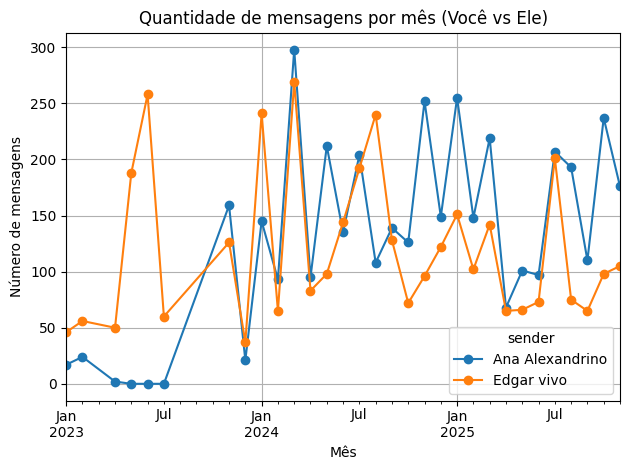


Mensagens por mês:


sender,Ana Alexandrino,Edgar vivo
month,,
2023-01,17,46
2023-02,24,56
2023-04,2,50
2023-05,0,188
2023-06,0,258
2023-07,0,60
2023-11,159,126
2023-12,21,37
2024-01,145,241


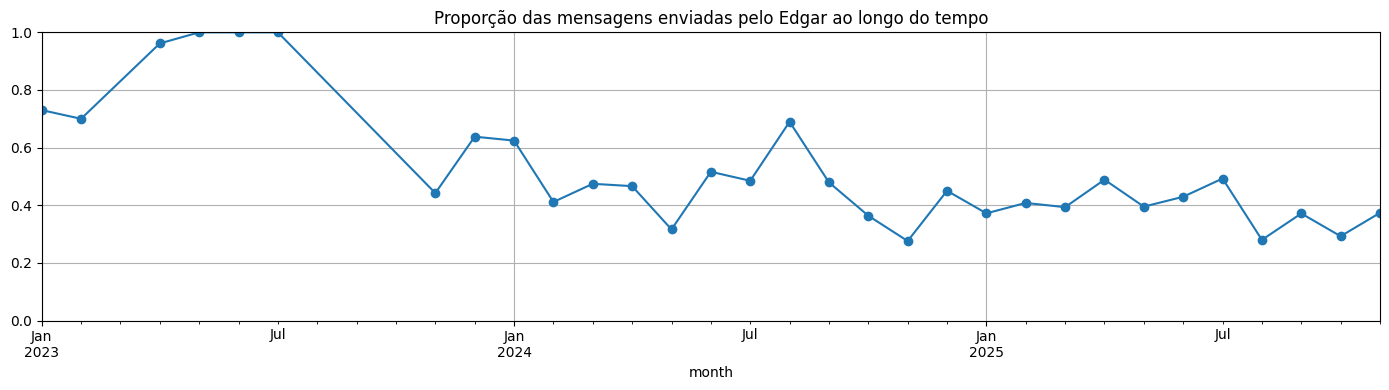


Proporção de mensagens do filho por mês:


month
2023-01    0.730159
2023-02    0.700000
2023-04    0.961538
2023-05    1.000000
2023-06    1.000000
2023-07    1.000000
2023-11    0.442105
2023-12    0.637931
2024-01    0.624352
2024-02    0.411392
2024-03    0.474427
2024-04    0.466292
2024-05    0.316129
2024-06    0.516129
2024-07    0.484848
2024-08    0.689655
2024-09    0.479401
2024-10    0.363636
2024-11    0.275862
2024-12    0.450185
2025-01    0.371921
2025-02    0.408000
2025-03    0.393352
2025-04    0.488722
2025-05    0.395210
2025-06    0.429412
2025-07    0.492647
2025-08    0.279851
2025-09    0.371429
2025-10    0.292537
2025-11    0.373665
Freq: M, Name: prop_filho, dtype: float64

<Figure size 1400x500 with 0 Axes>

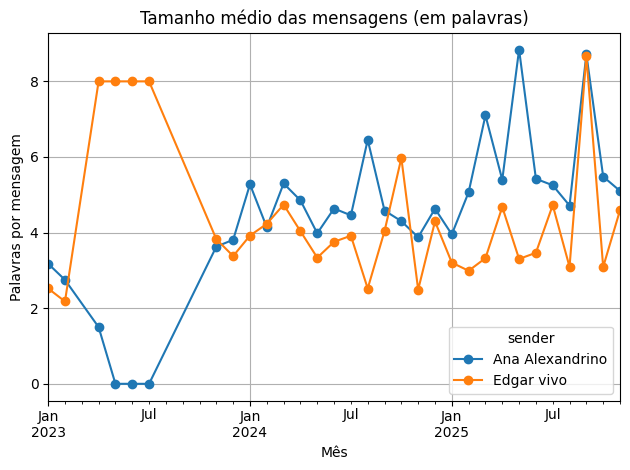


Tamanho médio das mensagens por mês:


sender,Ana Alexandrino,Edgar vivo
month,,
2023-01,3.176471,2.521739
2023-02,2.750000,2.178571
2023-04,1.500000,8.000000
2023-05,0.000000,8.000000
2023-06,0.000000,8.000000
2023-07,0.000000,8.000000
2023-11,3.628931,3.825397
2023-12,3.809524,3.378378
2024-01,5.275862,3.921162


<Figure size 1400x500 with 0 Axes>

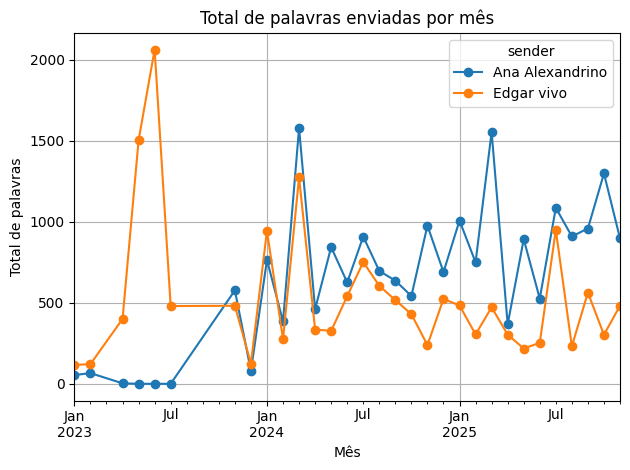


Palavras por mês:


sender,Ana Alexandrino,Edgar vivo
month,,
2023-01,54,116
2023-02,66,122
2023-04,3,400
2023-05,0,1504
2023-06,0,2064
2023-07,0,480
2023-11,577,482
2023-12,80,125
2024-01,765,945



=== Tendência da quantidade de mensagens dele ===
                            OLS Regression Results                            
Dep. Variable:             Edgar vivo   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.2279
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.637
Time:                        20:18:09   Log-Likelihood:                -173.82
No. Observations:                  31   AIC:                             351.6
Df Residuals:                      29   BIC:                             354.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [41]:
# ============================================================
# ANÁLISE SÉRIA DA EVOLUÇÃO DA TROCA DE MENSAGENS ENTRE VOCÊ E ELE
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nome_filho = "Edgar vivo"
nome_ana   = "Ana Alexandrino"

# Criar colunas úteis
df["month"] = df["datetime"].dt.to_period("M")
df["word_count"] = df["message"].str.split().str.len().fillna(0)

# ------------------------------------------------------------
# 1. Quantidade de mensagens por mês (por pessoa)
# ------------------------------------------------------------
msgs_por_mes = df.groupby(["month", "sender"]).size().unstack(fill_value=0)

plt.figure(figsize=(14,5))
msgs_por_mes.plot(kind="line", marker="o")
plt.title("Quantidade de mensagens por mês (Você vs Ele)")
plt.xlabel("Mês")
plt.ylabel("Número de mensagens")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nMensagens por mês:")
display(msgs_por_mes)

# ------------------------------------------------------------
# 2. Proporção das mensagens: ele fala menos com o tempo?
# ------------------------------------------------------------
msgs_por_mes["prop_filho"] = msgs_por_mes[nome_filho] / (msgs_por_mes[nome_filho] + msgs_por_mes[nome_ana])
msgs_por_mes["prop_ana"]   = 1 - msgs_por_mes["prop_filho"]

plt.figure(figsize=(14,4))
msgs_por_mes["prop_filho"].plot(marker="o")
plt.title("Proporção das mensagens enviadas pelo Edgar ao longo do tempo")
plt.ylim(0,1)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nProporção de mensagens do filho por mês:")
display(msgs_por_mes["prop_filho"])

# ------------------------------------------------------------
# 3. Tamanho médio das mensagens (em palavras)
# ------------------------------------------------------------
tam_medio = df.groupby(["month", "sender"])["word_count"].mean().unstack(fill_value=0)

plt.figure(figsize=(14,5))
tam_medio.plot(marker="o")
plt.title("Tamanho médio das mensagens (em palavras)")
plt.xlabel("Mês")
plt.ylabel("Palavras por mensagem")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nTamanho médio das mensagens por mês:")
display(tam_medio)

# ------------------------------------------------------------
# 4. Total de palavras enviadas por mês
# ------------------------------------------------------------
palavras_por_mes = df.groupby(["month", "sender"])["word_count"].sum().unstack(fill_value=0)

plt.figure(figsize=(14,5))
palavras_por_mes.plot(marker="o")
plt.title("Total de palavras enviadas por mês")
plt.xlabel("Mês")
plt.ylabel("Total de palavras")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPalavras por mês:")
display(palavras_por_mes)

# ------------------------------------------------------------
# 5. Tendência estatística — ele está diminuindo?
# ------------------------------------------------------------
from statsmodels.api import OLS, add_constant

# Tendência da quantidade de mensagens dele
series_filho = msgs_por_mes[nome_filho].reset_index()
series_filho["t"] = range(len(series_filho))

X = add_constant(series_filho["t"])
y = series_filho[nome_filho]

modelo = OLS(y, X).fit()
beta1 = modelo.params["t"]

print("\n=== Tendência da quantidade de mensagens dele ===")
print(modelo.summary())
print("\nCoeficiente de tendência (beta1):", beta1)

if beta1 < 0:
    print("📉 Ele tem mandado menos mensagens ao longo do tempo.")
elif beta1 > 0:
    print("📈 Ele tem mandado mais mensagens ao longo do tempo.")
else:
    print("➖ Não há mudança.")

# Tendência das palavras dele
series_palavras = palavras_por_mes[nome_filho].reset_index()
series_palavras["t"] = range(len(series_palavras))

X2 = add_constant(series_palavras["t"])
y2 = series_palavras[nome_filho]
modelo2 = OLS(y2, X2).fit()
beta2 = modelo2.params["t"]

print("\n=== Tendência do total de palavras dele ===")
print(modelo2.summary())
print("\nCoeficiente de tendência (beta2):", beta2)

if beta2 < 0:
    print("📉 Ele está escrevendo menos (em palavras) ao longo do tempo.")
elif beta2 > 0:
    print("📈 Ele está escrevendo mais ao longo do tempo.")
else:
    print("➖ Sem mudança significativa.")

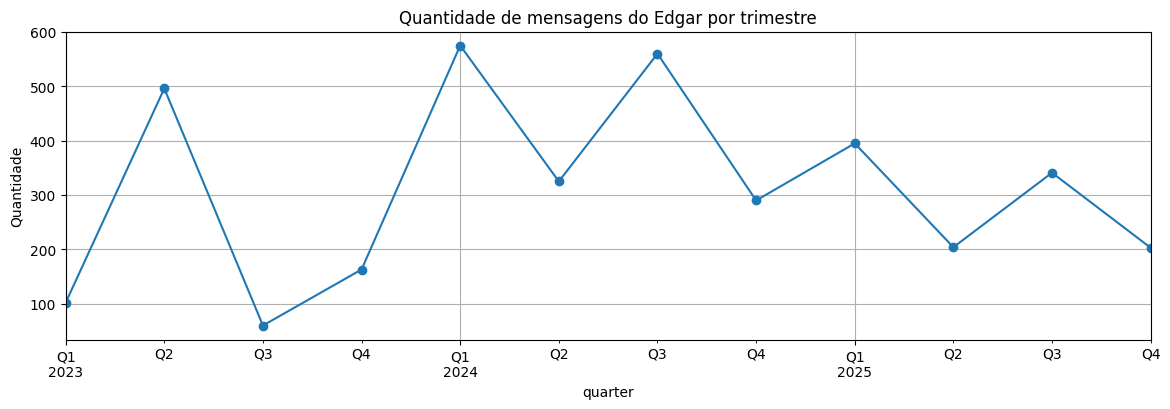

quarter
2023Q1    102
2023Q2    496
2023Q3     60
2023Q4    163
2024Q1    575
2024Q2    325
2024Q3    560
2024Q4    290
2025Q1    395
2025Q2    204
2025Q3    341
2025Q4    203
Freq: Q-DEC, dtype: int64

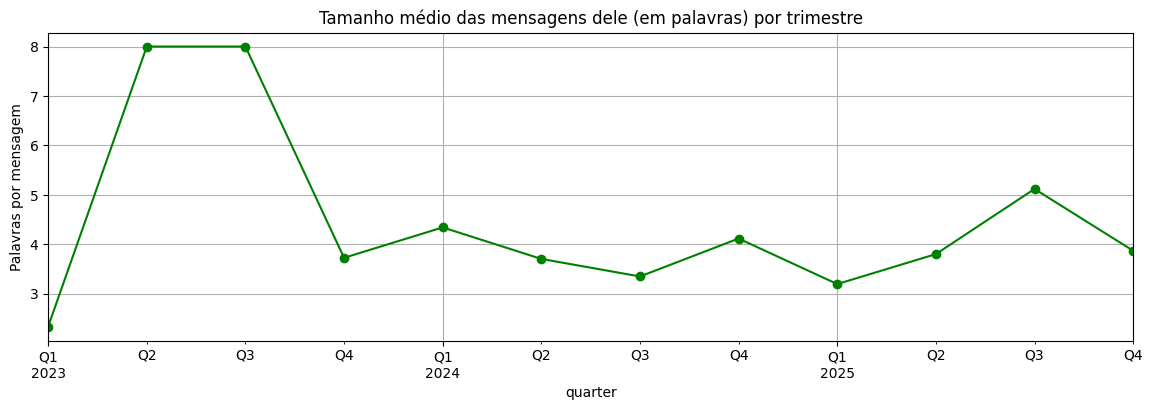

quarter
2023Q1    2.333333
2023Q2    8.000000
2023Q3    8.000000
2023Q4    3.723926
2024Q1    4.339130
2024Q2    3.701538
2024Q3    3.346429
2024Q4    4.113793
2025Q1    3.192405
2025Q2    3.799020
2025Q3    5.117302
2025Q4    3.866995
Freq: Q-DEC, Name: word_count, dtype: float64

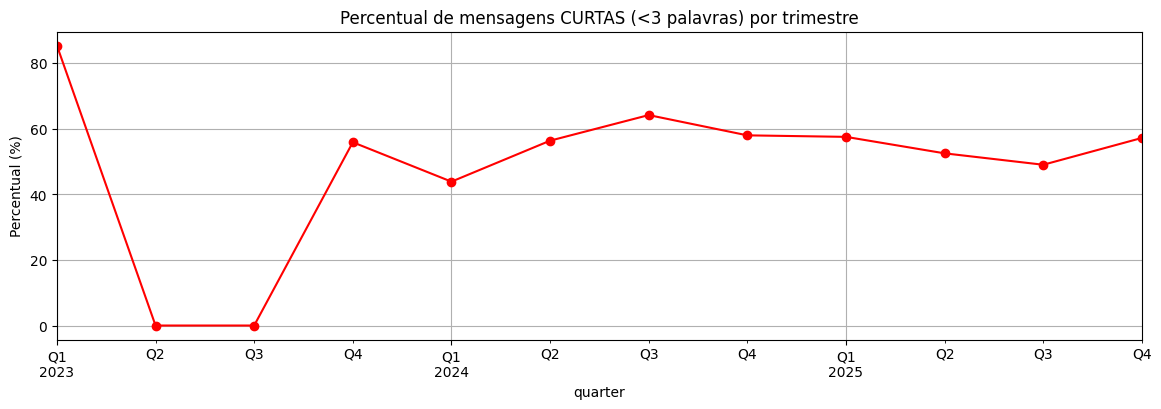


Percentual de mensagens curtas por trimestre (%):


quarter
2023Q1    85.294118
2023Q2     0.000000
2023Q3     0.000000
2023Q4    55.828221
2024Q1    43.826087
2024Q2    56.307692
2024Q3    64.107143
2024Q4    57.931034
2025Q1    57.468354
2025Q2    52.450980
2025Q3    48.973607
2025Q4    57.142857
Freq: Q-DEC, Name: short_msg, dtype: float64


Quantidade absoluta de mensagens curtas por trimestre:


quarter
2023Q1     87
2023Q2      0
2023Q3      0
2023Q4     91
2024Q1    252
2024Q2    183
2024Q3    359
2024Q4    168
2025Q1    227
2025Q2    107
2025Q3    167
2025Q4    116
Freq: Q-DEC, Name: short_msg, dtype: int64

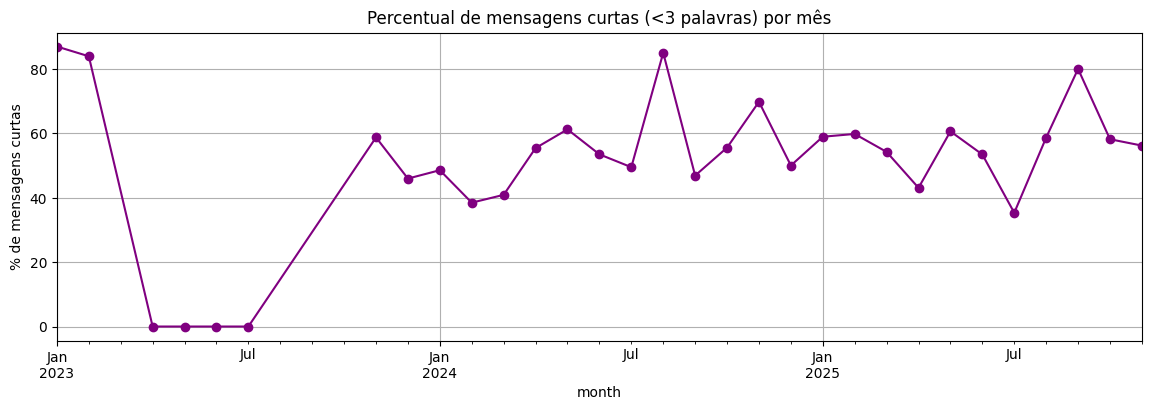

month
2023-01    86.956522
2023-02    83.928571
2023-04     0.000000
2023-05     0.000000
2023-06     0.000000
2023-07     0.000000
2023-11    58.730159
2023-12    45.945946
2024-01    48.547718
2024-02    38.461538
2024-03    40.892193
2024-04    55.421687
2024-05    61.224490
2024-06    53.472222
2024-07    49.479167
2024-08    85.000000
2024-09    46.875000
2024-10    55.555556
2024-11    69.791667
2024-12    50.000000
2025-01    58.940397
2025-02    59.803922
2025-03    54.225352
2025-04    43.076923
2025-05    60.606061
2025-06    53.424658
2025-07    35.323383
2025-08    58.666667
2025-09    80.000000
2025-10    58.163265
2025-11    56.190476
Freq: M, Name: short_msg, dtype: float64

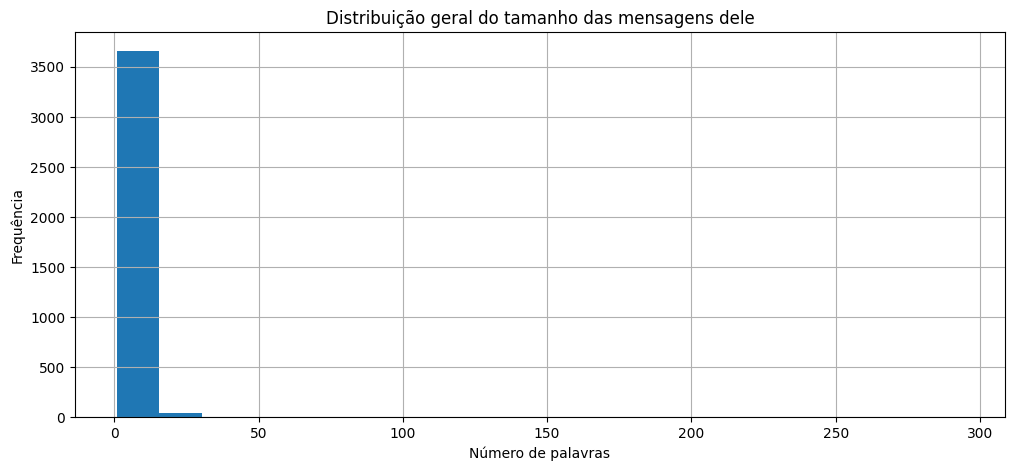


Distribuição estatística do tamanho das mensagens por trimestre:


,count,mean,std,min,25%,50%,75%,max
quarter,,,,,,,,
2023Q1,102.0,2.333333,2.992841,1.0,1.0,2.0,2.0,28.0
2023Q2,496.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
2023Q3,60.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
2023Q4,163.0,3.723926,3.522920,1.0,2.0,2.0,5.0,22.0
2024Q1,575.0,4.339130,4.347467,1.0,1.5,3.0,6.0,47.0
2024Q2,325.0,3.701538,4.110379,1.0,1.0,2.0,5.0,43.0
2024Q3,560.0,3.346429,3.236861,1.0,2.0,2.0,5.0,43.0
2024Q4,290.0,4.113793,7.331320,1.0,1.0,2.0,5.0,101.0
2025Q1,395.0,3.192405,2.932999,1.0,1.0,2.0,4.0,28.0


In [42]:
# ============================================================
# ANÁLISE APROFUNDADA DO COMPORTAMENTO DE MENSAGENS POR TRIMESTRE
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar mensagens dele
nome_filho = "Edgar vivo"
df_filho = df[df["sender"].str.contains(nome_filho, case=False)].copy()

# Criar colunas adicionais
df_filho["word_count"] = df_filho["message"].str.split().str.len().fillna(0)
df_filho["quarter"] = df_filho["datetime"].dt.to_period("Q")
df_filho["month"] = df_filho["datetime"].dt.to_period("M")

# ------------------------------------------------------------
# 1. Mensagens por trimestre
# ------------------------------------------------------------
msgs_trim = df_filho.groupby("quarter").size()

plt.figure(figsize=(14,4))
msgs_trim.plot(marker="o")
plt.title("Quantidade de mensagens do Edgar por trimestre")
plt.ylabel("Quantidade")
plt.grid(True)
plt.show()

display(msgs_trim)

# ------------------------------------------------------------
# 2. Tamanho médio das mensagens por trimestre
# ------------------------------------------------------------
tam_trim = df_filho.groupby("quarter")["word_count"].mean()

plt.figure(figsize=(14,4))
tam_trim.plot(marker="o", color="green")
plt.title("Tamanho médio das mensagens dele (em palavras) por trimestre")
plt.ylabel("Palavras por mensagem")
plt.grid(True)
plt.show()

display(tam_trim)

# ------------------------------------------------------------
# 3. Frequência de mensagens curtas (<3 palavras)
# ------------------------------------------------------------
df_filho["short_msg"] = df_filho["word_count"] < 3

freq_short_trim = df_filho.groupby("quarter")["short_msg"].mean() * 100  # %
count_short_trim = df_filho.groupby("quarter")["short_msg"].sum()

plt.figure(figsize=(14,4))
freq_short_trim.plot(marker="o", color="red")
plt.title("Percentual de mensagens CURTAS (<3 palavras) por trimestre")
plt.ylabel("Percentual (%)")
plt.grid(True)
plt.show()

print("\nPercentual de mensagens curtas por trimestre (%):")
display(freq_short_trim)

print("\nQuantidade absoluta de mensagens curtas por trimestre:")
display(count_short_trim)

# ------------------------------------------------------------
# 4. Frequência por mês (para ver tendência mais fina)
# ------------------------------------------------------------
freq_short_mes = df_filho.groupby("month")["short_msg"].mean() * 100

plt.figure(figsize=(14,4))
freq_short_mes.plot(marker="o", color="purple")
plt.title("Percentual de mensagens curtas (<3 palavras) por mês")
plt.ylabel("% de mensagens curtas")
plt.grid(True)
plt.show()

display(freq_short_mes)

# ------------------------------------------------------------
# 5. Distribuição do tamanho das mensagens ao longo do tempo
# ------------------------------------------------------------
plt.figure(figsize=(12,5))
plt.hist(df_filho["word_count"], bins=20)
plt.title("Distribuição geral do tamanho das mensagens dele")
plt.xlabel("Número de palavras")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

# Distribuição por trimestre (opcional)
dist_trim = df_filho.groupby("quarter")["word_count"].describe()
print("\nDistribuição estatística do tamanho das mensagens por trimestre:")
display(dist_trim)

Resumo trimestral (mensagens, tamanho médio, % curtas):


,msgs_Ana Alexandrino,msgs_Edgar vivo,mean_words_Ana Alexandrino,mean_words_Edgar vivo,pct_short_Ana Alexandrino,pct_short_Edgar vivo
quarter,,,,,,
2023Q1,41.0,102.0,2.926829,2.333333,0.463415,0.852941
2023Q2,2.0,496.0,1.500000,8.000000,1.000000,0.000000
2023Q3,NaN,60.0,NaN,8.000000,NaN,0.000000
2023Q4,180.0,163.0,3.650000,3.723926,0.505556,0.558282
2024Q1,536.0,575.0,5.091418,4.339130,0.326493,0.438261
2024Q2,442.0,325.0,4.368778,3.701538,0.475113,0.563077
2024Q3,451.0,560.0,4.973392,3.346429,0.314856,0.641071
2024Q4,527.0,290.0,4.191651,4.113793,0.478178,0.579310
2025Q1,622.0,395.0,5.326367,3.192405,0.339228,0.574684


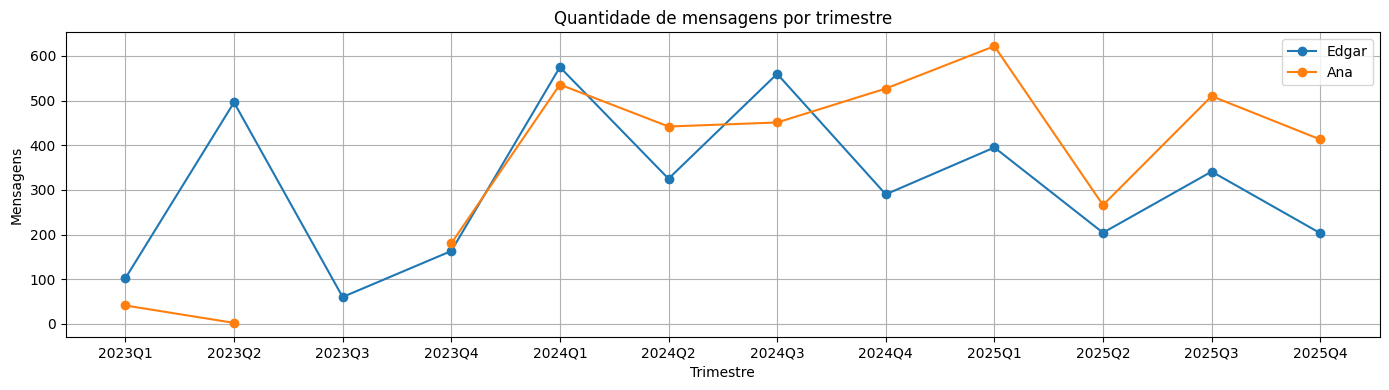

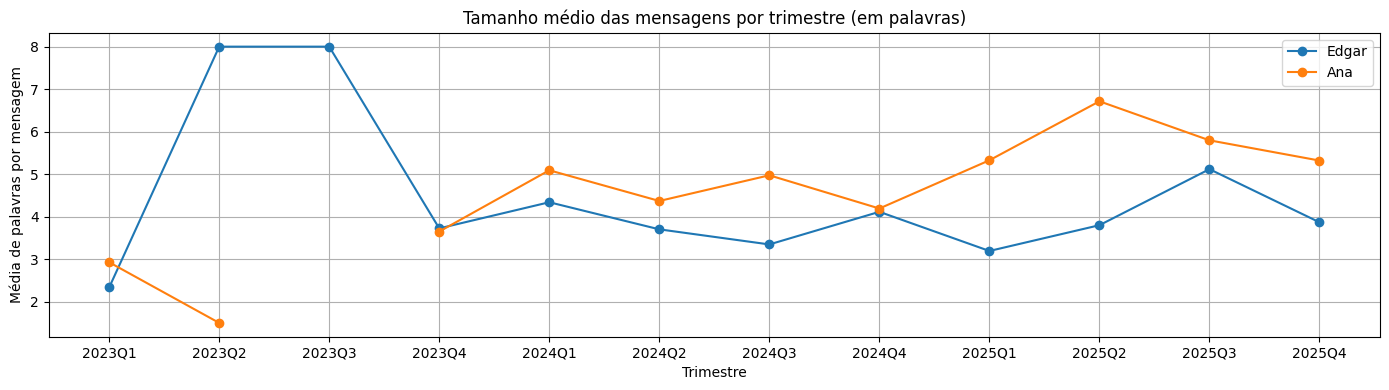

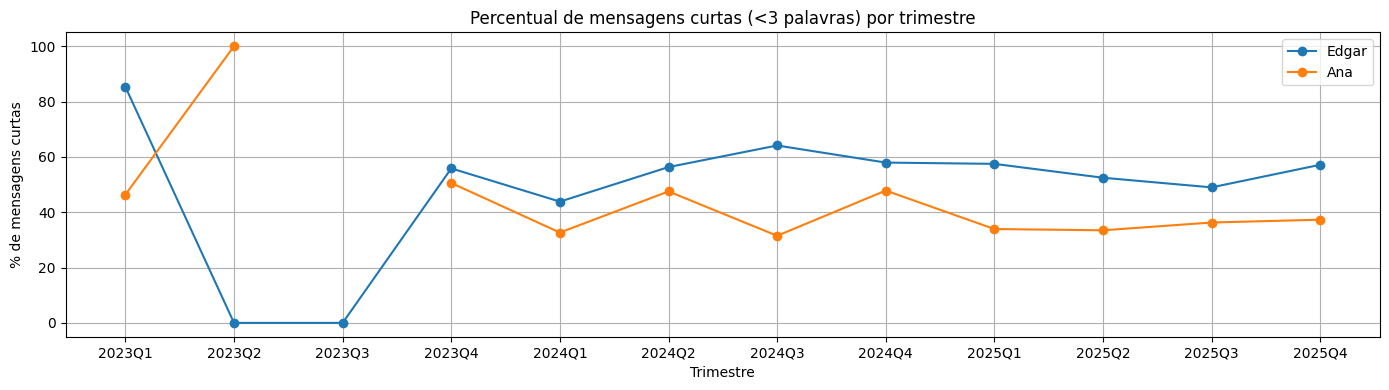

In [43]:
# ============================================================
# COMPARAÇÃO DIRETA: VOCÊ x EDGAR — TAMANHO E FREQUÊNCIA DE MENSAGENS
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nome_filho = "Edgar vivo"
nome_ana   = "Ana Alexandrino"

# Garantir colunas básicas
df["word_count"] = df["message"].str.split().str.len().fillna(0)
df["month"] = df["datetime"].dt.to_period("M")
df["quarter"] = df["datetime"].dt.to_period("Q")

# Flag de quem é quem
df["is_filho"] = (df["sender"] == nome_filho).astype(int)
df["is_ana"]   = (df["sender"] == nome_ana).astype(int)

# Mensagens curtas (threshold pode ser ajustado: aqui < 3 palavras)
df["short_msg"] = df["word_count"] < 3

# ------------------------------------------------------------
# A) RESUMO POR TRIMESTRE E REMETENTE
# ------------------------------------------------------------

summary_q = df.groupby(["quarter", "sender"]).agg(
    msgs=("message", "size"),
    mean_words=("word_count", "mean"),
    median_words=("word_count", "median"),
    pct_short=("short_msg", "mean")  # proporção de mensagens curtas
).reset_index()

# Colocar em tabela larga para comparação lado a lado
summary_q_pivot = summary_q.pivot(index="quarter", columns="sender", values=["msgs", "mean_words", "pct_short"])
summary_q_pivot.columns = ["_".join(col).strip() for col in summary_q_pivot.columns.values]

print("Resumo trimestral (mensagens, tamanho médio, % curtas):")
display(summary_q_pivot)

# ------------------------------------------------------------
# B) GRÁFICOS: VOCÊ x ELE POR TRIMESTRE
# ------------------------------------------------------------

# 1) Quantidade de mensagens por trimestre
plt.figure(figsize=(14,4))
plt.plot(summary_q["quarter"].unique().astype(str),
         summary_q_pivot["msgs_" + nome_filho], marker="o", label="Edgar")
plt.plot(summary_q["quarter"].unique().astype(str),
         summary_q_pivot["msgs_" + nome_ana], marker="o", label="Ana")
plt.title("Quantidade de mensagens por trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Mensagens")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Tamanho médio das mensagens (palavras) por trimestre
plt.figure(figsize=(14,4))
plt.plot(summary_q["quarter"].unique().astype(str),
         summary_q_pivot["mean_words_" + nome_filho], marker="o", label="Edgar")
plt.plot(summary_q["quarter"].unique().astype(str),
         summary_q_pivot["mean_words_" + nome_ana], marker="o", label="Ana")
plt.title("Tamanho médio das mensagens por trimestre (em palavras)")
plt.xlabel("Trimestre")
plt.ylabel("Média de palavras por mensagem")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) % de mensagens curtas por trimestre
plt.figure(figsize=(14,4))
plt.plot(summary_q["quarter"].unique().astype(str),
         summary_q_pivot["pct_short_" + nome_filho] * 100, marker="o", label="Edgar")
plt.plot(summary_q["quarter"].unique().astype(str),
         summary_q_pivot["pct_short_" + nome_ana] * 100, marker="o", label="Ana")
plt.title("Percentual de mensagens curtas (<3 palavras) por trimestre")
plt.xlabel("Trimestre")
plt.ylabel("% de mensagens curtas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
# ============================================================
# MODELO LINEAR: TAMANHO DAS MENSAGENS ~ TEMPO * QUEM É
# ============================================================

import statsmodels.formula.api as smf

# Trabalhar no nível da mensagem (não só agregado)
df_model = df[(df["sender"].isin([nome_filho, nome_ana]))].copy()

# Tempo como número (contando a partir do primeiro mês)
df_model = df_model.sort_values("datetime")
df_model["month_period"] = df_model["datetime"].dt.to_period("M")
meses_unicos = sorted(df_model["month_period"].unique())
map_mes_idx = {m: i for i, m in enumerate(meses_unicos)}
df_model["t"] = df_model["month_period"].map(map_mes_idx)

# Variável binária: 1 = filho, 0 = você
df_model["is_filho"] = (df_model["sender"] == nome_filho).astype(int)

print("Prévia do dataset para o modelo:")
display(df_model[["datetime", "sender", "word_count", "t", "is_filho"]].head())

# Modelo: tamanho da mensagem ~ tempo + remetente + interação tempo*remetente
modelo_len = smf.ols("word_count ~ t * is_filho", data=df_model).fit()

print("\n=== Modelo: tamanho da mensagem ~ tempo * quem é ===")
print(modelo_len.summary())

beta_t_ana     = modelo_len.params["t"]              # tendência em você (quando is_filho = 0)
beta_interacao = modelo_len.params["t:is_filho"]     # quanto a tendência muda para ele
beta_t_filho   = beta_t_ana + beta_interacao         # tendência para ele

print(f"\nTendência do TAMANHO DAS MENSAGENS por mês:")
print(f"  Ana:   {beta_t_ana:.3f} palavras/mês")
print(f"  Edgar: {beta_t_filho:.3f} palavras/mês")

if beta_t_filho < 0:
    print("📉 Em média, as mensagens dele estão ficando mais curtas ao longo do tempo.")
elif beta_t_filho > 0:
    print("📈 Em média, as mensagens dele estão ficando mais longas ao longo do tempo.")
else:
    print("➖ Em média, o tamanho das mensagens dele está estável ao longo do tempo.")

Prévia do dataset para o modelo:


,datetime,sender,word_count,t,is_filho
0,2023-01-20 07:49:29,Edgar vivo,28,0,1
1,2023-01-20 07:49:29,Edgar vivo,1,0,1
2,2023-01-20 07:54:52,Ana Alexandrino,4,0,0
3,2023-01-20 08:56:01,Ana Alexandrino,1,0,0
4,2023-01-20 09:14:27,Edgar vivo,1,0,1



=== Modelo: tamanho da mensagem ~ tempo * quem é ===
                            OLS Regression Results                            
Dep. Variable:             word_count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     18.14
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.00e-11
Time:                        20:29:05   Log-Likelihood:                -26854.
No. Observations:                7704   AIC:                         5.372e+04
Df Residuals:                    7700   BIC:                         5.374e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [45]:
# ============================================================
# CHANGE POINT DETECTION — MUDANÇAS NA COMUNICAÇÃO AO LONGO DO TEMPO
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

nome_filho = "Edgar vivo"
df_filho = df[df["sender"] == nome_filho].copy()

# Construir série temporal mensal
df_filho["month"] = df_filho["datetime"].dt.to_period("M")
series = df_filho.groupby("month")["word_count"].mean()

# Converter para array
signal = series.values

# Modelo Pelt — custo "rbf" detecta rupturas não lineares
algo = rpt.Pelt(model="rbf").fit(signal)
breaks = algo.predict(pen=10)  # penalidade ajustável

# Plot
plt.figure(figsize=(14,4))
plt.plot(series.index.astype(str), signal, marker="o")
for b in breaks[:-1]:
    plt.axvline(x=b, color="red", linestyle="--")
plt.title("Change Points — Tamanho médio das mensagens do Edgar")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Breakpoints detectados nos índices:", breaks)
print("Meses correspondentes:", [str(series.index[b-1]) for b in breaks])

ModuleNotFoundError: No module named 'ruptures'

In [46]:
!pip install ruptures

In [47]:
# ============================================================
# CLUSTERING TEMPORAL — FASES DA RELAÇÃO
# ============================================================

df_phase = df.groupby("month").agg(
    msgs_filho=("is_filho", "sum"),
    words_filho=("word_count", "sum"),
    short_pct=("short_msg", "mean"),
    mean_len=("word_count", "mean")
).reset_index()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(df_phase.iloc[:,1:])
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

df_phase["phase"] = kmeans.labels_
display(df_phase)

,month,msgs_filho,words_filho,short_pct,mean_len,phase
0,2023-01,46,170,0.761905,2.698413,0
1,2023-02,56,188,0.725000,2.350000,0
2,2023-04,50,403,0.038462,7.750000,3
3,2023-05,188,1504,0.000000,8.000000,2
4,2023-06,258,2064,0.000000,8.000000,2
5,2023-07,60,480,0.000000,8.000000,3
6,2023-11,126,1059,0.561404,3.715789,0
7,2023-12,37,205,0.379310,3.534483,0
8,2024-01,241,1710,0.411917,4.430052,1
9,2024-02,65,660,0.354430,4.177215,0


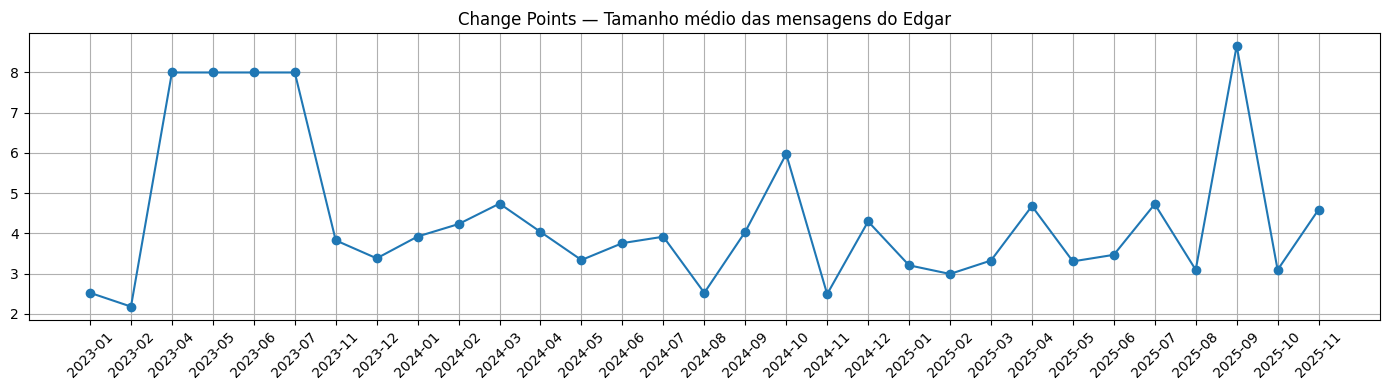

Breakpoints detectados nos índices: [31]
Meses correspondentes: ['2025-11']


In [48]:
# ============================================================
# CHANGE POINT DETECTION — MUDANÇAS NA COMUNICAÇÃO AO LONGO DO TEMPO
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

nome_filho = "Edgar vivo"
df_filho = df[df["sender"] == nome_filho].copy()

# Construir série temporal mensal
df_filho["month"] = df_filho["datetime"].dt.to_period("M")
series = df_filho.groupby("month")["word_count"].mean()

# Converter para array
signal = series.values

# Modelo Pelt — custo "rbf" detecta rupturas não lineares
algo = rpt.Pelt(model="rbf").fit(signal)
breaks = algo.predict(pen=10)  # penalidade ajustável

# Plot
plt.figure(figsize=(14,4))
plt.plot(series.index.astype(str), signal, marker="o")
for b in breaks[:-1]:
    plt.axvline(x=b, color="red", linestyle="--")
plt.title("Change Points — Tamanho médio das mensagens do Edgar")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Breakpoints detectados nos índices:", breaks)
print("Meses correspondentes:", [str(series.index[b-1]) for b in breaks])

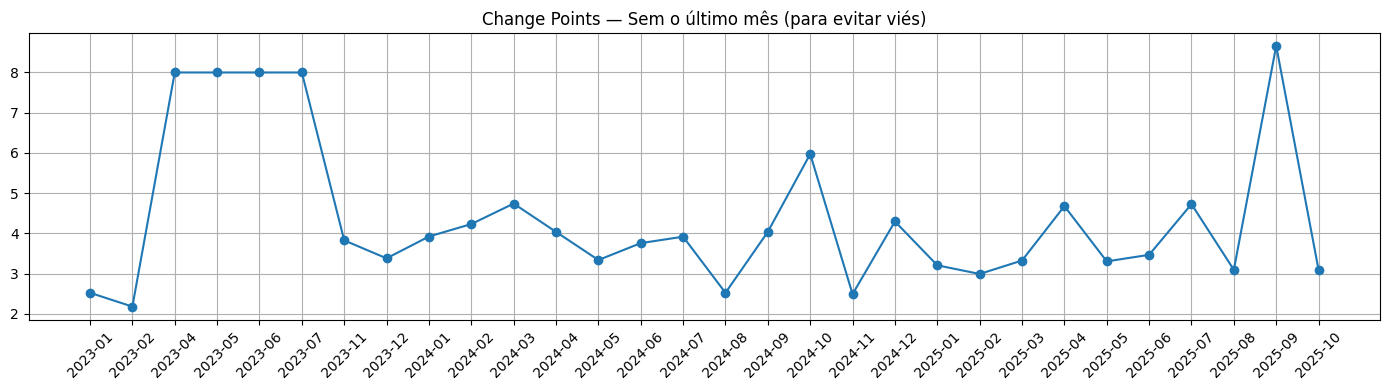

([30], ['2025-10'])

In [49]:
series_complete = series.iloc[:-1]  # remove o último mês (incompleto)

signal2 = series_complete.values

algo2 = rpt.Pelt(model="rbf").fit(signal2)
breaks2 = algo2.predict(pen=10)

plt.figure(figsize=(14,4))
plt.plot(series_complete.index.astype(str), signal2, marker="o")
for b in breaks2[:-1]:
    plt.axvline(x=b, color="red", linestyle="--")
plt.title("Change Points — Sem o último mês (para evitar viés)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

breaks2, [str(series_complete.index[b-1]) for b in breaks2 if b-1 < len(series_complete)]

In [51]:
# Garantir que df_reply tem as colunas necessárias
df_surv = df_reply.copy()

# Criar as variáveis explicativas
df_surv["msg_len"] = df_surv["message"].str.len()
df_surv["hour"] = df_surv["datetime"].dt.hour
df_surv["weekday"] = df_surv["datetime"].dt.weekday

df_surv["event"] = 1
df_surv["duration"] = df_surv["reply_minutes"]

df_surv.head()


,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,reply_minutes,weekday,event,duration
3,2023-01-20 08:56:01,Ana Alexandrino,Filho,2023-01-20,2023-01,8,text,5,False,True,Edgar vivo,2023-01-20 09:14:27,1106.0,18.433333,4,1,18.433333
6,2023-01-21 09:05:03,Ana Alexandrino,‎figurinha omitida,2023-01-21,2023-01,9,sticker,18,False,True,Edgar vivo,2023-01-21 09:10:25,322.0,5.366667,5,1,5.366667
23,2023-01-21 18:36:10,Ana Alexandrino,‎áudio ocultado,2023-01-21,2023-01,18,audio,15,False,True,Edgar vivo,2023-01-21 19:41:13,3903.0,65.050000,5,1,65.050000
29,2023-01-22 07:18:56,Ana Alexandrino,Agora ele tem q ir pra escola,2023-01-22,2023-01,7,text,29,False,True,Edgar vivo,2023-01-22 08:01:20,2544.0,42.400000,6,1,42.400000
32,2023-01-22 08:18:38,Ana Alexandrino,Eu quero,2023-01-22,2023-01,8,text,8,False,True,Edgar vivo,2023-01-22 09:14:13,3335.0,55.583333,6,1,55.583333


In [52]:
# Cox regression
cox_df = df_surv[["duration", "event", "msg_len", "hour", "weekday"]]

from lifelines import CoxPHFitter
cox = CoxPHFitter()
cox.fit(cox_df, duration_col="duration", event_col="event")

cox.print_summary()

<lifelines.CoxPHFitter: fitted with 1725 total observations, 0 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1725
number of events observed = 1725
   partial log-likelihood = -11134.06
         time fit was run = 2025-11-17 23:38:48 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
msg_len   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
hour       0.01      1.01      0.01           -0.00            0.02                1.00                1.02
weekday    0.02      1.02      0.01           -0.01            0.04                0.99                1.04

           cmp to     z    p  -log2(p)
covariate                             
msg_len      0.00 -1.00 0.32      1.66
hour         0.00  1.07 0.28      1.81
weekday      0.00  1.26 0.21      2.27
---
Concordance = 0.53
Partial AIC = 22274.12
log-likelihood ratio test = 3.96 on 3 df
-log2(p) of ll-ratio test = 1.91

In [53]:
import pandas as pd

# ---------------------------------------------
# 1. ORDENAR O DATASET
# ---------------------------------------------
df_sorted = df.sort_values("datetime").reset_index(drop=True)

# Marcar quem é Ana
df_sorted["is_ana"] = df_sorted["sender"] == "Ana Alexandrino"

# ---------------------------------------------
# 2. CRIAR BURSTS DE MENSAGENS DA ANA
# Cada sequência contínua de mensagens suas conta como 1 "pedido"
# ---------------------------------------------
df_sorted["burst_id"] = (
    (df_sorted["is_ana"] & (~df_sorted["is_ana"].shift(1).fillna(False))).cumsum()
)

# Só bursts da Ana
bursts = df_sorted[df_sorted["is_ana"]].groupby("burst_id").last().reset_index()

# ---------------------------------------------
# 3. PARA CADA BURST, ACHAR A PRIMEIRA MENSAGEM DO FILHO
# ---------------------------------------------
reply_records = []

for _, row in bursts.iterrows():
    t0 = row["datetime"]  # horário da ÚLTIMA msg do burst
    burst_id = row["burst_id"]

    # próximas mensagens dele após esse burst
    next_msgs = df_sorted[
        (df_sorted["datetime"] > t0) &
        (df_sorted["sender"] == "Edgar vivo")
    ]
    
    if len(next_msgs) > 0:
        t1 = next_msgs.iloc[0]["datetime"]
        delta = (t1 - t0).total_seconds() / 60.0  # minutos
    else:
        t1 = None
        delta = None

    reply_records.append({
        "burst_id": burst_id,
        "burst_time": t0,
        "reply_time": t1,
        "reply_minutes": delta
    })

df_reply_clean = pd.DataFrame(reply_records)

# ---------------------------------------------
# 4. APLICAR O CRITÉRIO: RESPONDEU ATÉ 1 HORA?
# ---------------------------------------------
df_reply_clean["responded"] = df_reply_clean["reply_minutes"].apply(
    lambda x: 1 if x is not None and x <= 60 else 0
)

# ---------------------------------------------
# 5. FILTRAR APENAS BURSTS COM RESPOSTA VÁLIDA (< = 1h)
# ---------------------------------------------
df_replies = df_reply_clean[df_reply_clean["responded"] == 1].copy()

print("Resumo:")
print(df_reply_clean["responded"].value_counts())
print("\nAmostra:")
df_reply_clean.head()

Resumo:
responded
1    1474
0     254
Name: count, dtype: int64

Amostra:


,burst_id,burst_time,reply_time,reply_minutes,responded
0,1,2023-01-20 08:56:01,2023-01-20 09:14:27,18.433333,1
1,2,2023-01-21 09:05:03,2023-01-21 09:10:25,5.366667,1
2,3,2023-01-21 18:36:10,2023-01-21 19:41:13,65.050000,0
3,4,2023-01-22 07:18:56,2023-01-22 08:01:20,42.400000,1
4,5,2023-01-22 08:18:38,2023-01-22 09:14:13,55.583333,1


In [54]:
df_reply_clean["responded"].value_counts()

responded
1    1474
0     254
Name: count, dtype: int64

In [55]:
# ---------------------------------------------
# 4. APLICAR NOVO CRITÉRIO DE RESPOSTA (≤ 30 minutos)
# ---------------------------------------------
df_reply_clean["responded"] = df_reply_clean["reply_minutes"].apply(
    lambda x: 1 if x is not None and x <= 30 else 0
)

# Dataset com todas as interações (respostas + não respostas)
print("Resumo (limite = 30 min):")
print(df_reply_clean["responded"].value_counts())

df_reply_clean.head()

Resumo (limite = 30 min):
responded
1    1420
0     308
Name: count, dtype: int64


,burst_id,burst_time,reply_time,reply_minutes,responded
0,1,2023-01-20 08:56:01,2023-01-20 09:14:27,18.433333,1
1,2,2023-01-21 09:05:03,2023-01-21 09:10:25,5.366667,1
2,3,2023-01-21 18:36:10,2023-01-21 19:41:13,65.050000,0
3,4,2023-01-22 07:18:56,2023-01-22 08:01:20,42.400000,0
4,5,2023-01-22 08:18:38,2023-01-22 09:14:13,55.583333,0


In [56]:
df_reply_clean["responded"].value_counts()

responded
1    1420
0     308
Name: count, dtype: int64

In [57]:
sample = df_reply_clean.sample(10, random_state=42)

sample

,burst_id,burst_time,reply_time,reply_minutes,responded
599,600,2024-07-12 20:55:08,2024-07-12 20:56:01,0.883333,1
1201,1202,2025-03-15 16:31:03,2025-03-15 17:28:37,57.566667,0
628,629,2024-07-21 22:19:56,2024-07-21 22:20:11,0.250000,1
1498,1499,2025-08-10 14:16:02,2025-08-10 14:16:25,0.383333,1
1263,1264,2025-04-06 20:41:46,2025-04-06 20:42:02,0.266667,1
931,932,2024-12-15 09:46:31,2024-12-15 09:50:51,4.333333,1
23,24,2023-11-01 18:29:39,2023-11-01 18:29:42,0.050000,1
844,845,2024-10-29 05:38:49,2024-10-29 06:03:20,24.516667,1
964,965,2024-12-26 12:21:18,2024-12-26 13:41:20,80.033333,0
764,765,2024-09-13 16:05:36,2024-09-13 21:32:00,326.400000,0


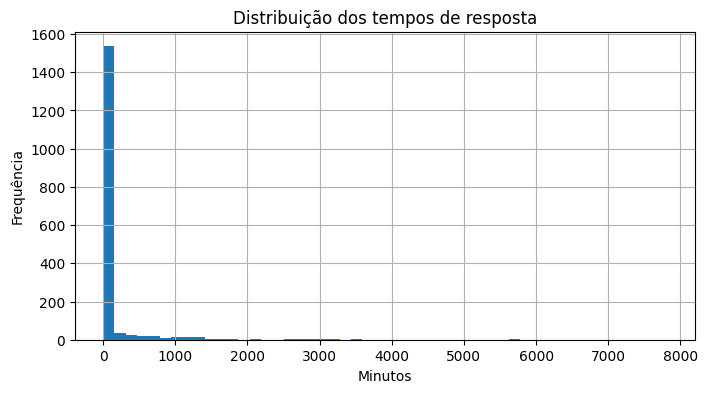

In [58]:
df_reply_clean["reply_minutes"].hist(bins=50, figsize=(8,4))
plt.title("Distribuição dos tempos de resposta")
plt.xlabel("Minutos")
plt.ylabel("Frequência")
plt.show()

In [59]:
def show_burst(burst_id, df_sorted, df_reply_clean, window=5):
    """
    Mostra o contexto completo do burst:
    - 5 mensagens antes
    - tudo durante o burst
    - a resposta dele
    """
    # df com bursts originais
    target = df_reply_clean[df_reply_clean["burst_id"] == burst_id].iloc[0]

    t0 = target["burst_time"]
    t1 = target["reply_time"]

    print("=== BURST ID:", burst_id, "===")
    print("Hora da última mensagem do burst:", t0)
    print("Hora da resposta:", t1)
    print("Tempo:", target["reply_minutes"], "min")
    print("Respondido?", target["responded"])
    print("\n--- CONTEXTO COMPLETO ---\n")

    # pegar contexto anterior
    before = df_sorted[df_sorted["datetime"] < t0].tail(window)

    # pegar mensagens do burst
    burst_msgs = df_sorted[
        (df_sorted["burst_id"] == burst_id) & (df_sorted["is_ana"])
    ]

    # pegar resposta dele
    if t1 is not None:
        reply_msgs = df_sorted[df_sorted["datetime"] == t1]
    else:
        reply_msgs = pd.DataFrame()

    display(pd.concat([before, burst_msgs, reply_msgs], axis=0))

In [60]:
show_burst(600, df_sorted, df_reply_clean)
show_burst(1202, df_sorted, df_reply_clean)
show_burst(629, df_sorted, df_reply_clean)
show_burst(1499, df_sorted, df_reply_clean)
show_burst(1264, df_sorted, df_reply_clean)
show_burst(932, df_sorted, df_reply_clean)
show_burst(24, df_sorted, df_reply_clean)
show_burst(845, df_sorted, df_reply_clean)
show_burst(965, df_sorted, df_reply_clean)
show_burst(765, df_sorted, df_reply_clean)

=== BURST ID: 600 ===
Hora da última mensagem do burst: 2024-07-12 20:55:08
Hora da resposta: 2024-07-12 20:56:01
Tempo: 0.8833333333333333 min
Respondido? 1

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
3081,2024-07-12 20:53:12,Ana Alexandrino,Da notícias filho,2024-07-12,2024-07,20,text,17,0,True,Edgar vivo,2024-07-12 20:53:24,12.0,3,2024Q3,False,598
3082,2024-07-12 20:53:24,Edgar vivo,Oi,2024-07-12,2024-07,20,text,2,1,False,Ana Alexandrino,2024-07-12 20:53:52,28.0,1,2024Q3,True,598
3083,2024-07-12 20:53:52,Ana Alexandrino,Lembra de mim?,2024-07-12,2024-07,20,text,14,0,True,Edgar vivo,2024-07-12 20:54:11,19.0,3,2024Q3,False,599
3084,2024-07-12 20:54:11,Edgar vivo,Sim,2024-07-12,2024-07,20,text,3,1,False,Ana Alexandrino,2024-07-12 20:54:18,7.0,1,2024Q3,True,599
3085,2024-07-12 20:54:18,Ana Alexandrino,Ah q bom,2024-07-12,2024-07,20,text,8,0,True,Ana Alexandrino,2024-07-12 20:55:08,50.0,3,2024Q3,False,600
3085,2024-07-12 20:54:18,Ana Alexandrino,Ah q bom,2024-07-12,2024-07,20,text,8,0,True,Ana Alexandrino,2024-07-12 20:55:08,50.0,3,2024Q3,False,600
3086,2024-07-12 20:55:08,Ana Alexandrino,Qdo vai pro Rio?,2024-07-12,2024-07,20,text,16,0,True,Edgar vivo,2024-07-12 20:56:01,53.0,4,2024Q3,False,600
3087,2024-07-12 20:56:01,Edgar vivo,Amanhã,2024-07-12,2024-07,20,text,6,1,False,Ana Alexandrino,2024-07-12 20:56:16,15.0,1,2024Q3,True,600


=== BURST ID: 1202 ===
Hora da última mensagem do burst: 2025-03-15 16:31:03
Hora da resposta: 2025-03-15 17:28:37
Tempo: 57.56666666666667 min
Respondido? 0

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
5566,2025-03-15 10:59:15,Ana Alexandrino,‎Ligação de voz. ‎Não atendida,2025-03-15,2025-03,10,text,30,0,True,Ana Alexandrino,2025-03-15 11:10:13,658.0,5,2025Q1,False,1200
5567,2025-03-15 11:10:13,Ana Alexandrino,‎Ligação de voz. ‎Não atendida,2025-03-15,2025-03,11,text,30,0,True,Edgar vivo,2025-03-15 11:15:45,332.0,5,2025Q1,False,1200
5568,2025-03-15 11:15:45,Edgar vivo,Não,2025-03-15,2025-03,11,text,3,1,False,Ana Alexandrino,2025-03-15 11:17:58,133.0,1,2025Q1,True,1200
5569,2025-03-15 11:17:58,Ana Alexandrino,Não quer ir ?,2025-03-15,2025-03,11,text,13,0,True,Edgar vivo,2025-03-15 11:18:07,9.0,4,2025Q1,False,1201
5570,2025-03-15 11:18:07,Edgar vivo,Não,2025-03-15,2025-03,11,text,3,1,False,Ana Alexandrino,2025-03-15 16:31:03,18776.0,1,2025Q1,True,1201
5571,2025-03-15 16:31:03,Ana Alexandrino,Vc mostrou o seu quarto para o paulo?,2025-03-15,2025-03,16,text,37,0,True,Edgar vivo,2025-03-15 17:28:37,3454.0,8,2025Q1,False,1202
5572,2025-03-15 17:28:37,Edgar vivo,‎vídeo omitido,2025-03-15,2025-03,17,video,14,1,False,Ana Alexandrino,2025-03-15 17:30:02,85.0,2,2025Q1,True,1202


=== BURST ID: 629 ===
Hora da última mensagem do burst: 2024-07-21 22:19:56
Hora da resposta: 2024-07-21 22:20:11
Tempo: 0.25 min
Respondido? 1

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
3180,2024-07-21 20:52:49,Ana Alexandrino,Meu amor,2024-07-21,2024-07,20,text,8,0,True,Ana Alexandrino,2024-07-21 20:52:54,5.0,2,2024Q3,True,628
3181,2024-07-21 20:52:54,Ana Alexandrino,Vc me avisa qdo chegar ?,2024-07-21,2024-07,20,text,24,0,True,Edgar vivo,2024-07-21 22:02:49,4195.0,6,2024Q3,False,628
3182,2024-07-21 22:02:49,Edgar vivo,Ss,2024-07-21,2024-07,22,text,2,1,False,Edgar vivo,2024-07-21 22:19:36,1007.0,1,2024Q3,True,628
3183,2024-07-21 22:19:36,Edgar vivo,"Mãe posso gastar 27,90 reis",2024-07-21,2024-07,22,text,27,1,False,Edgar vivo,2024-07-21 22:19:41,5.0,5,2024Q3,False,628
3184,2024-07-21 22:19:41,Edgar vivo,?,2024-07-21,2024-07,22,text,1,1,False,Ana Alexandrino,2024-07-21 22:19:56,15.0,1,2024Q3,True,628
3185,2024-07-21 22:19:56,Ana Alexandrino,Pode,2024-07-21,2024-07,22,text,4,0,True,Edgar vivo,2024-07-21 22:20:11,15.0,1,2024Q3,True,629
3186,2024-07-21 22:20:11,Edgar vivo,Obrigado,2024-07-21,2024-07,22,text,8,1,False,Ana Alexandrino,2024-07-22 17:20:57,68446.0,1,2024Q3,True,629


=== BURST ID: 1499 ===
Hora da última mensagem do burst: 2025-08-10 14:16:02
Hora da resposta: 2025-08-10 14:16:25
Tempo: 0.38333333333333336 min
Respondido? 1

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
6731,2025-08-10 13:18:46,Ana Alexandrino,Ta bom meu anjo,2025-08-10,2025-08,13,text,15,0,True,Ana Alexandrino,2025-08-10 13:19:00,14.0,4,2025Q3,False,1497
6732,2025-08-10 13:19:00,Ana Alexandrino,Tô te esperando\nEu não consegui arrumar total...,2025-08-10,2025-08,13,text,75,0,True,Edgar vivo,2025-08-10 14:12:47,3227.0,13,2025Q3,False,1497
6733,2025-08-10 14:12:47,Edgar vivo,Estou saindo,2025-08-10,2025-08,14,text,12,1,False,Ana Alexandrino,2025-08-10 14:14:04,77.0,2,2025Q3,True,1497
6734,2025-08-10 14:14:04,Ana Alexandrino,Ta bom meu amor\nMamãe ta em casa,2025-08-10,2025-08,14,text,32,0,True,Edgar vivo,2025-08-10 14:14:45,41.0,8,2025Q3,False,1498
6735,2025-08-10 14:14:45,Edgar vivo,Já pegou o cubo mágico? Se não pegou eu pego,2025-08-10,2025-08,14,text,44,1,False,Ana Alexandrino,2025-08-10 14:16:02,77.0,10,2025Q3,False,1498
6736,2025-08-10 14:16:02,Ana Alexandrino,‎imagem ocultada,2025-08-10,2025-08,14,image,16,0,True,Edgar vivo,2025-08-10 14:16:25,23.0,2,2025Q3,True,1499
6737,2025-08-10 14:16:25,Edgar vivo,Ok,2025-08-10,2025-08,14,text,2,1,False,Ana Alexandrino,2025-08-10 17:35:40,11955.0,1,2025Q3,True,1499


=== BURST ID: 1264 ===
Hora da última mensagem do burst: 2025-04-06 20:41:46
Hora da resposta: 2025-04-06 20:42:02
Tempo: 0.26666666666666666 min
Respondido? 1

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
5790,2025-04-06 20:40:22,Edgar vivo,Não dá,2025-04-06,2025-04,20,text,6,1,False,Ana Alexandrino,2025-04-06 20:40:33,11.0,2,2025Q2,True,1262
5791,2025-04-06 20:40:33,Ana Alexandrino,"Filho, eu vou ser forte pelo vovô\nE ele queri...",2025-04-06,2025-04,20,text,73,0,True,Ana Alexandrino,2025-04-06 20:41:06,33.0,16,2025Q2,False,1263
5792,2025-04-06 20:41:06,Ana Alexandrino,"Meu amor, eu não consigo passar o dia atrás de...",2025-04-06,2025-04,20,text,110,0,True,Edgar vivo,2025-04-06 20:41:18,12.0,22,2025Q2,False,1263
5793,2025-04-06 20:41:18,Edgar vivo,Mas não dá,2025-04-06,2025-04,20,text,10,1,False,Ana Alexandrino,2025-04-06 20:41:24,6.0,3,2025Q2,False,1263
5794,2025-04-06 20:41:24,Ana Alexandrino,"Durante o dia, eu preciso trabalhar\nIsso não ...",2025-04-06,2025-04,20,text,87,0,True,Ana Alexandrino,2025-04-06 20:41:46,22.0,16,2025Q2,False,1264
5794,2025-04-06 20:41:24,Ana Alexandrino,"Durante o dia, eu preciso trabalhar\nIsso não ...",2025-04-06,2025-04,20,text,87,0,True,Ana Alexandrino,2025-04-06 20:41:46,22.0,16,2025Q2,False,1264
5795,2025-04-06 20:41:46,Ana Alexandrino,A verdade eh que eu te amo\nE vou tentar ser a...,2025-04-06,2025-04,20,text,65,0,True,Edgar vivo,2025-04-06 20:42:02,16.0,16,2025Q2,False,1264
5796,2025-04-06 20:42:02,Edgar vivo,É impossível mudar a programação de um computador,2025-04-06,2025-04,20,text,49,1,False,Edgar vivo,2025-04-06 20:42:20,18.0,8,2025Q2,False,1264


=== BURST ID: 932 ===
Hora da última mensagem do burst: 2024-12-15 09:46:31
Hora da resposta: 2024-12-15 09:50:51
Tempo: 4.333333333333333 min
Respondido? 1

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
4548,2024-12-15 09:22:59,Ana Alexandrino,Tive que caminhar,2024-12-15,2024-12,9,text,17,0,True,Ana Alexandrino,2024-12-15 09:23:05,6.0,3,2024Q4,False,931
4549,2024-12-15 09:23:05,Ana Alexandrino,Fiz o meu pior tempo 😔,2024-12-15,2024-12,9,text,22,0,True,Edgar vivo,2024-12-15 09:23:15,10.0,6,2024Q4,False,931
4550,2024-12-15 09:23:15,Edgar vivo,Mas foi bem,2024-12-15,2024-12,9,text,11,1,False,Edgar vivo,2024-12-15 09:31:29,494.0,3,2024Q4,False,931
4551,2024-12-15 09:31:29,Edgar vivo,Vc sabe o tanto de gente q não consegue o que ...,2024-12-15,2024-12,9,text,60,1,False,Ana Alexandrino,2024-12-15 09:46:20,891.0,15,2024Q4,False,931
4552,2024-12-15 09:46:20,Ana Alexandrino,Você não sabe o quanto foi importante ler isso...,2024-12-15,2024-12,9,text,62,0,True,Ana Alexandrino,2024-12-15 09:46:31,11.0,12,2024Q4,False,932
4552,2024-12-15 09:46:20,Ana Alexandrino,Você não sabe o quanto foi importante ler isso...,2024-12-15,2024-12,9,text,62,0,True,Ana Alexandrino,2024-12-15 09:46:31,11.0,12,2024Q4,False,932
4553,2024-12-15 09:46:31,Ana Alexandrino,Obrigada por ser uma criança tão linda!,2024-12-15,2024-12,9,text,39,0,True,Edgar vivo,2024-12-15 09:50:51,260.0,7,2024Q4,False,932
4554,2024-12-15 09:50:51,Edgar vivo,Messi bateu 641 faltas:61 foram gols\nElvis Pr...,2024-12-15,2024-12,9,text,151,1,False,Edgar vivo,2024-12-15 09:51:13,22.0,25,2024Q4,False,932


=== BURST ID: 24 ===
Hora da última mensagem do burst: 2023-11-01 18:29:39
Hora da resposta: 2023-11-01 18:29:42
Tempo: 0.05 min
Respondido? 1

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
700,2023-07-07 10:45:31,Edgar vivo,‎Seu código de segurança com Edgar vivo mudou.,2023-07-07,2023-07,10,text,46,1,False,Edgar vivo,2023-11-01 14:07:53,10120942.0,8,2023Q3,False,23
701,2023-11-01 14:07:53,Edgar vivo,Oi mãe,2023-11-01,2023-11,14,text,6,1,False,Ana Alexandrino,2023-11-01 18:29:22,15689.0,2,2023Q4,True,23
702,2023-11-01 18:29:22,Ana Alexandrino,Oie,2023-11-01,2023-11,18,text,3,0,True,Ana Alexandrino,2023-11-01 18:29:25,3.0,1,2023Q4,True,24
703,2023-11-01 18:29:25,Ana Alexandrino,‎figurinha omitida,2023-11-01,2023-11,18,sticker,18,0,True,Ana Alexandrino,2023-11-01 18:29:33,8.0,2,2023Q4,True,24
704,2023-11-01 18:29:33,Ana Alexandrino,‎figurinha omitida,2023-11-01,2023-11,18,sticker,18,0,True,Ana Alexandrino,2023-11-01 18:29:39,6.0,2,2023Q4,True,24
702,2023-11-01 18:29:22,Ana Alexandrino,Oie,2023-11-01,2023-11,18,text,3,0,True,Ana Alexandrino,2023-11-01 18:29:25,3.0,1,2023Q4,True,24
703,2023-11-01 18:29:25,Ana Alexandrino,‎figurinha omitida,2023-11-01,2023-11,18,sticker,18,0,True,Ana Alexandrino,2023-11-01 18:29:33,8.0,2,2023Q4,True,24
704,2023-11-01 18:29:33,Ana Alexandrino,‎figurinha omitida,2023-11-01,2023-11,18,sticker,18,0,True,Ana Alexandrino,2023-11-01 18:29:39,6.0,2,2023Q4,True,24
705,2023-11-01 18:29:39,Ana Alexandrino,‎figurinha omitida,2023-11-01,2023-11,18,sticker,18,0,True,Edgar vivo,2023-11-01 18:29:42,3.0,2,2023Q4,True,24
706,2023-11-01 18:29:42,Edgar vivo,Começou,2023-11-01,2023-11,18,text,7,1,False,Edgar vivo,2023-11-01 18:30:16,34.0,1,2023Q4,True,24


=== BURST ID: 845 ===
Hora da última mensagem do burst: 2024-10-29 05:38:49
Hora da resposta: 2024-10-29 06:03:20
Tempo: 24.516666666666666 min
Respondido? 1

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
4111,2024-10-28 10:15:44,Ana Alexandrino,A de estará lá,2024-10-28,2024-10,10,text,14,0,True,Ana Alexandrino,2024-10-28 10:16:07,23.0,4,2024Q4,False,844
4112,2024-10-28 10:16:07,Ana Alexandrino,Queria q ele ficasse uns dias aqui comigo,2024-10-28,2024-10,10,text,41,0,True,Ana Alexandrino,2024-10-28 10:16:11,4.0,8,2024Q4,False,844
4113,2024-10-28 10:16:11,Ana Alexandrino,Pra me ajudar,2024-10-28,2024-10,10,text,13,0,True,Edgar vivo,2024-10-28 10:16:26,15.0,3,2024Q4,False,844
4114,2024-10-28 10:16:26,Edgar vivo,Ele não vai poder,2024-10-28,2024-10,10,text,17,1,False,Ana Alexandrino,2024-10-28 12:56:37,9611.0,4,2024Q4,False,844
4115,2024-10-28 12:56:37,Ana Alexandrino,Ta bom meu amor,2024-10-28,2024-10,12,text,15,0,True,Ana Alexandrino,2024-10-29 05:38:49,60132.0,4,2024Q4,False,845
4115,2024-10-28 12:56:37,Ana Alexandrino,Ta bom meu amor,2024-10-28,2024-10,12,text,15,0,True,Ana Alexandrino,2024-10-29 05:38:49,60132.0,4,2024Q4,False,845
4116,2024-10-29 05:38:49,Ana Alexandrino,‎áudio ocultado,2024-10-29,2024-10,5,audio,15,0,True,Edgar vivo,2024-10-29 06:03:20,1471.0,2,2024Q4,True,845
4117,2024-10-29 06:03:20,Edgar vivo,Acordei,2024-10-29,2024-10,6,text,7,1,False,Ana Alexandrino,2024-10-29 06:03:52,32.0,1,2024Q4,True,845


=== BURST ID: 965 ===
Hora da última mensagem do burst: 2024-12-26 12:21:18
Hora da resposta: 2024-12-26 13:41:20
Tempo: 80.03333333333333 min
Respondido? 0

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
4684,2024-12-26 08:45:29,Edgar vivo,Tv *,2024-12-26,2024-12,8,text,4,1,False,Ana Alexandrino,2024-12-26 10:37:29,6720.0,2,2024Q4,True,963
4685,2024-12-26 10:37:29,Ana Alexandrino,O novo ou Velho?,2024-12-26,2024-12,10,text,16,0,True,Edgar vivo,2024-12-26 10:37:46,17.0,4,2024Q4,False,964
4686,2024-12-26 10:37:46,Edgar vivo,Os dois,2024-12-26,2024-12,10,text,7,1,False,Ana Alexandrino,2024-12-26 10:37:54,8.0,2,2024Q4,True,964
4687,2024-12-26 10:37:54,Ana Alexandrino,Show,2024-12-26,2024-12,10,text,4,0,True,Ana Alexandrino,2024-12-26 10:37:57,3.0,1,2024Q4,True,965
4688,2024-12-26 10:37:57,Ana Alexandrino,Eu levo o novo,2024-12-26,2024-12,10,text,14,0,True,Ana Alexandrino,2024-12-26 12:21:18,6201.0,4,2024Q4,False,965
4687,2024-12-26 10:37:54,Ana Alexandrino,Show,2024-12-26,2024-12,10,text,4,0,True,Ana Alexandrino,2024-12-26 10:37:57,3.0,1,2024Q4,True,965
4688,2024-12-26 10:37:57,Ana Alexandrino,Eu levo o novo,2024-12-26,2024-12,10,text,14,0,True,Ana Alexandrino,2024-12-26 12:21:18,6201.0,4,2024Q4,False,965
4689,2024-12-26 12:21:18,Ana Alexandrino,‎vídeo omitido,2024-12-26,2024-12,12,video,14,0,True,Edgar vivo,2024-12-26 13:41:20,4802.0,2,2024Q4,True,965
4690,2024-12-26 13:41:20,Edgar vivo,Ainda dava pé e batia na minha barriga mas o l...,2024-12-26,2024-12,13,text,63,1,False,Ana Alexandrino,2024-12-26 14:16:05,2085.0,14,2024Q4,False,965


=== BURST ID: 765 ===
Hora da última mensagem do burst: 2024-09-13 16:05:36
Hora da resposta: 2024-09-13 21:32:00
Tempo: 326.4 min
Respondido? 0

--- CONTEXTO COMPLETO ---



,datetime,sender,message,date,month,hour,content_type,msg_len,is_filho,is_ana,sender_next,datetime_next,time_to_next,word_count,quarter,short_msg,burst_id
3816,2024-09-13 16:03:57,Edgar vivo,"Mãe posso sair da escola,as professoras são ch...",2024-09-13,2024-09,16,text,129,1,False,Ana Alexandrino,2024-09-13 16:04:30,33.0,24,2024Q3,False,763
3817,2024-09-13 16:04:30,Ana Alexandrino,Pq meu amor ?,2024-09-13,2024-09,16,text,13,0,True,Ana Alexandrino,2024-09-13 16:04:35,5.0,4,2024Q3,False,764
3818,2024-09-13 16:04:35,Ana Alexandrino,O q aconteceu?,2024-09-13,2024-09,16,text,14,0,True,Ana Alexandrino,2024-09-13 16:04:41,6.0,3,2024Q3,False,764
3819,2024-09-13 16:04:41,Ana Alexandrino,Posso te ligar?,2024-09-13,2024-09,16,text,15,0,True,Edgar vivo,2024-09-13 16:04:46,5.0,3,2024Q3,False,764
3820,2024-09-13 16:04:46,Edgar vivo,Ss,2024-09-13,2024-09,16,text,2,1,False,Ana Alexandrino,2024-09-13 16:05:36,50.0,1,2024Q3,True,764
3821,2024-09-13 16:05:36,Ana Alexandrino,‎Ligação de voz. ‎4 minutos,2024-09-13,2024-09,16,text,27,0,True,Edgar vivo,2024-09-13 21:32:00,19584.0,5,2024Q3,False,765
3822,2024-09-13 21:32:00,Edgar vivo,"Então isso acontece frequentemente, as pessoas...",2024-09-13,2024-09,21,text,228,1,False,Ana Alexandrino,2024-09-13 21:32:33,33.0,43,2024Q3,False,765


In [61]:
df.shape[0], df["message"].nunique()

(7704, 4022)

In [62]:
df.duplicated().sum()

np.int64(158)

In [63]:
# Remover duplicatas reais: mesma pessoa, mesmo texto, mesmo timestamp
df_clean = df.drop_duplicates(subset=["datetime", "sender", "message"]).copy()

print("Antes:", df.shape[0])
print("Depois:", df_clean.shape[0])
print("Duplicatas removidas:", df.shape[0] - df_clean.shape[0])

Antes: 7704
Depois: 7440
Duplicatas removidas: 264


In [64]:
df_clean = df_clean.drop_duplicates(subset=["datetime"]).copy()
print("Após remover timestamps duplicados:", df_clean.shape[0])

Após remover timestamps duplicados: 7366


In [65]:
print("Duplicatas reais:", df_clean.duplicated(subset=["datetime","sender","message"]).sum())
print("Timestamps duplicados:", df_clean["datetime"].duplicated().sum())

Duplicatas reais: 0
Timestamps duplicados: 0


In [66]:
print("Duplicatas reais restantes:", df_clean.duplicated(subset=["datetime","sender","message"]).sum())
print("Timestamps duplicados:", df_clean["datetime"].duplicated().sum())

Duplicatas reais restantes: 0
Timestamps duplicados: 0


In [67]:
df_sorted = df.sort_values("datetime").reset_index(drop=True)
df_sorted["is_ana"] = df_sorted["sender"] == "Ana Alexandrino"

# Calcular dif temporal entre mensagens sucessivas da Ana
df_sorted["delta"] = (
    df_sorted["datetime"] - df_sorted["datetime"].shift(1)
).dt.total_seconds() / 60

# Um burst começa quando:
# - é mensagem sua
# - E (o anterior não era seu) OU (passaram mais de 5 min)
df_sorted["new_burst"] = (
    (df_sorted["is_ana"] & (~df_sorted["is_ana"].shift(1).fillna(False))) |
    (df_sorted["is_ana"] & (df_sorted["delta"] > 5))
)

# Numerar bursts
df_sorted["burst_id"] = df_sorted["new_burst"].cumsum()

In [68]:
num_bursts = df_sorted[df_sorted["is_ana"]]["burst_id"].nunique()
num_bursts

2393

In [69]:
deltas = df_sorted[df_sorted["is_ana"]]["delta"].dropna()

print("Mediana (min):", deltas.median())
print("Média   (min):", deltas.mean())
print("P75     (min):", deltas.quantile(0.75))
print("P90     (min):", deltas.quantile(0.90))
print("P95     (min):", deltas.quantile(0.95))
print("Máximo  (min):", deltas.max())

Mediana (min): 0.35
Média   (min): 177.4783458646617
P75     (min): 18.683333333333334
P90     (min): 585.2199999999999
P95     (min): 1165.6149999999998
Máximo  (min): 9390.466666666667


In [70]:
df_sorted = df.sort_values("datetime").reset_index(drop=True)
df_sorted["is_ana"] = df_sorted["sender"] == "Ana Alexandrino"

# delta entre mensagens suas
df_sorted["delta"] = (
    df_sorted["datetime"] - df_sorted["datetime"].shift(1)
).dt.total_seconds() / 60

# novo burst quando:
# - mensagem é sua
# - e (anterior não era sua) ou (intervalo > 30 minutos)
df_sorted["new_burst"] = (
    (df_sorted["is_ana"] & (~df_sorted["is_ana"].shift(1).fillna(False))) |
    (df_sorted["is_ana"] & (df_sorted["delta"] > 30))
)

df_sorted["burst_id"] = df_sorted["new_burst"].cumsum()

num_bursts_30 = df_sorted[df_sorted["is_ana"]]["burst_id"].nunique()
num_bursts_30

2277

In [71]:
df_sorted = df.sort_values("datetime").reset_index(drop=True)
df_sorted["is_ana"] = df_sorted["sender"] == "Ana Alexandrino"

# delta correto: apenas entre mensagens da Ana
df_sorted["delta"] = (
    df_sorted.loc[df_sorted["is_ana"], "datetime"]
    .diff()
    .dt.total_seconds() / 60
)

# Preencher NaN
df_sorted["delta"] = df_sorted["delta"].fillna(9999)

In [72]:
df_sorted["new_burst"] = (
    (df_sorted["is_ana"]) &
    (
        (df_sorted["delta"] > 30) |
        (df_sorted["delta"] == 9999)  # primeira msg sua
    )
)

df_sorted["burst_id"] = df_sorted["new_burst"].cumsum()

num_bursts_fixed = df_sorted[df_sorted["is_ana"]]["burst_id"].nunique()
num_bursts_fixed

1255

In [73]:
# pegar apenas bursts da Ana
bursts = df_sorted[df_sorted["is_ana"]].groupby("burst_id").last().reset_index()
bursts = bursts.rename(columns={"datetime": "burst_time"})

# pegar respostas dele
df_him = df_sorted[~df_sorted["is_ana"]].copy()
df_him = df_him[["datetime", "message"]].rename(columns={"datetime": "reply_time"})

# merge para achar primeira resposta dele após cada burst
def get_first_reply(t):
    r = df_him[df_him["reply_time"] > t].reply_time.min()
    return r

bursts["reply_time"] = bursts["burst_time"].apply(get_first_reply)

# calcular delay
bursts["reply_minutes"] = (
    (bursts["reply_time"] - bursts["burst_time"]).dt.total_seconds() / 60
)

# resposta válida (≤ 30 min)
bursts["responded"] = bursts["reply_minutes"].apply(
    lambda x: 1 if pd.notnull(x) and x <= 30 else 0
)

bursts.head()

,burst_id,burst_time,sender,message,date,month,hour,content_type,msg_len,is_filho,...,datetime_next,time_to_next,word_count,quarter,short_msg,delta,new_burst,reply_time,reply_minutes,responded
0,1,2023-01-20 07:54:52,Ana Alexandrino,‎Cartão do contato omitido,2023-01-20,2023-01,7,contact,26,0,...,2023-01-20 08:56:01,3669.0,4,2023Q1,False,9999.000000,True,2023-01-20 09:14:27,79.583333,0
1,2,2023-01-20 08:56:01,Ana Alexandrino,Filho,2023-01-20,2023-01,8,text,5,0,...,2023-01-20 09:14:27,1106.0,1,2023Q1,True,61.150000,True,2023-01-20 09:14:27,18.433333,1
2,3,2023-01-21 09:05:03,Ana Alexandrino,‎figurinha omitida,2023-01-21,2023-01,9,sticker,18,0,...,2023-01-21 09:10:25,322.0,2,2023Q1,True,1449.033333,True,2023-01-21 09:10:25,5.366667,1
3,4,2023-01-21 18:36:10,Ana Alexandrino,‎áudio ocultado,2023-01-21,2023-01,18,audio,15,0,...,2023-01-21 19:41:13,3903.0,2,2023Q1,True,1.583333,False,2023-01-21 19:41:13,65.050000,0
4,5,2023-01-22 07:18:56,Ana Alexandrino,Agora ele tem q ir pra escola,2023-01-22,2023-01,7,text,29,0,...,2023-01-22 08:01:20,2544.0,7,2023Q1,False,0.100000,False,2023-01-22 08:01:20,42.400000,0


In [74]:
bursts["responded"].value_counts()

responded
0    856
1    399
Name: count, dtype: int64

In [75]:
bursts.loc[bursts["responded"] == 1, "reply_minutes"].describe()

count    399.000000
mean       3.138596
std        6.353392
min        0.016667
25%        0.150000
50%        0.333333
75%        1.541667
max       29.933333
Name: reply_minutes, dtype: float64

In [76]:
print(bursts.loc[bursts["responded"] == 0, "reply_minutes"].describe())

count      854.000000
mean      1310.849785
std       1780.030283
min         30.066667
25%        174.883333
50%        727.716667
75%       1518.870833
max      15514.433333
Name: reply_minutes, dtype: float64


In [78]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Copiamos bursts para não bagunçar o original
bursts_km = bursts.copy()

# Garantir tipos numéricos
bursts_km["reply_minutes"] = pd.to_numeric(bursts_km["reply_minutes"], errors="coerce")
bursts_km["responded"] = bursts_km["responded"].astype(int)

# Remover linhas onde não temos tempo de resposta (reply_minutes NaN)
# (essas seriam casos em que nunca houve resposta MESMO)
bursts_km = bursts_km.dropna(subset=["reply_minutes"])

print(bursts_km[["reply_minutes", "responded"]].dtypes)
print("N linhas usadas no KM:", len(bursts_km))

reply_minutes    float64
responded          int64
dtype: object
N linhas usadas no KM: 1253


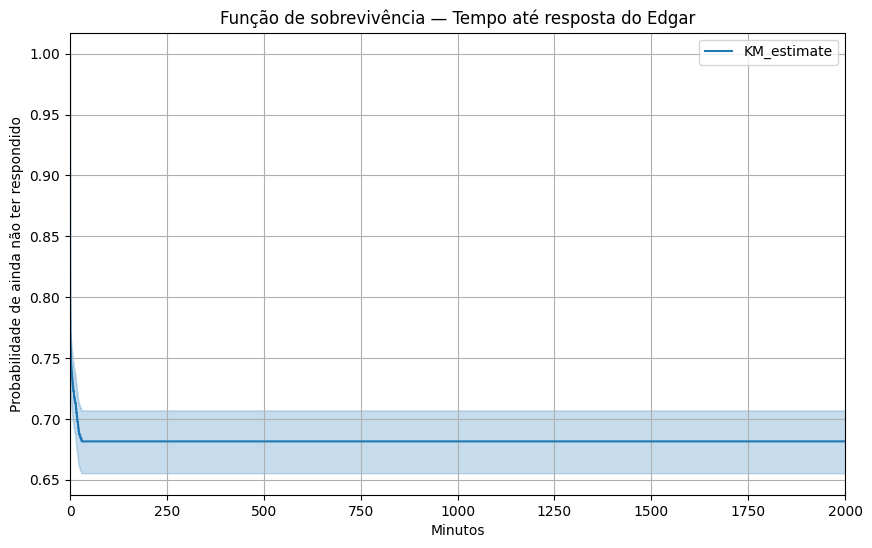

In [79]:
km = KaplanMeierFitter()

plt.figure(figsize=(10,6))

km.fit(
    durations=bursts_km["reply_minutes"],
    event_observed=bursts_km["responded"]
)

km.plot_survival_function()
plt.title("Função de sobrevivência — Tempo até resposta do Edgar")
plt.xlabel("Minutos")
plt.ylabel("Probabilidade de ainda não ter respondido")
plt.xlim(0, 2000)  # até ~2 dias, só pra enxergar melhor
plt.grid(True)
plt.show()

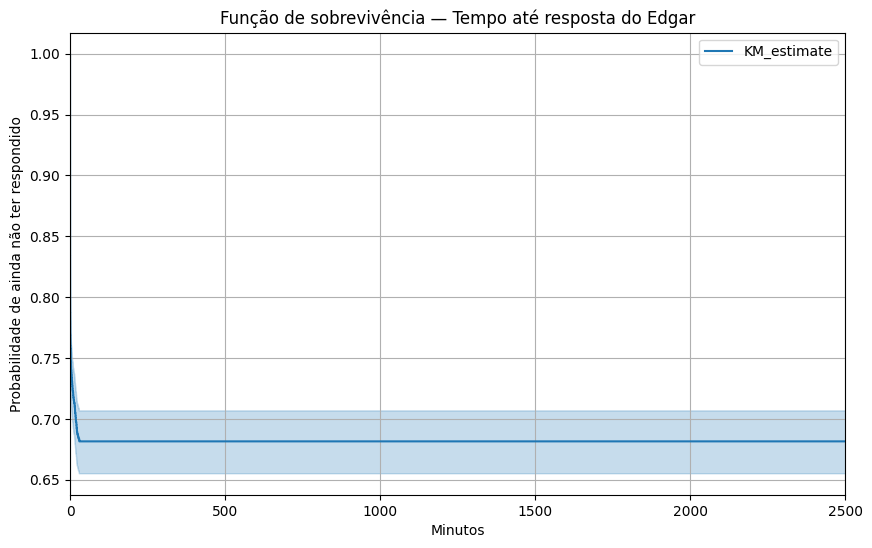

In [80]:
km = KaplanMeierFitter()

plt.figure(figsize=(10,6))

km.fit(
    durations=bursts_km["reply_minutes"],
    event_observed=bursts_km["responded"]
)

km.plot_survival_function()
plt.title("Função de sobrevivência — Tempo até resposta do Edgar")
plt.xlabel("Minutos")
plt.ylabel("Probabilidade de ainda não ter respondido")
plt.xlim(0, 2500)  # ~ 1.7 dias
plt.grid(True)
plt.show()

In [81]:
from lifelines import CoxPHFitter

cox_df = bursts_km.copy()

# Features adicionais:
cox_df["hour"] = cox_df["burst_time"].dt.hour
cox_df["weekday"] = cox_df["burst_time"].dt.weekday
cox_df["msg_len"] = bursts_km["message"].str.len().fillna(0)

# Remover NaN se houver
cox_df = cox_df.dropna(subset=["reply_minutes","responded"])

cox = CoxPHFitter()
cox.fit(cox_df[["reply_minutes","responded","msg_len","hour","weekday"]],
        duration_col="reply_minutes", event_col="responded")

cox.print_summary()

<lifelines.CoxPHFitter: fitted with 1253 total observations, 854 right-censored observations>
             duration col = 'reply_minutes'
                event col = 'responded'
      baseline estimation = breslow
   number of observations = 1253
number of events observed = 399
   partial log-likelihood = -2773.42
         time fit was run = 2025-11-18 00:18:29 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
msg_len   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
hour       0.02      1.02      0.01           -0.00            0.04                1.00                1.04
weekday   -0.01      0.99      0.02           -0.05            0.04                0.95                1.04

           cmp to     z    p  -log2(p)
covariate                             
msg_len      0.00 -0.55 0.58      0.78
hour         0.00  1.51 0.13      2.92
weekday      0.00 -0.21 0.83      0.26
---
Concordance = 0.52
Partial AIC = 5552.84
log-likelihood ratio test = 2.70 on 3 df
-log2(p) of ll-ratio test = 1.19

In [82]:
import pandas as pd
import numpy as np

# Partimos do DataFrame bursts já criado
bursts_nlp = bursts.copy()

# Função para filtrar mensagens que não são texto útil
def is_valid_text(msg):
    if pd.isna(msg):
        return False
    msg_clean = msg.strip().lower()
    if msg_clean == "":
        return False

    # termos de mídia omitida do WhatsApp
    lixo = [
        "áudio ocultado",
        "imagem ocultada",
        "vídeo omitido",
        "figurinha omitida",
        "cartão do contato omitido"
    ]
    return not any(p in msg_clean for p in lixo)

bursts_nlp = bursts_nlp[bursts_nlp["message"].apply(is_valid_text)].copy()

print("Total de bursts com texto útil:", len(bursts_nlp))
print(bursts_nlp[["burst_time", "message", "responded"]].head())

Total de bursts com texto útil: 1106
           burst_time                        message  responded
1 2023-01-20 08:56:01                          Filho          1
4 2023-01-22 07:18:56  Agora ele tem q ir pra escola          0
5 2023-01-22 08:18:38                       Eu quero          0
6 2023-01-22 19:26:56           Eu estou com saudade          0
7 2023-01-23 08:15:52                       Oi filho          0


In [83]:
%pip install -q sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sentence_transformers import SentenceTransformer

# Modelo multilíngue que entende bem português
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Transformar cada mensagem em um vetor numérico (embedding)
texts = bursts_nlp["message"].tolist()
embeddings = model.encode(texts, show_progress_bar=True)

embeddings.shape

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:03<00:00, 10.03it/s]


(1106, 384)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X = embeddings
y = bursts_nlp["responded"].values  # 0 ou 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",  # para compensar desbalanceamento 0/1
    n_jobs=-1
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=3))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

AUC: 0.5093590211833455
              precision    recall  f1-score   support

           0      0.678     0.655     0.667       148
           1      0.354     0.378     0.366        74

    accuracy                          0.563       222
   macro avg      0.516     0.517     0.516       222
weighted avg      0.570     0.563     0.566       222



In [86]:
%pip install hmmlearn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [87]:
import numpy as np
import pandas as pd
from hmmlearn import hmm

# Dados positivos e filtrados
df_hmm = bursts[bursts["reply_minutes"] > 0].copy()

# Matriz observacional para o HMM (n_samples, n_features)
X = df_hmm["reply_minutes"].values.reshape(-1, 1)

print("Total de observações usadas:", len(X))

Total de observações usadas: 1253


In [88]:
models = {}
scores = {}

for k in [2, 3, 4]:
    model = hmm.GaussianHMM(
        n_components=k,
        covariance_type="full",
        n_iter=200,
        random_state=42
    )
    model.fit(X)
    models[k] = model
    scores[k] = model.score(X)

scores

{2: -9740.606566174478, 3: -8660.260537786051, 4: -8301.63479205065}

In [89]:
means = best_model.means_.flatten()
vars_ = np.sqrt(best_model.covars_.flatten())

print("\n=== Estados Descobertos ===")
for i, (m, s) in enumerate(zip(means, vars_)):
    print(f"Estado {i}: média = {m:.2f} min, desvio = {s:.2f} min")

NameError: name 'best_model' is not defined

In [90]:
best_k = 4
best_model = models[best_k]

In [91]:
models = {}
scores = {}

for k in [2, 3, 4]:
    model = hmm.GaussianHMM(
        n_components=k,
        covariance_type="full",
        n_iter=200,
        random_state=42
    )
    model.fit(X)   # usa o X já criado anteriormente (reply_minutes.reshape(-1,1))
    models[k] = model
    scores[k] = model.score(X)

best_k = 4
best_model = models[4]
print("Best model:", best_k)

Best model: 4


In [92]:
means = best_model.means_.flatten()
vars_ = np.sqrt(best_model.covars_.flatten())

print("\n=== Estados Descobertos ===")
for i, (m, s) in enumerate(zip(means, vars_)):
    print(f"Estado {i}: média = {m:.2f} min, desvio = {s:.2f} min")


=== Estados Descobertos ===
Estado 0: média = 0.29 min, desvio = 0.22 min
Estado 1: média = 887.28 min, desvio = 516.80 min
Estado 2: média = 3682.66 min, desvio = 2391.89 min
Estado 3: média = 73.24 min, desvio = 64.64 min


In [94]:
# X já é o array de reply_minutes.reshape(-1, 1)
states = best_model.predict(X)  # estado HMM de cada burst

df_hmm["state"] = states

df_hmm[["reply_minutes", "state"]].head()

,reply_minutes,state
0,79.583333,3
1,18.433333,3
2,5.366667,3
3,65.050000,3
4,42.400000,3


In [95]:
print("Frequência de cada estado:")
print(df_hmm["state"].value_counts())


Frequência de cada estado:
state
1    438
3    358
0    287
2    170
Name: count, dtype: int64


In [96]:
print("\nMatriz de transição:")
print(best_model.transmat_)


Matriz de transição:
[[0.24702045 0.35142693 0.15041266 0.25113995]
 [0.22499325 0.44364895 0.03663228 0.29472551]
 [0.10713053 0.32992309 0.52802947 0.03491691]
 [0.28214958 0.23661476 0.09433187 0.38690378]]


In [97]:
import pandas as pd
import numpy as np
import re
import emoji
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from textblob import TextBlob
from hmmlearn import hmm

df = bursts.copy()

# =========================================================
# 1. FEATURES TEMPORAIS
# =========================================================
df["hour"] = df["burst_time"].dt.hour
df["weekday"] = df["burst_time"].dt.weekday
df["day"] = df["burst_time"].dt.day
df["month"] = df["burst_time"].dt.month

# Períodos do dia
def period_of_day(h):
    if 5 <= h < 12: return "morning"
    if 12 <= h < 18: return "afternoon"
    if 18 <= h < 23: return "evening"
    return "night"

df["period"] = df["hour"].apply(period_of_day)
df = pd.get_dummies(df, columns=["period"], prefix="period")

# Fim de semana
df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)


# =========================================================
# 2. FEATURES DE MENSAGENS
# =========================================================
# Tamanho da mensagem
df["msg_len"] = df["message"].fillna("").astype(str).str.len()

# Nº de palavras
df["word_count"] = df["message"].fillna("").astype(str).str.split().str.len()

# Emojis
df["emoji_count"] = df["message"].apply(lambda x: sum(c in emoji.EMOJI_DATA for c in str(x)))

# Contém pergunta?
df["has_question"] = df["message"].str.contains(r"\?").fillna(False).astype(int)

# Mensagens mínimas
minimal_tokens = {"ok", "kk", "k", "ta", "tá", "blz", "sim", "nao", "não"}
df["is_minimal"] = df["message"].str.lower().apply(lambda x: 1 if x in minimal_tokens else 0)


# =========================================================
# 3. FEATURES DE HISTÓRICO
# =========================================================

# Quantas mensagens suas no burst
df["msgs_in_burst"] = df["msgs_in_burst"]  # já existe no bursts original

# Tempo desde sua última mensagem
df = df.sort_values("burst_time").reset_index(drop=True)
df["time_since_last_msg"] = (
    df["burst_time"] - df["burst_time"].shift(1)
).dt.total_seconds() / 60
df["time_since_last_msg"] = df["time_since_last_msg"].fillna(df["time_since_last_msg"].median())

# Tempo desde a última resposta do Edgar
df["time_since_last_response"] = df["reply_minutes"].shift(1)
df["time_since_last_response"] = df["time_since_last_response"].fillna(
    df["time_since_last_response"].median()
)

# Rolling statistics (resposta do Edgar)
df["rolling_mean_reply"] = df["reply_minutes"].rolling(5, min_periods=1).mean()
df["rolling_median_reply"] = df["reply_minutes"].rolling(5, min_periods=1).median()
df["rolling_std_reply"] = df["reply_minutes"].rolling(5, min_periods=1).std().fillna(0)


# =========================================================
# 4. NLP — EMBEDDINGS + CLUSTERS SEMÂNTICOS
# =========================================================

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

texts = df["message"].fillna("").tolist()
embeddings = model.encode(texts, show_progress_bar=True)

k = 6  # número de clusters semânticos
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["semantic_cluster"] = kmeans.fit_predict(embeddings)


# =========================================================
# 5. SENTIMENTO
# =========================================================
def sentiment_score(text):
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity
    except:
        return 0

df["sentiment"] = df["message"].fillna("").apply(sentiment_score)


# =========================================================
# 6. HMM — ESTADOS EMOCIONAIS DO EDGAR
# =========================================================

X = df["reply_minutes"].clip(lower=0.01).values.reshape(-1, 1)

hmm_model = hmm.GaussianHMM(
    n_components=4,
    covariance_type="full",
    n_iter=200,
    random_state=42
).fit(X)

df["hmm_state"] = hmm_model.predict(X)

# Probabilidades de cada estado
posteriors = hmm_model.predict_proba(X)
for i in range(4):
    df[f"hmm_state_prob_{i}"] = posteriors[:, i]


# =========================================================
# 7. Padronização para ML/Bayesian
# =========================================================
cols_to_scale = [
    "msg_len", "word_count", "emoji_count", "msgs_in_burst",
    "time_since_last_msg", "time_since_last_response",
    "rolling_mean_reply", "rolling_median_reply", "rolling_std_reply",
    "hour", "weekday"
]

for c in cols_to_scale:
    df[f"z_{c}"] = (df[c] - df[c].mean()) / df[c].std()

df.head()

ModuleNotFoundError: No module named 'emoji'

In [98]:
%pip install --upgrade emoji

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [99]:
import pandas as pd
import numpy as np
import re
import emoji
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from textblob import TextBlob
from hmmlearn import hmm

df = bursts.copy()

# =========================================================
# 1. FEATURES TEMPORAIS
# =========================================================
df["hour"] = df["burst_time"].dt.hour
df["weekday"] = df["burst_time"].dt.weekday
df["day"] = df["burst_time"].dt.day
df["month"] = df["burst_time"].dt.month

# Períodos do dia
def period_of_day(h):
    if 5 <= h < 12: return "morning"
    if 12 <= h < 18: return "afternoon"
    if 18 <= h < 23: return "evening"
    return "night"

df["period"] = df["hour"].apply(period_of_day)
df = pd.get_dummies(df, columns=["period"], prefix="period")

# Fim de semana
df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)


# =========================================================
# 2. FEATURES DE MENSAGENS
# =========================================================
# Tamanho da mensagem
df["msg_len"] = df["message"].fillna("").astype(str).str.len()

# Nº de palavras
df["word_count"] = df["message"].fillna("").astype(str).str.split().str.len()

# Emojis
df["emoji_count"] = df["message"].apply(lambda x: sum(c in emoji.EMOJI_DATA for c in str(x)))

# Contém pergunta?
df["has_question"] = df["message"].str.contains(r"\?").fillna(False).astype(int)

# Mensagens mínimas
minimal_tokens = {"ok", "kk", "k", "ta", "tá", "blz", "sim", "nao", "não"}
df["is_minimal"] = df["message"].str.lower().apply(lambda x: 1 if x in minimal_tokens else 0)


# =========================================================
# 3. FEATURES DE HISTÓRICO
# =========================================================

# Quantas mensagens suas no burst
df["msgs_in_burst"] = df["msgs_in_burst"]  # já existe no bursts original

# Tempo desde sua última mensagem
df = df.sort_values("burst_time").reset_index(drop=True)
df["time_since_last_msg"] = (
    df["burst_time"] - df["burst_time"].shift(1)
).dt.total_seconds() / 60
df["time_since_last_msg"] = df["time_since_last_msg"].fillna(df["time_since_last_msg"].median())

# Tempo desde a última resposta do Edgar
df["time_since_last_response"] = df["reply_minutes"].shift(1)
df["time_since_last_response"] = df["time_since_last_response"].fillna(
    df["time_since_last_response"].median()
)

# Rolling statistics (resposta do Edgar)
df["rolling_mean_reply"] = df["reply_minutes"].rolling(5, min_periods=1).mean()
df["rolling_median_reply"] = df["reply_minutes"].rolling(5, min_periods=1).median()
df["rolling_std_reply"] = df["reply_minutes"].rolling(5, min_periods=1).std().fillna(0)


# =========================================================
# 4. NLP — EMBEDDINGS + CLUSTERS SEMÂNTICOS
# =========================================================

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

texts = df["message"].fillna("").tolist()
embeddings = model.encode(texts, show_progress_bar=True)

k = 6  # número de clusters semânticos
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["semantic_cluster"] = kmeans.fit_predict(embeddings)


# =========================================================
# 5. SENTIMENTO
# =========================================================
def sentiment_score(text):
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity
    except:
        return 0

df["sentiment"] = df["message"].fillna("").apply(sentiment_score)


# =========================================================
# 6. HMM — ESTADOS EMOCIONAIS DO EDGAR
# =========================================================

X = df["reply_minutes"].clip(lower=0.01).values.reshape(-1, 1)

hmm_model = hmm.GaussianHMM(
    n_components=4,
    covariance_type="full",
    n_iter=200,
    random_state=42
).fit(X)

df["hmm_state"] = hmm_model.predict(X)

# Probabilidades de cada estado
posteriors = hmm_model.predict_proba(X)
for i in range(4):
    df[f"hmm_state_prob_{i}"] = posteriors[:, i]


# =========================================================
# 7. Padronização para ML/Bayesian
# =========================================================
cols_to_scale = [
    "msg_len", "word_count", "emoji_count", "msgs_in_burst",
    "time_since_last_msg", "time_since_last_response",
    "rolling_mean_reply", "rolling_median_reply", "rolling_std_reply",
    "hour", "weekday"
]

for c in cols_to_scale:
    df[f"z_{c}"] = (df[c] - df[c].mean()) / df[c].std()

df.head()

ModuleNotFoundError: No module named 'textblob'

In [100]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anacarolinaalexandrino/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [102]:
import textblob
print(textblob.__version__)

ModuleNotFoundError: No module named 'textblob'

In [103]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anacarolinaalexandrino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
bursts.columns

Index(['burst_id', 'burst_time', 'sender', 'message', 'date', 'month', 'hour',
       'content_type', 'msg_len', 'is_filho', 'is_ana', 'sender_next',
       'datetime_next', 'time_to_next', 'word_count', 'quarter', 'short_msg',
       'delta', 'new_burst', 'reply_time', 'reply_minutes', 'responded'],
      dtype='object')

In [108]:
import pandas as pd
import numpy as np

# Partimos do DataFrame bursts
df_feat = bursts.copy().reset_index(drop=True)

# ===============================
# 1. FEATURES TEMPORAIS
# ===============================

# Vamos garantir que burst_time é datetime
df_feat["burst_time"] = pd.to_datetime(df_feat["burst_time"])

# Hora já existe, mas garantimos que é numérica
df_feat["hour"] = df_feat["hour"].astype(int)

# Dia da semana (0=segunda, 6=domingo)
df_feat["weekday"] = df_feat["burst_time"].dt.weekday

# Fim de semana
df_feat["is_weekend"] = df_feat["weekday"].isin([5, 6]).astype(int)

# Tempo desde o burst anterior (em minutos)
df_feat = df_feat.sort_values("burst_time").reset_index(drop=True)
df_feat["time_since_last_burst"] = (
    df_feat["burst_time"] - df_feat["burst_time"].shift(1)
).dt.total_seconds() / 60

# Preenche o primeiro valor com a mediana
df_feat["time_since_last_burst"] = df_feat["time_since_last_burst"].fillna(
    df_feat["time_since_last_burst"].median()
)

# ===============================
# 2. FEATURES DE TEXTO
# ===============================

# Garantir coluna message como string
df_feat["message"] = df_feat["message"].fillna("").astype(str)

# msg_len e word_count já existem, então só garantimos tipos
df_feat["msg_len"] = df_feat["msg_len"].astype(int)
df_feat["word_count"] = df_feat["word_count"].astype(int)

# Tem interrogação?
df_feat["has_question"] = df_feat["message"].str.contains(r"\?").fillna(False).astype(int)

# Mensagens mínimas ("ok", "tá", "blz"...)
minimal_tokens = {"ok", "kk", "k", "ta", "tá", "blz", "sim", "nao", "não"}

def is_minimal(text):
    txt = text.strip().lower()
    return 1 if txt in minimal_tokens else 0

df_feat["is_minimal"] = df_feat["message"].apply(is_minimal)

# ===============================
# 3. FEATURES DE HISTÓRICO SIMPLES
# ===============================

# Aqui ainda não temos msgs_in_burst separada,
# então marcamos cada burst como 1 "pedido" (podemos sofisticar depois)
df_feat["msgs_in_burst"] = 1

# ===============================
# 4. TARGET
# ===============================

# Garantir que responded é inteiro 0/1
df_feat["responded"] = df_feat["responded"].astype(int)

# ===============================
# 5. PADRONIZAÇÃO (z-score) PARA USO EM ML / BAYES
# ===============================

cols_to_scale = [
    "msg_len",
    "word_count",
    "msgs_in_burst",
    "time_since_last_burst",
    "hour",
    "weekday",
]

for c in cols_to_scale:
    m = df_feat[c].mean()
    s = df_feat[c].std()
    if s == 0 or np.isnan(s):
        s = 1.0
    df_feat[f"z_{c}"] = (df_feat[c] - m) / s

# Conferir resultado
df_feat[[ "burst_time", "message", "responded",
          "msg_len", "word_count",
          "time_since_last_burst", "hour", "weekday",
          "z_msg_len", "z_word_count", "z_time_since_last_burst"
        ]].head()

,burst_time,message,responded,msg_len,word_count,time_since_last_burst,hour,weekday,z_msg_len,z_word_count,z_time_since_last_burst
0,2023-01-20 07:54:52,‎Cartão do contato omitido,0,26,4,502.758333,7,4,-0.060929,-0.134356,-0.081146
1,2023-01-20 08:56:01,Filho,1,5,1,61.150000,8,4,-0.338890,-0.360586,-0.133670
2,2023-01-21 09:05:03,‎figurinha omitida,1,18,2,1449.033333,9,5,-0.166819,-0.285176,0.031400
3,2023-01-21 18:36:10,‎áudio ocultado,0,15,2,571.116667,18,5,-0.206527,-0.285176,-0.073016
4,2023-01-22 07:18:56,Agora ele tem q ir pra escola,0,29,7,762.766667,7,6,-0.021220,0.091874,-0.050222


In [109]:
!pip install pymc arviz --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [110]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [111]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd

# Selecionamos as features para o modelo
features = [
    "z_msg_len",
    "z_word_count",
    "z_time_since_last_burst",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday"
]

X = df_feat[features].values
y = df_feat["responded"].values

with pm.Model() as model:
    
    # Priors
    intercept = pm.Normal("intercept", 0, 2)
    betas = pm.Normal("betas", 0, 1, shape=len(features))
    
    # Likelihood
    logits = intercept + pm.math.dot(X, betas)
    p = pm.Deterministic("p", pm.math.sigmoid(logits))
    
    observed = pm.Bernoulli("observed", p, observed=y)
    
    trace = pm.sample(2000, tune=2000, target_accept=0.95)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, betas]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.


In [112]:
az.summary(trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-0.972,0.075,-1.116,-0.822,0.001,0.001,6514.0,5242.0,1.0
betas[0],-1.161,0.396,-1.966,-0.420,0.006,0.004,5188.0,5448.0,1.0
betas[1],1.108,0.379,0.395,1.860,0.005,0.004,5234.0,5447.0,1.0
betas[2],-0.243,0.210,-0.675,0.074,0.003,0.004,5421.0,3962.0,1.0
betas[3],0.680,0.135,0.417,0.949,0.002,0.001,7258.0,5711.0,1.0
...,...,...,...,...,...,...,...,...,...
p[1250],0.248,0.028,0.197,0.306,0.000,0.000,8643.0,6076.0,1.0
p[1251],0.265,0.023,0.221,0.311,0.000,0.000,7992.0,5931.0,1.0
p[1252],0.483,0.041,0.406,0.566,0.000,0.000,9293.0,6427.0,1.0
p[1253],0.353,0.038,0.281,0.429,0.000,0.000,7078.0,6088.0,1.0


In [113]:
df_feat["predicted_p"] = trace.posterior["p"].mean(dim=("chain", "draw")).values
df_feat[["predicted_p", "responded"]].head()

,predicted_p,responded
0,0.240591,0
1,0.258855,1
2,0.229387,1
3,0.264924,0
4,0.271526,0


In [114]:
import numpy as np

# Quais colunas brutas usamos e suas versões padronizadas
raw_to_z = {
    "msg_len": "z_msg_len",
    "word_count": "z_word_count",
    "time_since_last_burst": "z_time_since_last_burst",
    "hour": "z_hour",
    "weekday": "z_weekday",
}

# Guardar média e desvio usados na padronização
scaling_stats = {}
for raw, z in raw_to_z.items():
    m = df_feat[raw].mean()
    s = df_feat[raw].std()
    if s == 0 or np.isnan(s):
        s = 1.0
    scaling_stats[raw] = (m, s)

scaling_stats


{'msg_len': (np.float64(30.603187250996015), np.float64(75.55020082499956)),
 'word_count': (np.float64(5.781673306772908), np.float64(13.26085299210403)),
 'time_since_last_burst': (np.float64(1185.0240571049137),
  np.float64(8407.849835954026)),
 'hour': (np.float64(14.964940239043825), np.float64(4.714196667060468)),
 'weekday': (np.float64(3.113147410358566), np.float64(2.0011824789305286))}

In [115]:
minimal_tokens = {"ok", "kk", "k", "ta", "tá", "blz", "sim", "nao", "não"}

def build_feature_vector(text, hour, weekday, time_since_last_burst):
    """
    Constrói o vetor de features na mesma ordem do modelo:
    [z_msg_len, z_word_count, z_time_since_last_burst, has_question,
     is_minimal, z_hour, z_weekday]
    """
    text = (text or "").strip()
    msg_len = len(text)
    word_count = len(text.split()) if text else 0
    has_question = 1 if "?" in text else 0
    is_minimal = 1 if text.lower() in minimal_tokens else 0

    # padronizar com as mesmas médias/desvios do treino
    def z(raw_name, value):
        m, s = scaling_stats[raw_name]
        return (value - m) / s

    z_msg_len = z("msg_len", msg_len)
    z_word_count = z("word_count", word_count)
    z_time_since = z("time_since_last_burst", time_since_last_burst)
    z_hour = z("hour", hour)
    z_weekday = z("weekday", weekday)

    x = np.array([
        z_msg_len,
        z_word_count,
        z_time_since,
        has_question,
        is_minimal,
        z_hour,
        z_weekday,
    ], dtype=float)

    return x

In [116]:
import arviz as az

def posterior_prob_for_scenario(text, hour, weekday, time_since_last_burst):
    """
    Retorna a distribuição posterior da probabilidade de resposta (<=30 min)
    para um cenário hipotético.
    """
    x = build_feature_vector(text, hour, weekday, time_since_last_burst)

    # Pega amostras do trace
    alpha_s = trace.posterior["intercept"].values  # shape (chains, draws)
    betas_s = trace.posterior["betas"].values      # shape (chains, draws, 7)

    # Produto escalar betas · x
    # broadcasting: (chains, draws, 7) * (7,) -> (chains, draws)
    linpred = alpha_s + (betas_s * x).sum(axis=-1)

    p_s = 1 / (1 + np.exp(-linpred))  # logit^-1

    # Achatar para um vetor 1D de amostras
    p_flat = p_s.reshape(-1)

    mean_p = p_flat.mean()
    hdi_low = np.quantile(p_flat, 0.025)
    hdi_high = np.quantile(p_flat, 0.975)

    return mean_p, hdi_low, hdi_high

In [117]:
text1 = "Filho, você vem jantar comigo hoje?"
hour1 = 20         # 20h
weekday1 = 2       # quarta-feira (0=segunda)
tslb1 = 180        # 180 minutos desde o último burst (3h)

m1, lo1, hi1 = posterior_prob_for_scenario(text1, hour1, weekday1, tslb1)
print("Cenário 1 - prob. resposta (média, 2.5%, 97.5%):", m1, lo1, hi1)

Cenário 1 - prob. resposta (média, 2.5%, 97.5%): 0.4442588469542176 0.3793101432487874 0.5120714500150227


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

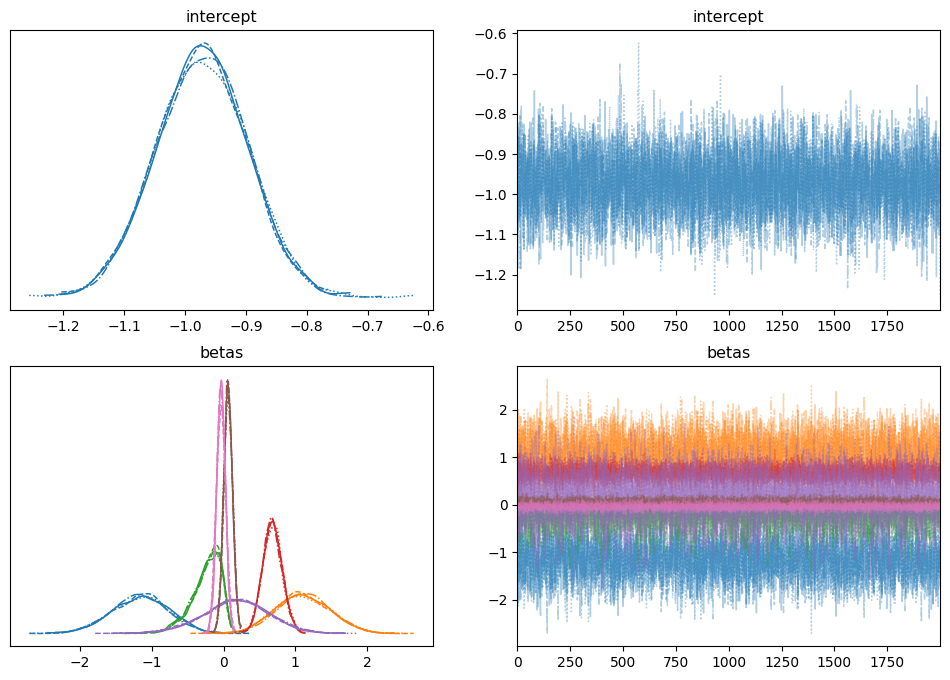

In [118]:
import arviz as az

# Trace básico dos parâmetros principais
az.plot_trace(
    trace,
    var_names=["intercept", "betas"],
    figsize=(12, 8)
)

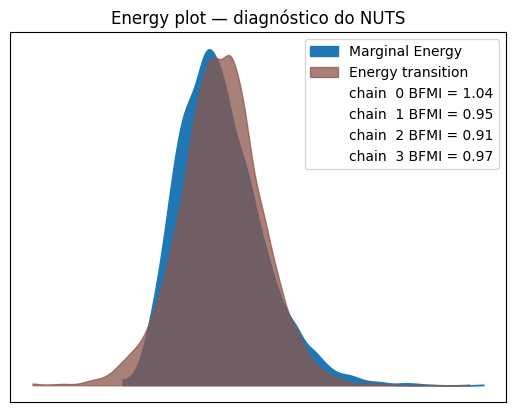

In [119]:
import arviz as az
import matplotlib.pyplot as plt

az.plot_energy(trace)
plt.title("Energy plot — diagnóstico do NUTS")
plt.show()

In [120]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

with model:
    ppc = pm.sample_posterior_predictive(
        trace,
        var_names=["observed"],  # nome da variável Bernoulli no modelo
        random_seed=42
    )

# Montar um InferenceData combinando posterior e posterior_predictive
idata_ppc = az.from_pymc(
    trace=trace,
    posterior_predictive=ppc,
    model=model
)

az.plot_ppc(
    idata_ppc,
    group="posterior",
    data_pairs={"observed": "observed"}
)
plt.title("Posterior Predictive Check — resposta em até 30 min")
plt.show()

Sampling: [observed]


AttributeError: module 'arviz' has no attribute 'from_pymc'

In [121]:
import numpy as np

raw_to_z = {
    "msg_len": "z_msg_len",
    "word_count": "z_word_count",
    "time_since_last_burst": "z_time_since_last_burst",
    "hour": "z_hour",
    "weekday": "z_weekday",
}

scaling_stats = {}
for raw, z in raw_to_z.items():
    m = df_feat[raw].mean()
    s = df_feat[raw].std()
    if s == 0 or np.isnan(s):
        s = 1.0
    scaling_stats[raw] = (m, s)

scaling_stats

{'msg_len': (np.float64(30.603187250996015), np.float64(75.55020082499956)),
 'word_count': (np.float64(5.781673306772908), np.float64(13.26085299210403)),
 'time_since_last_burst': (np.float64(1185.0240571049137),
  np.float64(8407.849835954026)),
 'hour': (np.float64(14.964940239043825), np.float64(4.714196667060468)),
 'weekday': (np.float64(3.113147410358566), np.float64(2.0011824789305286))}

In [122]:
features = [
    "z_msg_len",
    "z_word_count",
    "z_time_since_last_burst",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

minimal_tokens = {"ok", "kk", "k", "ta", "tá", "blz", "sim", "nao", "não"}

def build_feature_vector(text, hour, weekday, time_since_last_burst):
    """
    Constrói o vetor x na mesma ordem usada no modelo:
    [z_msg_len, z_word_count, z_time_since_last_burst,
     has_question, is_minimal, z_hour, z_weekday]
    """
    text = (text or "").strip()
    msg_len = len(text)
    word_count = len(text.split()) if text else 0
    has_question = 1 if "?" in text else 0
    is_minimal = 1 if text.lower() in minimal_tokens else 0

    def z(raw_name, value):
        m, s = scaling_stats[raw_name]
        return (value - m) / s

    z_msg_len = z("msg_len", msg_len)
    z_word_count = z("word_count", word_count)
    z_time_since = z("time_since_last_burst", time_since_last_burst)
    z_hour = z("hour", hour)
    z_weekday = z("weekday", weekday)

    x = np.array([
        z_msg_len,
        z_word_count,
        z_time_since,
        has_question,
        is_minimal,
        z_hour,
        z_weekday,
    ], dtype=float)

    return x

In [123]:
def posterior_prob_for_scenario(text, hour, weekday, time_since_last_burst):
    """
    Retorna (mean_p, hdi_low, hdi_high, p_samples)
      - mean_p: média da probabilidade de resposta
      - hdi_low / hdi_high: intervalo de credibilidade 95%
      - p_samples: todas as amostras MCMC de p
    """
    x = build_feature_vector(text, hour, weekday, time_since_last_burst)

    # Pega amostras MCMC de intercepto e betas
    alpha_s = trace.posterior["intercept"].values        # (chains, draws)
    betas_s = trace.posterior["betas"].values            # (chains, draws, 7)

    # Produto escalar betas·x -> (chains, draws)
    linpred = alpha_s + (betas_s * x).sum(axis=-1)

    p = 1 / (1 + np.exp(-linpred))  # logit^-1
    p_flat = p.reshape(-1)

    mean_p = p_flat.mean()
    hdi_low = np.quantile(p_flat, 0.025)
    hdi_high = np.quantile(p_flat, 0.975)

    return mean_p, hdi_low, hdi_high, p_flat

In [124]:
text1 = "Filho, você vem jantar comigo hoje?"
hour1 = 20           # 20h
weekday1 = 2         # quarta (0=segunda)
tslb1 = 180          # minutos desde o último burst (3h)

m1, lo1, hi1, p1 = posterior_prob_for_scenario(text1, hour1, weekday1, tslb1)
print(f"Cenário 1: média={m1:.3f}, 95% HDCI=({lo1:.3f}, {hi1:.3f})")

Cenário 1: média=0.444, 95% HDCI=(0.379, 0.512)


In [125]:
text2 = (
    "Filho, a mamãe está preocupada porque você não respondeu ontem, "
    "queria saber o que você está sentindo, se aconteceu alguma coisa, "
    "se você pode me ligar mais tarde para conversarmos com calma."
)
hour2 = 23
weekday2 = 4    # sexta
tslb2 = 10      # 10 min desde o último burst

m2, lo2, hi2, p2 = posterior_prob_for_scenario(text2, hour2, weekday2, tslb2)
print(f"Cenário 2: média={m2:.3f}, 95% HDCI=({lo2:.3f}, {hi2:.3f})")

Cenário 2: média=0.249, 95% HDCI=(0.167, 0.337)


In [126]:
text3 = "ok"
hour3 = 15
weekday3 = 1   # terça
tslb3 = 60

m3, lo3, hi3, p3 = posterior_prob_for_scenario(text3, hour3, weekday3, tslb3)
print(f"Cenário 3: média={m3:.3f}, 95% HDCI=({lo3:.3f}, {hi3:.3f})")

Cenário 3: média=0.341, 95% HDCI=(0.162, 0.552)


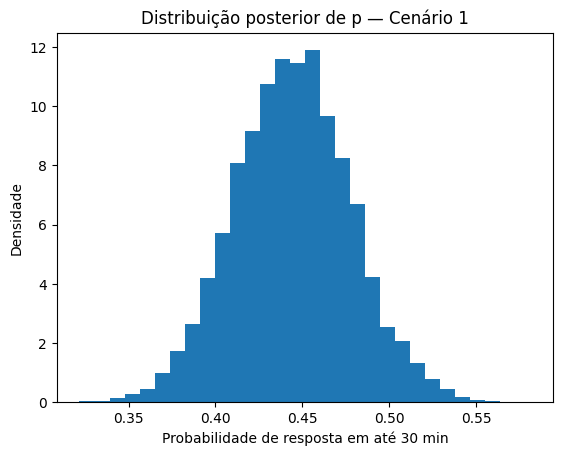

In [127]:
import matplotlib.pyplot as plt

plt.hist(p1, bins=30, density=True)
plt.title("Distribuição posterior de p — Cenário 1")
plt.xlabel("Probabilidade de resposta em até 30 min")
plt.ylabel("Densidade")
plt.show()

In [128]:
import pandas as pd
import numpy as np
import os

# Mensagens
df = pd.read_csv("../data/processed/conversas_tratadas.csv", parse_dates=["datetime"])

# Garantir colunas esperadas (ajuste se necessário)
# Esperado: datetime, sender, message, content_type, msg_len, word_count, date, month, hour

print("Colunas em df:", df.columns.tolist())

# Áudios transcritos (se existir)
audio_path = "../data/processed/audio_transcripts.csv"
if os.path.exists(audio_path):
    df_audio = pd.read_csv(audio_path)
    if "audio_datetime" in df_audio.columns:
        df_audio["audio_datetime"] = pd.to_datetime(df_audio["audio_datetime"])
else:
    df_audio = None
    print("Aviso: não encontrei ../data/processed/audio_transcripts.csv")

# Bursts (assumindo que já está em memória como 'bursts')
try:
    bursts
except NameError:
    print("Aviso: 'bursts' não está definido neste notebook.")

Colunas em df: ['datetime', 'sender', 'message', 'content_type', 'date', 'month', 'hour']


In [130]:
import numpy as np
import pandas as pd

print("==== OUTPUT: base_bursts_resumo ====")
base_bursts_resumo = {
    "n_bursts": len(bursts),
    "responded_1": int((bursts["responded"] == 1).sum()),
    "responded_0": int((bursts["responded"] == 0).sum()),
    "responded_rate": float(bursts["responded"].mean()),
}
print(base_bursts_resumo)
print()

feature_cols = [
    "z_msg_len",
    "z_word_count",
    "z_time_since_last_burst",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

print("==== OUTPUT: features_resumo ====")
features_resumo = {
    "feature_cols": feature_cols,
    "n_features": len(feature_cols),
}
print(features_resumo)
print()

==== OUTPUT: base_bursts_resumo ====
{'n_bursts': 1255, 'responded_1': 399, 'responded_0': 856, 'responded_rate': 0.3179282868525896}

==== OUTPUT: features_resumo ====
{'feature_cols': ['z_msg_len', 'z_word_count', 'z_time_since_last_burst', 'has_question', 'is_minimal', 'z_hour', 'z_weekday'], 'n_features': 7}



In [131]:
from sklearn.model_selection import train_test_split

X = df_feat[feature_cols].values
y = df_feat["responded"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

print("==== OUTPUT: split_resumo ====")
split_resumo = {
    "n_train": len(y_train),
    "n_test": len(y_test),
    "responded_rate_train": float(y_train.mean()),
    "responded_rate_test": float(y_test.mean()),
}
print(split_resumo)
print()

==== OUTPUT: split_resumo ====
{'n_train': 878, 'n_test': 377, 'responded_rate_train': 0.31776765375854216, 'responded_rate_test': 0.3183023872679045}



In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    brier_score_loss,
)

log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

auc_lr = roc_auc_score(y_test, y_proba_lr)
brier_lr = brier_score_loss(y_test, y_proba_lr)

print("==== OUTPUT: ml_logistic_metrics ====")
print("AUC:", auc_lr)
print("Brier:", brier_lr)
print("Classification report:")
print(classification_report(y_test, y_pred_lr))
print()

print("==== OUTPUT: ml_logistic_coef ====")
coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coef": log_reg.coef_[0]
})
print(coef_df)
print()

==== OUTPUT: ml_logistic_metrics ====
AUC: 0.6399156939040208
Brier: 0.2064326723600154
Classification report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       257
           1       0.00      0.00      0.00       120

    accuracy                           0.68       377
   macro avg       0.34      0.50      0.41       377
weighted avg       0.46      0.68      0.55       377


==== OUTPUT: ml_logistic_coef ====
                   feature      coef
0                z_msg_len -0.777683
1             z_word_count  0.755330
2  z_time_since_last_burst -0.214040
3             has_question  0.539731
4               is_minimal  0.055360
5                   z_hour  0.066259
6                z_weekday -0.025506



In [133]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight="balanced",
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, y_proba_rf)
brier_rf = brier_score_loss(y_test, y_proba_rf)

print("==== OUTPUT: ml_rf_metrics ====")
print("AUC:", auc_rf)
print("Brier:", brier_rf)
print("Classification report:")
print(classification_report(y_test, y_pred_rf))
print()

print("==== OUTPUT: ml_rf_feature_importances ====")
fi_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)
print(fi_df)
print()

==== OUTPUT: ml_rf_metrics ====
AUC: 0.583317120622568
Brier: 0.22495963925729442
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       257
           1       0.31      0.13      0.19       120

    accuracy                           0.63       377
   macro avg       0.49      0.50      0.47       377
weighted avg       0.56      0.63      0.58       377


==== OUTPUT: ml_rf_feature_importances ====
                   feature  importance
2  z_time_since_last_burst    0.307080
0                z_msg_len    0.225724
5                   z_hour    0.189078
1             z_word_count    0.129444
6                z_weekday    0.118241
3             has_question    0.027008
4               is_minimal    0.003425



In [134]:
print("==== OUTPUT: ml_model_comparison ====")
ml_model_comparison = pd.DataFrame({
    "model": ["logistic", "random_forest"],
    "AUC": [auc_lr, auc_rf],
    "Brier": [brier_lr, brier_rf],
})
print(ml_model_comparison)
print()

print("==== OUTPUT: ml_model_comparison_resumo ====")
print(ml_model_comparison.to_dict(orient="records"))
print()

==== OUTPUT: ml_model_comparison ====
           model       AUC     Brier
0       logistic  0.639916  0.206433
1  random_forest  0.583317  0.224960

==== OUTPUT: ml_model_comparison_resumo ====
[{'model': 'logistic', 'AUC': 0.6399156939040208, 'Brier': 0.2064326723600154}, {'model': 'random_forest', 'AUC': 0.583317120622568, 'Brier': 0.22495963925729442}]



In [135]:
import pymc as pm
import arviz as az

X_full = df_feat[feature_cols].values
y_full = df_feat["responded"].values

with pm.Model() as bayes_model:
    intercept = pm.Normal("intercept", 0, 2)
    betas = pm.Normal("betas", 0, 1, shape=len(feature_cols))

    logits = intercept + pm.math.dot(X_full, betas)
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    observed = pm.Bernoulli("observed", p, observed=y_full)

    trace = pm.sample(2000, tune=2000, target_accept=0.95, random_seed=42)

print("==== OUTPUT: mcmc_model_spec ====")
print("Modelo: regressão logística bayesiana com priors N(0,1) em betas e N(0,2) no intercept.")
print("Features:", feature_cols)
print()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, betas]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.


==== OUTPUT: mcmc_model_spec ====
Modelo: regressão logística bayesiana com priors N(0,1) em betas e N(0,2) no intercept.
Features: ['z_msg_len', 'z_word_count', 'z_time_since_last_burst', 'has_question', 'is_minimal', 'z_hour', 'z_weekday']



In [136]:
print("==== OUTPUT: mcmc_summary ====")
mcmc_summary = az.summary(trace, var_names=["intercept", "betas"], hdi_prob=0.95)
print(mcmc_summary)
print()

print("==== OUTPUT: mcmc_diagnostics ====")
mcmc_diag = mcmc_summary[["r_hat", "ess_bulk", "ess_tail"]]
print(mcmc_diag)
print()

==== OUTPUT: mcmc_summary ====
            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
intercept -0.970  0.075    -1.114     -0.822      0.001    0.001    5662.0   
betas[0]  -1.174  0.400    -1.941     -0.386      0.006    0.005    4869.0   
betas[1]   1.119  0.382     0.366      1.860      0.005    0.004    4925.0   
betas[2]  -0.240  0.203    -0.641      0.085      0.003    0.004    6334.0   
betas[3]   0.675  0.136     0.412      0.952      0.002    0.002    5371.0   
betas[4]   0.164  0.466    -0.767      1.037      0.005    0.006    9884.0   
betas[5]   0.064  0.061    -0.051      0.188      0.001    0.001    8753.0   
betas[6]  -0.036  0.061    -0.154      0.084      0.001    0.001    8701.0   

           ess_tail  r_hat  
intercept    5379.0    1.0  
betas[0]     5034.0    1.0  
betas[1]     4580.0    1.0  
betas[2]     4142.0    1.0  
betas[3]     5386.0    1.0  
betas[4]     5256.0    1.0  
betas[5]     5549.0    1.0  
betas[6]     5773.0    1.0  

====

In [138]:
import numpy as np

print("==== OUTPUT: mcmc_scenario_functions ====")

# Vamos usar as MESMAS features do modelo
feature_cols = [
    "z_msg_len",
    "z_word_count",
    "z_time_since_last_burst",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

# Estatísticas de escala tiradas do df_feat (colunas brutas)
scaling_stats = {}

for raw in ["msg_len", "word_count", "time_since_last_burst", "hour", "weekday"]:
    m = df_feat[raw].mean()
    s = df_feat[raw].std()
    if s == 0 or np.isnan(s):
        s = 1.0
    scaling_stats[raw] = (m, s)

minimal_tokens = {"ok", "kk", "k", "ta", "tá", "blz", "sim", "nao", "não"}

def build_feature_vector(text, hour, weekday, time_since_last_burst):
    """
    Constrói o vetor x na ordem do modelo:
    [z_msg_len, z_word_count, z_time_since_last_burst,
     has_question, is_minimal, z_hour, z_weekday]
    """
    text = (text or "").strip()
    msg_len = len(text)
    word_count = len(text.split()) if text else 0
    has_question = 1 if "?" in text else 0
    is_minimal = 1 if text.lower() in minimal_tokens else 0

    def z(raw_name, value):
        m, s = scaling_stats[raw_name]
        return (value - m) / s

    z_msg_len = z("msg_len", msg_len)
    z_word_count = z("word_count", word_count)
    z_time_since = z("time_since_last_burst", time_since_last_burst)
    z_hour = z("hour", hour)
    z_weekday = z("weekday", weekday)

    x = np.array([
        z_msg_len,
        z_word_count,
        z_time_since,
        has_question,
        is_minimal,
        z_hour,
        z_weekday,
    ], dtype=float)

    return x

def posterior_prob_for_scenario(text, hour, weekday, time_since_last_burst):
    """
    Usa o trace MCMC (trace) para gerar a distribuição posterior de p.
    Retorna: mean_p, hdi_low, hdi_high, p_samples
    """
    x = build_feature_vector(text, hour, weekday, time_since_last_burst)

    alpha_s = trace.posterior["intercept"].values        # (chains, draws)
    betas_s = trace.posterior["betas"].values            # (chains, draws, n_feat)

    linpred = alpha_s + (betas_s * x).sum(axis=-1)
    p = 1 / (1 + np.exp(-linpred))
    p_flat = p.reshape(-1)

    mean_p = float(p_flat.mean())
    hdi_low = float(np.quantile(p_flat, 0.025))
    hdi_high = float(np.quantile(p_flat, 0.975))

    return mean_p, hdi_low, hdi_high, p_flat

print("Funções definidas: build_feature_vector, posterior_prob_for_scenario")
print()

==== OUTPUT: mcmc_scenario_functions ====
Funções definidas: build_feature_vector, posterior_prob_for_scenario



In [139]:
print("==== OUTPUT: mcmc_scenario_1 ====")
s1 = posterior_prob_for_scenario(
    text="Filho, você vem jantar aqui hoje?",
    hour=20,
    weekday=2,
    time_since_last_burst=180
)
print("mean_p:", s1[0], "hdi_2.5%:", s1[1], "hdi_97.5%:", s1[2])
print()

print("==== OUTPUT: mcmc_scenario_2 ====")
s2 = posterior_prob_for_scenario(
    text="Só queria saber se está tudo bem.",
    hour=23,
    weekday=4,
    time_since_last_burst=10
)
print("mean_p:", s2[0], "hdi_2.5%:", s2[1], "hdi_97.5%:", s2[2])
print()

print("==== OUTPUT: mcmc_scenario_3 ====")
s3 = posterior_prob_for_scenario(
    text="ok",
    hour=15,
    weekday=1,
    time_since_last_burst=60
)
print("mean_p:", s3[0], "hdi_2.5%:", s3[1], "hdi_97.5%:", s3[2])
print()

==== OUTPUT: mcmc_scenario_1 ====
mean_p: 0.4510682334516681 hdi_2.5%: 0.3865836958152095 hdi_97.5%: 0.5161263651709542

==== OUTPUT: mcmc_scenario_2 ====
mean_p: 0.3155907968620475 hdi_2.5%: 0.25979752563581854 hdi_97.5%: 0.3756349574563733

==== OUTPUT: mcmc_scenario_3 ====
mean_p: 0.3404140992103278 hdi_2.5%: 0.1659908076193488 hdi_97.5%: 0.5515164905906913



In [140]:
print("==== Recalculando responded com limite de 120 minutos ====")

# Limite de resposta
REPLY_LIMIT = 120  # minutos

# Usar a coluna reply_minutes que já existe no bursts
bursts["responded_120min"] = (bursts["reply_minutes"] <= REPLY_LIMIT).astype(int)

# Resumo
resumo = {
    "responded_1": int(bursts["responded_120min"].sum()),
    "responded_0": int((1 - bursts["responded_120min"]).sum()),
    "total": int(len(bursts)),
    "response_rate": float(bursts["responded_120min"].mean())
}

print(resumo)

# Vamos atualizar a coluna responded para ser a de 120 minutos
bursts["responded"] = bursts["responded_120min"]

# Mostrar estatísticas de tempo de resposta para respondidos
resp_stats = bursts.loc[bursts["responded"] == 1, "reply_minutes"].describe()
print("\n=== Estatísticas de REPLY (respondidos em até 120 min) ===")
print(resp_stats)

# Mostrar estatísticas para não respondidos
notresp_stats = bursts.loc[bursts["responded"] == 0, "reply_minutes"].describe()
print("\n=== Estatísticas dos NÃO-responsivos (>120 min) ===")
print(notresp_stats)

==== Recalculando responded com limite de 120 minutos ====
{'responded_1': 559, 'responded_0': 696, 'total': 1255, 'response_rate': 0.4454183266932271}

=== Estatísticas de REPLY (respondidos em até 120 min) ===
count    559.000000
mean      20.859451
std       31.014113
min        0.016667
25%        0.200000
50%        0.900000
75%       39.008333
max      116.666667
Name: reply_minutes, dtype: float64

=== Estatísticas dos NÃO-responsivos (>120 min) ===
count      694.000000
mean      1598.065682
std       1859.836658
min        120.883333
25%        405.816667
50%       1023.241667
75%       1929.462500
max      15514.433333
Name: reply_minutes, dtype: float64


In [142]:
print("=== MACHINE LEARNING COM NOVA DEFINIÇÃO (≤120 min) ===")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ======================================================
# 1. Atualizar responded para ≤ 120 min
# ======================================================

print("\n==== 1. Atualizando variável responded ====")

bursts["responded"] = bursts["responded_120min"]
print(bursts["responded"].value_counts())
print("Proporção responded:", bursts["responded"].mean())

# ======================================================
# 2. Construir df_feat a partir de bursts
# ======================================================

print("\n==== 2. Construindo df_feat ====")

df_feat = bursts.copy()

# Garantir que burst_time é datetime
df_feat["burst_time"] = pd.to_datetime(df_feat["burst_time"])

# Garantir msg_len e word_count (se não existirem)
if "msg_len" not in df_feat.columns:
    df_feat["msg_len"] = df_feat["message"].astype(str).str.len()

if "word_count" not in df_feat.columns:
    df_feat["word_count"] = df_feat["message"].astype(str).str.split().str.len()

# Garantir hour
if "hour" not in df_feat.columns:
    df_feat["hour"] = df_feat["burst_time"].dt.hour

# Garantir weekday (0=segunda, 6=domingo)
if "weekday" not in df_feat.columns:
    df_feat["weekday"] = df_feat["burst_time"].dt.weekday

# Garantir time_since_last_burst (em minutos)
if "time_since_last_burst" not in df_feat.columns:
    if "delta" in df_feat.columns:
        if np.issubdtype(df_feat["delta"].dtype, np.number):
            df_feat["time_since_last_burst"] = df_feat["delta"]
        else:
            df_feat["time_since_last_burst"] = df_feat["delta"].dt.total_seconds() / 60.0
    else:
        # fallback: 0 para todos (se não tivermos delta)
        df_feat["time_since_last_burst"] = 0.0

print("Colunas em df_feat:", df_feat.columns.tolist())

# ======================================================
# 3. Padronização das features numéricas
# ======================================================

from sklearn.preprocessing import StandardScaler

feature_raw_cols = ["msg_len", "word_count", "time_since_last_burst", "hour", "weekday"]

scaler = StandardScaler()
df_feat[["z_msg_len",
         "z_word_count",
         "z_time_since_last_burst",
         "z_hour",
         "z_weekday"]] = scaler.fit_transform(df_feat[feature_raw_cols])

# ======================================================
# 4. Features binárias (has_question, is_minimal)
# ======================================================

df_feat["has_question"] = df_feat["message"].astype(str).str.contains(r"\?", regex=True).astype(int)

minimal_tokens = {"ok", "kk", "k", "ta", "tá", "blz", "sim", "nao", "não"}
df_feat["is_minimal"] = df_feat["message"].astype(str).str.lower().isin(minimal_tokens).astype(int)

# ======================================================
# 5. Montar X e y
# ======================================================

feature_cols = [
    "z_msg_len",
    "z_word_count",
    "z_time_since_last_burst",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

X = df_feat[feature_cols].values
y = df_feat["responded"].values

print("\nShape X:", X.shape)
print("Shape y:", y.shape)

# ======================================================
# 6. Train/test split
# ======================================================

print("\n==== 3. Train/test split ====")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Proporção responded (treino):", y_train.mean())
print("Proporção responded (teste):", y_test.mean())

# ======================================================
# 7. Logistic Regression
# ======================================================

print("\n==== 4. Logistic Regression ====")

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:, 1]

auc_lr = roc_auc_score(y_test, y_proba_lr)
brier_lr = brier_score_loss(y_test, y_proba_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("AUC:", auc_lr)
print("Brier:", brier_lr)
print("\nClassification Report:")
print(report_lr)

coef_table = pd.DataFrame({
    "feature": feature_cols,
    "coef": logreg.coef_[0]
})
print("\nCoeficientes:")
print(coef_table)

# ======================================================
# 8. Random Forest
# ======================================================

print("\n==== 5. Random Forest ====")

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, y_proba_rf)
brier_rf = brier_score_loss(y_test, y_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("AUC:", auc_rf)
print("Brier:", brier_rf)
print("\nClassification Report:")
print(report_rf)

importances = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\nImportância das features:")
print(importances)

# ======================================================
# 9. Comparação Final
# ======================================================

print("\n==== 6. Comparação Final ====")

comparison = pd.DataFrame([
    {"model": "Logistic Regression", "AUC": auc_lr, "Brier": brier_lr},
    {"model": "Random Forest", "AUC": auc_rf, "Brier": brier_rf},
])

print(comparison)

=== MACHINE LEARNING COM NOVA DEFINIÇÃO (≤120 min) ===

==== 1. Atualizando variável responded ====
responded
0    696
1    559
Name: count, dtype: int64
Proporção responded: 0.4454183266932271

==== 2. Construindo df_feat ====
Colunas em df_feat: ['burst_id', 'burst_time', 'sender', 'message', 'date', 'month', 'hour', 'content_type', 'msg_len', 'is_filho', 'is_ana', 'sender_next', 'datetime_next', 'time_to_next', 'word_count', 'quarter', 'short_msg', 'delta', 'new_burst', 'reply_time', 'reply_minutes', 'responded', 'responded_120min', 'weekday', 'time_since_last_burst']

Shape X: (1255, 7)
Shape y: (1255,)

==== 3. Train/test split ====
Proporção responded (treino): 0.44533029612756264
Proporção responded (teste): 0.44562334217506633

==== 4. Logistic Regression ====
AUC: 0.5992253360674413
Brier: 0.24488072765877122

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       209
           1       0.55      0.27    

In [145]:
import pandas as pd
import numpy as np

print("=== SEPARANDO BASE POR DATA ===")

# garantir que burst_time é datetime
bursts["burst_time"] = pd.to_datetime(bursts["burst_time"])

# ponto de corte
cut_date = pd.Timestamp("2024-12-01")

# duas bases
df_old = bursts[bursts["burst_time"] < cut_date].copy()
df_new = bursts[bursts["burst_time"] >= cut_date].copy()

print("Antes de jun/2024:", df_old.shape)
print("Depois de jun/2024:", df_new.shape)

print("Responded (<=2h) - antes de jun/2024:")
print(df_old["responded"].value_counts(normalize=True))

print("\nResponded (<=2h) - depois de jun/2024:")
print(df_new["responded"].value_counts(normalize=True))

=== SEPARANDO BASE POR DATA ===
Antes de jun/2024: (604, 23)
Depois de jun/2024: (651, 23)
Responded (<=2h) - antes de jun/2024:
responded
0    0.546358
1    0.453642
Name: proportion, dtype: float64

Responded (<=2h) - depois de jun/2024:
responded
0    0.562212
1    0.437788
Name: proportion, dtype: float64


In [146]:
import pandas as pd
import numpy as np

print("=== SEPARANDO BASE POR DATA — CORTE EM DEZ/2024 ===")

# garantir que burst_time é datetime
bursts["burst_time"] = pd.to_datetime(bursts["burst_time"])

# NOVO ponto de corte
cut_date = pd.Timestamp("2024-12-01")

# duas bases
df_old = bursts[bursts["burst_time"] < cut_date].copy()
df_new = bursts[bursts["burst_time"] >= cut_date].copy()

print("\n--- TAMANHOS ---")
print("Antes de dez/2024:", df_old.shape)
print("Depois de dez/2024:", df_new.shape)

print("\n--- TAXA DE RESPOSTA (<=2h) — antes de dez/2024 ---")
print(df_old["responded"].value_counts(normalize=True))

print("\n--- TAXA DE RESPOSTA (<=2h) — depois de dez/2024 ---")
print(df_new["responded"].value_counts(normalize=True))

=== SEPARANDO BASE POR DATA — CORTE EM DEZ/2024 ===

--- TAMANHOS ---
Antes de dez/2024: (604, 23)
Depois de dez/2024: (651, 23)

--- TAXA DE RESPOSTA (<=2h) — antes de dez/2024 ---
responded
0    0.546358
1    0.453642
Name: proportion, dtype: float64

--- TAXA DE RESPOSTA (<=2h) — depois de dez/2024 ---
responded
0    0.562212
1    0.437788
Name: proportion, dtype: float64


In [147]:
# ================================================================
# MACHINE LEARNING SEPARADO POR PERÍODO (ANTES/DEPOIS DEC 2024)
# ================================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report
from sklearn.model_selection import train_test_split

def prepare_features(df):
    df = df.copy()

    # --- variáveis linguísticas ---
    df["msg_len"] = df["msg_len"].fillna(0)
    df["word_count"] = df["word_count"].fillna(0)
    df["has_question"] = df["message"].str.contains(r"\?", regex=True).astype(int)
    df["is_minimal"] = (df["msg_len"] <= 3).astype(int)

    # --- variáveis temporais ---
    df["hour"] = pd.to_datetime(df["burst_time"]).dt.hour
    df["weekday"] = pd.to_datetime(df["burst_time"]).dt.weekday

    # z-score
    scaler = StandardScaler()
    df[["z_msg_len", "z_word_count", "z_hour", "z_weekday"]] = scaler.fit_transform(
        df[["msg_len", "word_count", "hour", "weekday"]]
    )

    feature_cols = [
        "z_msg_len",
        "z_word_count",
        "has_question",
        "is_minimal",
        "z_hour",
        "z_weekday",
    ]

    X = df[feature_cols]
    y = df["responded"]

    return X, y, feature_cols

def train_models(X_train, X_test, y_train, y_test):
    results = {}

    # Logistic regression
    logreg = LogisticRegression(max_iter=200)
    logreg.fit(X_train, y_train)

    pred_proba_lr = logreg.predict_proba(X_test)[:, 1]

    results["logistic"] = {
        "AUC": roc_auc_score(y_test, pred_proba_lr),
        "Brier": brier_score_loss(y_test, pred_proba_lr),
        "report": classification_report(y_test, logreg.predict(X_test)),
        "coef": pd.DataFrame({"feature": X_train.columns, "coef": logreg.coef_[0]})
    }

    # Random forest
    rf = RandomForestClassifier(n_estimators=300, random_state=42)
    rf.fit(X_train, y_train)

    pred_proba_rf = rf.predict_proba(X_test)[:, 1]

    results["rf"] = {
        "AUC": roc_auc_score(y_test, pred_proba_rf),
        "Brier": brier_score_loss(y_test, pred_proba_rf),
        "report": classification_report(y_test, rf.predict(X_test)),
        "importance": pd.DataFrame({
            "feature": X_train.columns,
            "importance": rf.feature_importances_
        }).sort_values("importance", ascending=False)
    }

    return results

# --------------------------------------------------

# preparar antes
X_old, y_old, feat_old = prepare_features(df_old)
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(
    X_old, y_old, test_size=0.30, random_state=42, stratify=y_old
)

# preparar depois
X_new, y_new, feat_new = prepare_features(df_new)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.30, random_state=42, stratify=y_new
)

# treinar
results_old = train_models(X_train_old, X_test_old, y_train_old, y_test_old)
results_new = train_models(X_train_new, X_test_new, y_train_new, y_test_new)

print("==== MODELO ANTES DE DEZ/2024 ====")
print(results_old)

print("\n\n==== MODELO DEPOIS DE DEZ/2024 ====")
print(results_new)

==== MODELO ANTES DE DEZ/2024 ====
{'logistic': {'AUC': 0.6414141414141414, 'Brier': 0.23980511593035891, 'report': '              precision    recall  f1-score   support\n\n           0       0.57      0.81      0.67        99\n           1       0.55      0.28      0.37        83\n\n    accuracy                           0.57       182\n   macro avg       0.56      0.54      0.52       182\nweighted avg       0.56      0.57      0.53       182\n', 'coef':         feature      coef
0     z_msg_len -1.332028
1  z_word_count  1.200165
2  has_question  0.859715
3    is_minimal  0.039520
4        z_hour  0.027726
5     z_weekday  0.022765}, 'rf': {'AUC': 0.5470366313739808, 'Brier': 0.27757105022565376, 'report': '              precision    recall  f1-score   support\n\n           0       0.58      0.58      0.58        99\n           1       0.50      0.51      0.50        83\n\n    accuracy                           0.54       182\n   macro avg       0.54      0.54      0.54       182\n

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report

# ============================================================
# 1. NOVA DEFINIÇÃO DE RESPONDED (<=60 minutos)
# ============================================================

bursts = bursts.copy()

bursts["responded_60min"] = (bursts["reply_minutes"] <= 60).astype(int)

print("==== Recalculando responded com limite de 60 minutos ====")
print(bursts["responded_60min"].value_counts(normalize=True).rename("proportion"))
print()

# ============================================================
# 2. FEATURE ENGINEERING (SEM time_since_last_burst)
# ============================================================

df_feat60 = bursts.copy()

# Garantir que burst_time é datetime
df_feat60["burst_time"] = pd.to_datetime(df_feat60["burst_time"])

# Criar / garantir colunas básicas
if "msg_len" not in df_feat60.columns:
    df_feat60["msg_len"] = df_feat60["message"].astype(str).str.len()

if "word_count" not in df_feat60.columns:
    df_feat60["word_count"] = df_feat60["message"].astype(str).str.split().str.len()

df_feat60["hour"] = df_feat60["burst_time"].dt.hour
df_feat60["weekday"] = df_feat60["burst_time"].dt.weekday

# Features binárias
df_feat60["has_question"] = df_feat60["message"].astype(str).str.contains(r"\?", regex=True).astype(int)
df_feat60["is_minimal"] = (df_feat60["msg_len"] <= 3).astype(int)

# Padronização numérica (SEM time_since_last_burst)
num_cols = ["msg_len", "word_count", "hour", "weekday"]

scaler = StandardScaler()
df_feat60[["z_msg_len", "z_word_count", "z_hour", "z_weekday"]] = scaler.fit_transform(df_feat60[num_cols])

# Features finais
feature_cols = [
    "z_msg_len",
    "z_word_count",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

X = df_feat60[feature_cols]
y = df_feat60["responded_60min"]

print("==== Feature set ====")
print("Shape X:", X.shape, "Shape y:", y.shape)
print()

# ============================================================
# 3. Train/Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("==== Train/Test ====")
print("Proporção responded_60min (train):", y_train.mean())
print("Proporção responded_60min (test):", y_test.mean())
print()

# ============================================================
# 4. LOGISTIC REGRESSION
# ============================================================

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_proba_lr = logreg.predict_proba(X_test)[:, 1]
y_pred_lr = logreg.predict(X_test)

auc_lr = roc_auc_score(y_test, y_proba_lr)
brier_lr = brier_score_loss(y_test, y_proba_lr)
report_lr = classification_report(y_test, y_pred_lr)

coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coef": logreg.coef_[0]
})

print("==== Logistic Regression (≤60 min) ====")
print("AUC:", auc_lr)
print("Brier:", brier_lr)
print("\nClassification report:")
print(report_lr)
print("\nCoeficientes:")
print(coef_df)
print()

# ============================================================
# 5. RANDOM FOREST
# ============================================================

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

auc_rf = roc_auc_score(y_test, y_proba_rf)
brier_rf = brier_score_loss(y_test, y_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)

imp_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("==== Random Forest (≤60 min) ====")
print("AUC:", auc_rf)
print("Brier:", brier_rf)
print("\nClassification report:")
print(report_rf)
print("\nImportância das features:")
print(imp_df)
print()

# ============================================================
# 6. Comparação Final
# ============================================================

comparison_60 = pd.DataFrame({
    "model": ["logistic", "random_forest"],
    "AUC": [auc_lr, auc_rf],
    "Brier": [brier_lr, brier_rf],
})

print("==== Comparação Final (≤60 min) ====")
print(comparison_60)

==== Recalculando responded com limite de 60 minutos ====
responded_60min
0    0.618327
1    0.381673
Name: proportion, dtype: float64

==== Feature set ====
Shape X: (1255, 6) Shape y: (1255,)

==== Train/Test ====
Proporção responded_60min (train): 0.3815489749430524
Proporção responded_60min (test): 0.3819628647214854

==== Logistic Regression (≤60 min) ====
AUC: 0.585404744873629
Brier: 0.23071808849324973

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.89      0.75       233
           1       0.54      0.20      0.29       144

    accuracy                           0.63       377
   macro avg       0.59      0.55      0.52       377
weighted avg       0.60      0.63      0.57       377


Coeficientes:
        feature      coef
0     z_msg_len -0.729007
1  z_word_count  0.742223
2  has_question  0.664344
3    is_minimal  0.311185
4        z_hour  0.035214
5     z_weekday -0.044881

==== Random Forest (≤60 min) ====
AUC

In [150]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report

print("=== MODELOS COM RESPONSA ATÉ 30 MINUTOS ===")

# ------------------------------------------------
# 1. Definir responded_30min
# ------------------------------------------------

bursts = bursts.copy()

# garantir que burst_time é datetime
bursts["burst_time"] = pd.to_datetime(bursts["burst_time"])

# nova variável alvo: resposta em até 30 minutos
bursts["responded_30min"] = (bursts["reply_minutes"] <= 30).astype(int)

print("\n==== 1. Taxa de resposta (<=30 min) ====")
print(bursts["responded_30min"].value_counts(normalize=True).rename("proportion"))
print()

# ------------------------------------------------
# 2. Construir features
# ------------------------------------------------

df30 = bursts.copy()

# garantir msg_len e word_count
if "msg_len" not in df30.columns:
    df30["msg_len"] = df30["message"].astype(str).str.len()

if "word_count" not in df30.columns:
    df30["word_count"] = df30["message"].astype(str).str.split().str.len()

# variáveis temporais
df30["hour"] = df30["burst_time"].dt.hour
df30["weekday"] = df30["burst_time"].dt.weekday

# variáveis de texto
df30["has_question"] = df30["message"].astype(str).str.contains(r"\?", regex=True).astype(int)
df30["is_minimal"] = (df30["msg_len"] <= 3).astype(int)

# padronizar variáveis numéricas
num_cols = ["msg_len", "word_count", "hour", "weekday"]

scaler = StandardScaler()
df30[["z_msg_len", "z_word_count", "z_hour", "z_weekday"]] = scaler.fit_transform(df30[num_cols])

# features finais
feature_cols = [
    "z_msg_len",
    "z_word_count",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

X = df30[feature_cols]
y = df30["responded_30min"]

print("==== 2. Feature set ====")
print("Shape X:", X.shape, "Shape y:", y.shape)
print()

# ------------------------------------------------
# 3. Train / Test split
# ------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("==== 3. Train/Test ====")
print("Proporção responded_30min (train):", y_train.mean())
print("Proporção responded_30min (test):", y_test.mean())
print()

# ------------------------------------------------
# 4. Logistic Regression
# ------------------------------------------------

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_proba_lr = logreg.predict_proba(X_test)[:, 1]
y_pred_lr = logreg.predict(X_test)

auc_lr = roc_auc_score(y_test, y_proba_lr)
brier_lr = brier_score_loss(y_test, y_proba_lr)
report_lr = classification_report(y_test, y_pred_lr)

coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coef": logreg.coef_[0]
})

print("==== 4. Logistic Regression (<=30 min) ====")
print("AUC:", auc_lr)
print("Brier:", brier_lr)
print("\nClassification report:")
print(report_lr)
print("\nCoeficientes:")
print(coef_df)
print()

# ------------------------------------------------
# 5. Random Forest
# ------------------------------------------------

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)
rf.fit(X_train, y_train)

y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

auc_rf = roc_auc_score(y_test, y_proba_rf)
brier_rf = brier_score_loss(y_test, y_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)

imp_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("==== 5. Random Forest (<=30 min) ====")
print("AUC:", auc_rf)
print("Brier:", brier_rf)
print("\nClassification report:")
print(report_rf)
print("\nImportância das features:")
print(imp_df)
print()

# ------------------------------------------------
# 6. Comparação final
# ------------------------------------------------

comparison_30 = pd.DataFrame({
    "model": ["logistic", "random_forest"],
    "AUC": [auc_lr, auc_rf],
    "Brier": [brier_lr, brier_rf],
})

print("==== 6. Comparação Final (<=30 min) ====")
print(comparison_30)

=== MODELOS COM RESPONSA ATÉ 30 MINUTOS ===

==== 1. Taxa de resposta (<=30 min) ====
responded_30min
0    0.682072
1    0.317928
Name: proportion, dtype: float64

==== 2. Feature set ====
Shape X: (1255, 6) Shape y: (1255,)

==== 3. Train/Test ====
Proporção responded_30min (train): 0.31776765375854216
Proporção responded_30min (test): 0.3183023872679045

==== 4. Logistic Regression (<=30 min) ====
AUC: 0.6434987029831387
Brier: 0.2059415298138495

Classification report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       257
           1       1.00      0.01      0.02       120

    accuracy                           0.68       377
   macro avg       0.84      0.50      0.41       377
weighted avg       0.78      0.68      0.56       377


Coeficientes:
        feature      coef
0     z_msg_len -0.782711
1  z_word_count  0.762858
2  has_question  0.542459
3    is_minimal  0.174569
4        z_hour  0.068282
5     z_weekday -0.021016

In [151]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report


print("=== ANALISE ANTES vs DEPOIS (≤30 min) ===")

# ================================================================
# 1. Definir variável de resposta (<=30 min)
# ================================================================

bursts = bursts.copy()
bursts["burst_time"] = pd.to_datetime(bursts["burst_time"])
bursts["responded_30min"] = (bursts["reply_minutes"] <= 30).astype(int)

# corte em dez/2024
cut_date = pd.Timestamp("2024-12-01")

df_old = bursts[bursts["burst_time"] < cut_date].copy()
df_new = bursts[bursts["burst_time"] >= cut_date].copy()

print("\nTamanhos:")
print("Antes de dez/2024:", df_old.shape)
print("Depois de dez/2024:", df_new.shape)

print("\nTaxa de resposta (<=30 min) — ANTES:")
print(df_old["responded_30min"].value_counts(normalize=True).rename("prop"))

print("\nTaxa de resposta (<=30 min) — DEPOIS:")
print(df_new["responded_30min"].value_counts(normalize=True).rename("prop"))


# ================================================================
# 2. Função para treinar modelo em um subconjunto
# ================================================================

def build_and_run_model(df, label=""):
    print(f"\n\n====================== MODELO {label} ======================")

    df = df.copy()

    # garantir features básicas
    df["msg_len"] = df["message"].astype(str).str.len()
    df["word_count"] = df["message"].astype(str).str.split().str.len()
    df["hour"] = df["burst_time"].dt.hour
    df["weekday"] = df["burst_time"].dt.weekday
    df["has_question"] = df["message"].astype(str).str.contains(r"\?", regex=True).astype(int)
    df["is_minimal"] = (df["msg_len"] <= 3).astype(int)

    num_cols = ["msg_len", "word_count", "hour", "weekday"]
    scaler = StandardScaler()
    df[["z_msg_len","z_word_count","z_hour","z_weekday"]] = scaler.fit_transform(df[num_cols])

    feature_cols = [
        "z_msg_len",
        "z_word_count",
        "has_question",
        "is_minimal",
        "z_hour",
        "z_weekday",
    ]

    X = df[feature_cols]
    y = df["responded_30min"]

    print("\nFeature set:", X.shape, "labels:", y.shape)
    print("Responded rate:", y.mean())

    # split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=42, stratify=y
    )

    # ----------------------------------------------------------
    # Logistic Regression
    # ----------------------------------------------------------
    logreg = LogisticRegression(max_iter=2000)
    logreg.fit(X_train, y_train)

    y_proba_lr = logreg.predict_proba(X_test)[:, 1]
    y_pred_lr = logreg.predict(X_test)

    auc_lr = roc_auc_score(y_test, y_proba_lr)
    brier_lr = brier_score_loss(y_test, y_proba_lr)

    print("\n--- Logistic Regression ---")
    print("AUC:", auc_lr)
    print("Brier:", brier_lr)
    print(classification_report(y_test, y_pred_lr))

    coef_df = pd.DataFrame({
        "feature": feature_cols,
        "coef": logreg.coef_[0]
    })
    print("\nCoeficientes:")
    print(coef_df)

    # ----------------------------------------------------------
    # Random Forest
    # ----------------------------------------------------------
    rf = RandomForestClassifier(n_estimators=500, random_state=42)
    rf.fit(X_train, y_train)

    y_proba_rf = rf.predict_proba(X_test)[:, 1]
    y_pred_rf = rf.predict(X_test)

    auc_rf = roc_auc_score(y_test, y_proba_rf)
    brier_rf = brier_score_loss(y_test, y_proba_rf)

    print("\n--- Random Forest ---")
    print("AUC:", auc_rf)
    print("Brier:", brier_rf)
    print(classification_report(y_test, y_pred_rf))

    imp_df = pd.DataFrame({
        "feature": feature_cols,
        "importance": rf.feature_importances_
    }).sort_values("importance", ascending=False)
    print("\nImportância das features:")
    print(imp_df)

    return {
        "label": label,
        "auc_lr": auc_lr,
        "brier_lr": brier_lr,
        "auc_rf": auc_rf,
        "brier_rf": brier_rf,
        "coef_lr": coef_df,
        "imp_rf": imp_df,
    }


# ================================================================
# 3. Rodar os dois modelos
# ================================================================

res_old = build_and_run_model(df_old, label="ANTES de dez/2024")
res_new = build_and_run_model(df_new, label="DEPOIS de dez/2024")


# ================================================================
# 4. Resumo comparativo final
# ================================================================

comparison_final = pd.DataFrame([
    {
        "period": "antes_dez2024",
        "auc_logistic": res_old["auc_lr"],
        "auc_rf": res_old["auc_rf"],
        "brier_logistic": res_old["brier_lr"],
        "brier_rf": res_old["brier_rf"],
    },
    {
        "period": "depois_dez2024",
        "auc_logistic": res_new["auc_lr"],
        "auc_rf": res_new["auc_rf"],
        "brier_logistic": res_new["brier_lr"],
        "brier_rf": res_new["brier_rf"],
    }
])

print("\n\n===== COMPARAÇÃO FINAL =====")
print(comparison_final)

=== ANALISE ANTES vs DEPOIS (≤30 min) ===

Tamanhos:
Antes de dez/2024: (604, 25)
Depois de dez/2024: (651, 25)

Taxa de resposta (<=30 min) — ANTES:
responded_30min
0    0.663907
1    0.336093
Name: prop, dtype: float64

Taxa de resposta (<=30 min) — DEPOIS:
responded_30min
0    0.698925
1    0.301075
Name: prop, dtype: float64


====================== MODELO ANTES de dez/2024 ======================

Feature set: (604, 6) labels: (604,)
Responded rate: 0.3360927152317881

--- Logistic Regression ---
AUC: 0.6761956374475004
Brier: 0.2075498002968063
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       121
           1       0.62      0.08      0.14        61

    accuracy                           0.68       182
   macro avg       0.65      0.53      0.47       182
weighted avg       0.66      0.68      0.58       182


Coeficientes:
        feature      coef
0     z_msg_len -0.977117
1  z_word_count  0.974184
2  has_question  0.56686

=== MODELO DE COX (EVENTO: RESPOSTA ≤ 30 min) ===

Tamanho da base de sobrevivência: (1253, 28)
Taxa de evento (resposta ≤ 30 min):
event
0    0.681564
1    0.318436
Name: proportion, dtype: float64

Shape do cox_df: (1253, 9)

=== RESUMO DO MODELO DE COX ===


<lifelines.CoxPHFitter: fitted with 1253 total observations, 854 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1253
number of events observed = 399
   partial log-likelihood = -2749.80
         time fit was run = 2025-11-18 12:01:49 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
period_after -0.19      0.83      0.10           -0.39            0.01                0.68                1.01
z_msg_len    -1.39      0.25      0.45           -2.27           -0.51                0.10                0.60
z_word_count  1.28      3.61      0.40            0.49            2.08                1.63                7.98
has_question  0.61      1.84      0.11            0.40            0.82                1.49                2.27
is_minimal    0.08      1.08      0.26           -0.43            0.58                0.65                1.79
z_hour        0.06      1.06      0.05           -0.04            0.16                0.96                1.17
z_weekday    -0.04      0.96      0.05           -0.13            0.06                0.87                1.06

              cmp to     z      p  -log2(p)
covariate                                  
period_after    0.00 -1.83   0.07      3.90
z_msg_len       0.00 -3.10 <0.005      9.01
z_word_count    0.00  3.17 <0.005      9.35
has_question    0.00  5.71 <0.005     26.36
is_minimal      0.00  0.30   0.77      0.39
z_hour          0.00  1.10   0.27      1.89
z_weekday       0.00 -0.73   0.46      1.11
---
Concordance = 0.61
Partial AIC = 5513.59
log-likelihood ratio test = 49.95 on 7 df
-log2(p) of ll-ratio test = 26.01


=== Hazard Ratios (exp(coef)) ===
covariate
period_after    0.830150
z_msg_len       0.248727
z_word_count    3.607294
has_question    1.841733
is_minimal      1.079659
z_hour          1.058303
z_weekday       0.964169
Name: coef, dtype: float64


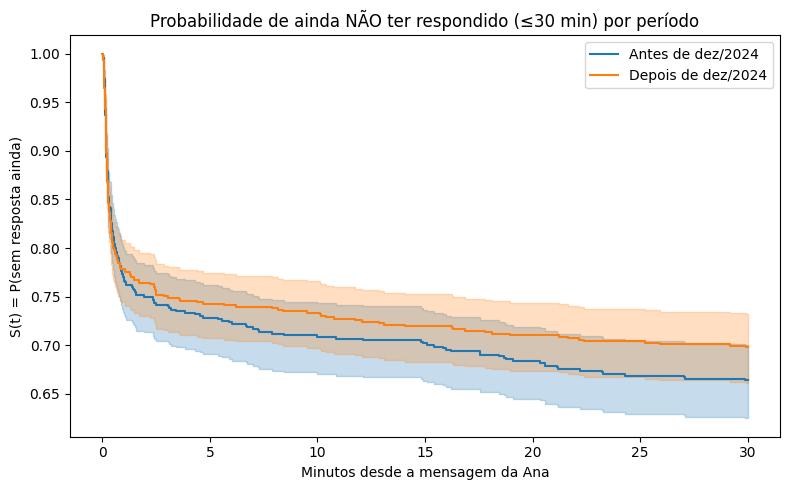

In [152]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

print("=== MODELO DE COX (EVENTO: RESPOSTA ≤ 30 min) ===")

# ------------------------------------------------------
# 1. Garantir colunas necessárias no bursts
# ------------------------------------------------------

bursts = bursts.copy()
bursts["burst_time"] = pd.to_datetime(bursts["burst_time"])

# resposta rápida (evento)
if "responded_30min" not in bursts.columns:
    bursts["responded_30min"] = (bursts["reply_minutes"] <= 30).astype(int)

# tirar linhas sem reply_minutes (se existirem)
surv = bursts.dropna(subset=["reply_minutes"]).copy()

# ------------------------------------------------------
# 2. Construir variáveis de sobrevivência
# ------------------------------------------------------
# duration: tempo até resposta OU 30 min (se não respondeu rápido)
surv["duration"] = np.minimum(surv["reply_minutes"], 30.0)

# evento: 1 se respondeu em ≤ 30 min, 0 se não (censurado)
surv["event"] = surv["responded_30min"].astype(int)

# variável de período (efeito que queremos medir)
surv["period_after"] = (surv["burst_time"] >= pd.Timestamp("2024-12-01")).astype(int)

print("\nTamanho da base de sobrevivência:", surv.shape)
print("Taxa de evento (resposta ≤ 30 min):")
print(surv["event"].value_counts(normalize=True).rename("proportion"))

# ------------------------------------------------------
# 3. Criar covariáveis (textuais + temporais)
# ------------------------------------------------------

# msg_len e word_count
surv["msg_len"] = surv["message"].astype(str).str.len()
surv["word_count"] = surv["message"].astype(str).str.split().str.len()

# variáveis temporais
surv["hour"] = surv["burst_time"].dt.hour
surv["weekday"] = surv["burst_time"].dt.weekday

# binárias
surv["has_question"] = surv["message"].astype(str).str.contains(r"\?", regex=True).astype(int)
surv["is_minimal"] = (surv["msg_len"] <= 3).astype(int)

# padronizar as numéricas
from sklearn.preprocessing import StandardScaler

num_cols = ["msg_len", "word_count", "hour", "weekday"]
scaler = StandardScaler()
surv[["z_msg_len", "z_word_count", "z_hour", "z_weekday"]] = scaler.fit_transform(surv[num_cols])

# ------------------------------------------------------
# 4. Selecionar colunas para o Cox
# ------------------------------------------------------

cox_cols = [
    "duration",
    "event",
    "period_after",
    "z_msg_len",
    "z_word_count",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

cox_df = surv[cox_cols].copy()

print("\nShape do cox_df:", cox_df.shape)

# ------------------------------------------------------
# 5. Ajustar modelo de Cox
# ------------------------------------------------------

cph = CoxPHFitter()
cph.fit(cox_df, duration_col="duration", event_col="event")

print("\n=== RESUMO DO MODELO DE COX ===")
cph.print_summary()  # coef, exp(coef), p-valor etc.

# Hazard Ratios (exp(coef))
hr = np.exp(cph.params_)
print("\n=== Hazard Ratios (exp(coef)) ===")
print(hr)

# Interpretação:
# HR > 1  -> aumenta o risco de resposta rápida (reduz tempo esperado)
# HR < 1  -> reduz o risco de resposta rápida (torna resposta mais lenta)


# ------------------------------------------------------
# 6. (Opcional) Curvas de Kaplan–Meier por período
# ------------------------------------------------------

km = KaplanMeierFitter()

fig, ax = plt.subplots(figsize=(8, 5))

for label, mask in [("Antes de dez/2024", surv["period_after"] == 0),
                    ("Depois de dez/2024", surv["period_after"] == 1)]:
    km.fit(
        durations=surv.loc[mask, "duration"],
        event_observed=surv.loc[mask, "event"],
        label=label
    )
    km.plot_survival_function(ax=ax)

ax.set_title("Probabilidade de ainda NÃO ter respondido (≤30 min) por período")
ax.set_xlabel("Minutos desde a mensagem da Ana")
ax.set_ylabel("S(t) = P(sem resposta ainda)")
plt.tight_layout()
plt.show()

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss

from lifelines import KaplanMeierFitter, CoxPHFitter

# garante tipos corretos
bursts = bursts.copy()
bursts["burst_time"] = pd.to_datetime(bursts["burst_time"])
bursts["reply_time"] = pd.to_datetime(bursts["reply_time"])

# período antes/depois de dez/2024
cut_date = pd.Timestamp("2024-12-01")
bursts["period_after"] = (bursts["burst_time"] >= cut_date).astype(int)

# janelas de resposta já existem: responded_30min, 60, 120
# se quiser garantir:
bursts["responded_30min"] = bursts["responded_30min"].astype(int)
bursts["responded_60min"] = bursts["responded_60min"].astype(int)
bursts["responded_120min"] = bursts["responded_120min"].astype(int)

# features linguísticas básicas
bursts["msg_len"] = bursts["message"].astype(str).str.len()
bursts["word_count"] = bursts["message"].astype(str).str.split().str.len()
bursts["hour"] = bursts["burst_time"].dt.hour
bursts["weekday"] = bursts["burst_time"].dt.weekday
bursts["has_question"] = bursts["message"].astype(str).str.contains(r"\?", regex=True).astype(int)
bursts["is_minimal"] = (bursts["msg_len"] <= 3).astype(int)

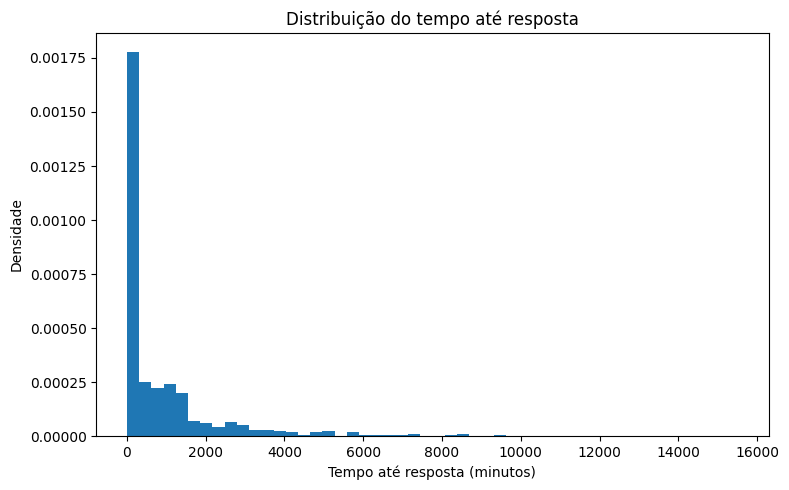

In [156]:
plt.figure(figsize=(8,5))
valid = bursts["reply_minutes"].dropna()
plt.hist(valid, bins=50, density=True)
plt.xlabel("Tempo até resposta (minutos)")
plt.ylabel("Densidade")
plt.title("Distribuição do tempo até resposta")
plt.tight_layout()
plt.savefig("fig_hist_reply_minutes.png", dpi=300)
plt.show()


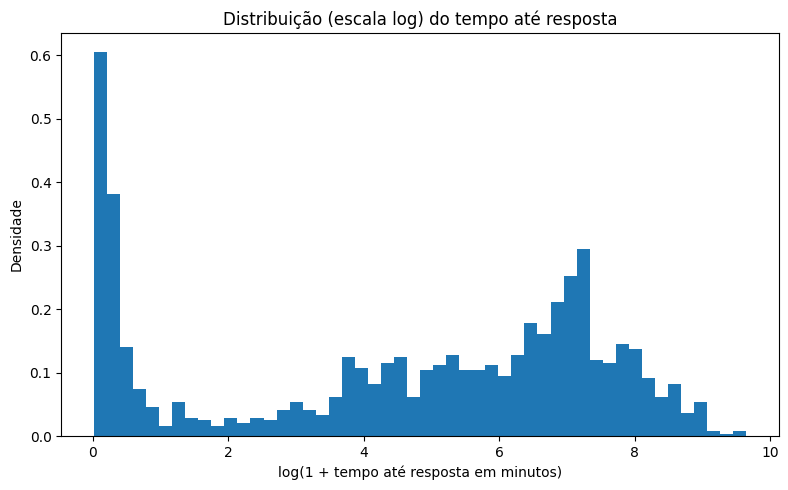

In [157]:
plt.figure(figsize=(8,5))
plt.hist(np.log1p(valid), bins=50, density=True)
plt.xlabel("log(1 + tempo até resposta em minutos)")
plt.ylabel("Densidade")
plt.title("Distribuição (escala log) do tempo até resposta")
plt.tight_layout()
plt.savefig("fig_hist_reply_minutes_log.png", dpi=300)
plt.show()

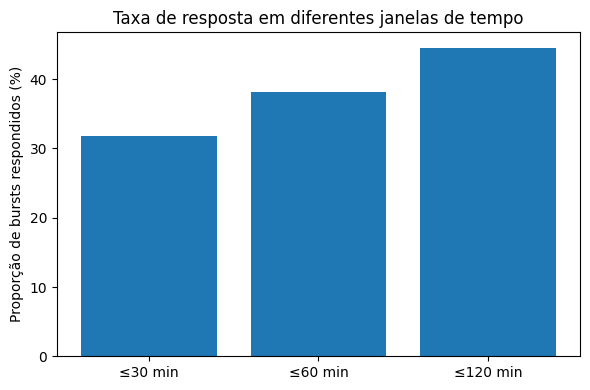

{'≤30 min': np.float64(0.3179282868525896),
 '≤60 min': np.float64(0.3816733067729084),
 '≤120 min': np.float64(0.4454183266932271)}

In [158]:
rates = {
    "≤30 min": bursts["responded_30min"].mean(),
    "≤60 min": bursts["responded_60min"].mean(),
    "≤120 min": bursts["responded_120min"].mean(),
}

labels = list(rates.keys())
values = [v*100 for v in rates.values()]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylabel("Proporção de bursts respondidos (%)")
plt.title("Taxa de resposta em diferentes janelas de tempo")
plt.tight_layout()
plt.savefig("fig_response_rates_cutoffs.png", dpi=300)
plt.show()

rates  # para você ver os números

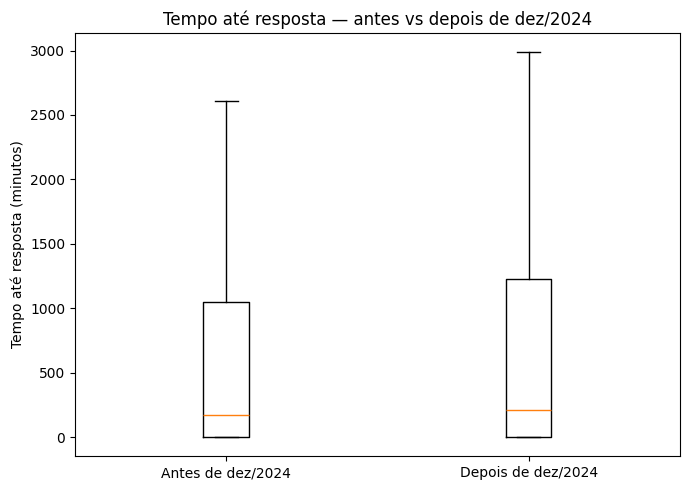

In [159]:
plt.figure(figsize=(7,5))
data_before = bursts.loc[bursts["period_after"] == 0, "reply_minutes"].dropna()
data_after  = bursts.loc[bursts["period_after"] == 1, "reply_minutes"].dropna()

plt.boxplot([data_before, data_after],
            labels=["Antes de dez/2024", "Depois de dez/2024"],
            showfliers=False)

plt.ylabel("Tempo até resposta (minutos)")
plt.title("Tempo até resposta — antes vs depois de dez/2024")
plt.tight_layout()
plt.savefig("fig_box_reply_before_after.png", dpi=300)
plt.show()

In [160]:
def run_ml_30min(df_subset, random_state=42):
    df = df_subset.dropna(subset=["reply_minutes"]).copy()

    feature_cols = ["msg_len", "word_count", "has_question", "is_minimal", "hour", "weekday"]
    X = df[feature_cols].values
    y = df["responded_30min"].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=random_state, stratify=y
    )

    # logística
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    p_log = log_reg.predict_proba(X_test)[:,1]
    auc_log = roc_auc_score(y_test, p_log)
    brier_log = brier_score_loss(y_test, p_log)

    # random forest
    rf = RandomForestClassifier(
        n_estimators=500,
        random_state=random_state,
        class_weight=None
    )
    rf.fit(X_train, y_train)
    p_rf = rf.predict_proba(X_test)[:,1]
    auc_rf = roc_auc_score(y_test, p_rf)
    brier_rf = brier_score_loss(y_test, p_rf)

    return {
        "log_reg": {
            "model": log_reg,
            "auc": auc_log,
            "brier": brier_log,
            "coef": pd.Series(log_reg.coef_[0], index=feature_cols),
        },
        "rf": {
            "model": rf,
            "auc": auc_rf,
            "brier": brier_rf,
            "importance": pd.Series(rf.feature_importances_, index=feature_cols),
        }
    }

In [161]:
results_before = run_ml_30min(bursts[bursts["period_after"] == 0])
results_after  = run_ml_30min(bursts[bursts["period_after"] == 1])

results_before["log_reg"]["auc"], results_after["log_reg"]["auc"]

(0.6747053244817776, 0.6078639082751744)

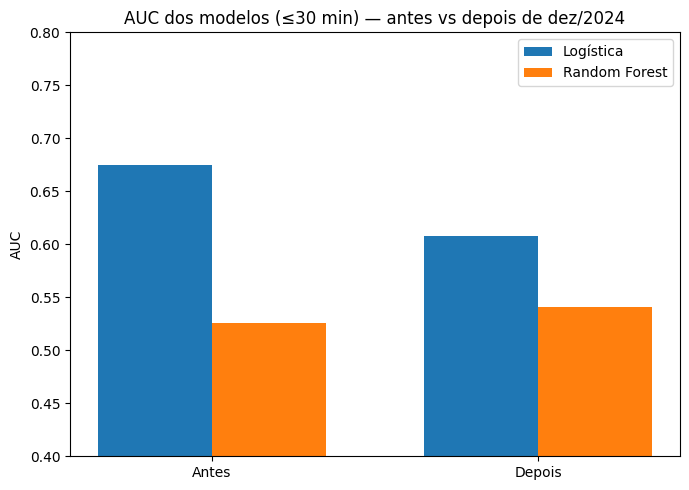

In [162]:
labels = ["Antes", "Depois"]
auc_log = [results_before["log_reg"]["auc"], results_after["log_reg"]["auc"]]
auc_rf  = [results_before["rf"]["auc"], results_after["rf"]["auc"]]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, auc_log, width, label="Logística")
plt.bar(x + width/2, auc_rf,  width, label="Random Forest")

plt.xticks(x, labels)
plt.ylim(0.4, 0.8)
plt.ylabel("AUC")
plt.title("AUC dos modelos (≤30 min) — antes vs depois de dez/2024")
plt.legend()
plt.tight_layout()
plt.savefig("fig_auc_before_after_30min.png", dpi=300)
plt.show()

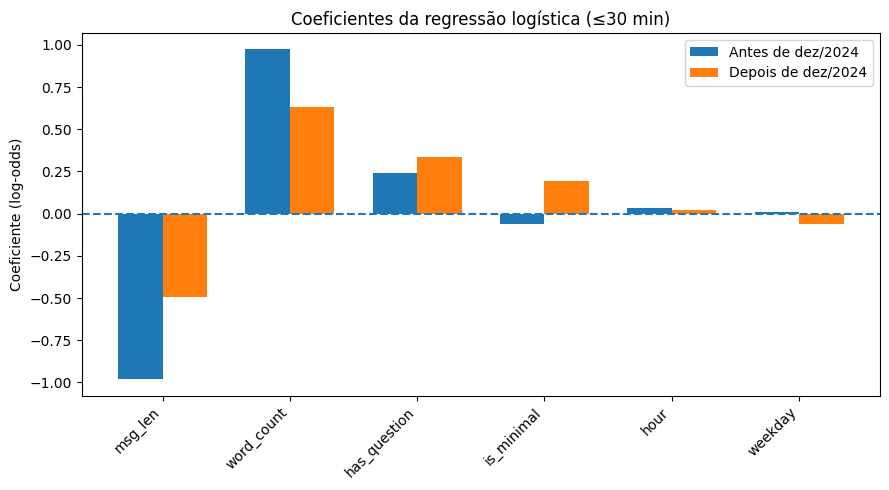

In [163]:
coef_before = results_before["log_reg"]["coef"]
coef_after  = results_after["log_reg"]["coef"]

features = coef_before.index
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(9,5))
plt.bar(x - width/2, coef_before.values, width, label="Antes de dez/2024")
plt.bar(x + width/2, coef_after.values,  width, label="Depois de dez/2024")

plt.xticks(x, features, rotation=45, ha="right")
plt.axhline(0, linestyle="--")
plt.ylabel("Coeficiente (log-odds)")
plt.title("Coeficientes da regressão logística (≤30 min)")
plt.legend()
plt.tight_layout()
plt.savefig("fig_logreg_coefs_before_after.png", dpi=300)
plt.show()

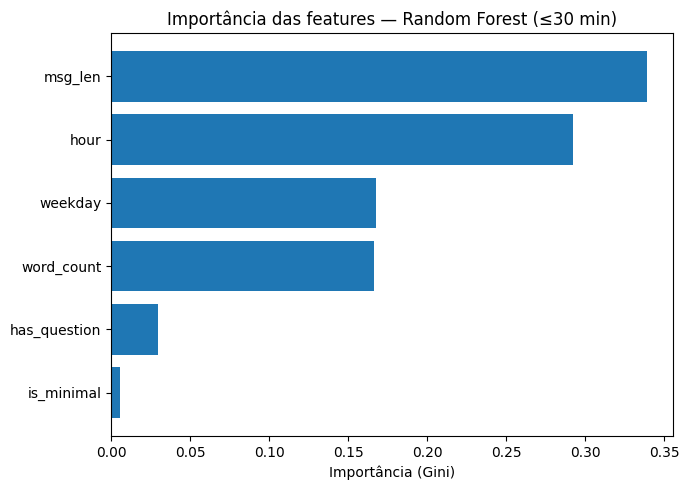

In [164]:
# treinar um RF único com todas as observações
res_global = run_ml_30min(bursts)
imp = res_global["rf"]["importance"].sort_values(ascending=True)

plt.figure(figsize=(7,5))
plt.barh(imp.index, imp.values)
plt.xlabel("Importância (Gini)")
plt.title("Importância das features — Random Forest (≤30 min)")
plt.tight_layout()
plt.savefig("fig_rf_importances_30min.png", dpi=300)
plt.show()

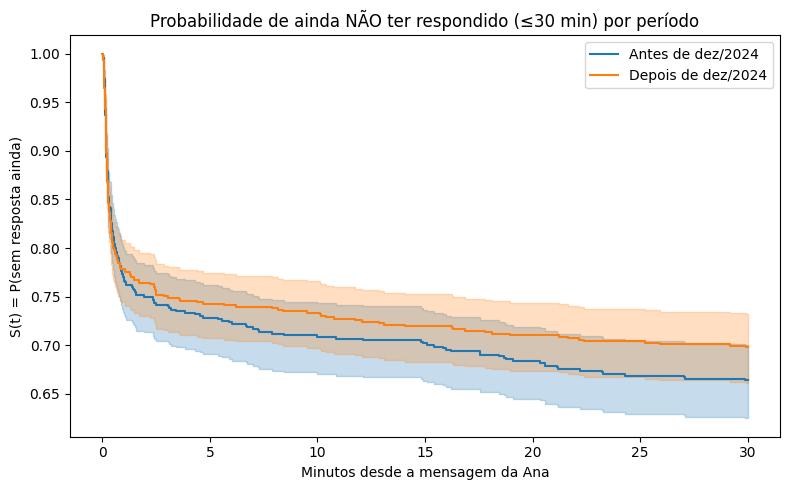

In [165]:
surv = bursts.dropna(subset=["reply_minutes"]).copy()
surv["duration"] = np.minimum(surv["reply_minutes"], 30.0)
surv["event"] = surv["responded_30min"].astype(int)

km = KaplanMeierFitter()

plt.figure(figsize=(8,5))

for label, mask in [("Antes de dez/2024", surv["period_after"] == 0),
                    ("Depois de dez/2024", surv["period_after"] == 1)]:
    km.fit(
        durations=surv.loc[mask, "duration"],
        event_observed=surv.loc[mask, "event"],
        label=label
    )
    km.plot_survival_function()

plt.title("Probabilidade de ainda NÃO ter respondido (≤30 min) por período")
plt.xlabel("Minutos desde a mensagem da Ana")
plt.ylabel("S(t) = P(sem resposta ainda)")
plt.tight_layout()
plt.savefig("fig_km_before_after_30min.png", dpi=300)
plt.show()

In [166]:
# preparar dados para Cox
surv["msg_len"] = surv["message"].astype(str).str.len()
surv["word_count"] = surv["message"].astype(str).str.split().str.len()
surv["hour"] = surv["burst_time"].dt.hour
surv["weekday"] = surv["burst_time"].dt.weekday
surv["has_question"] = surv["message"].astype(str).str.contains(r"\?", regex=True).astype(int)
surv["is_minimal"] = (surv["msg_len"] <= 3).astype(int)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
surv[["z_msg_len", "z_word_count", "z_hour", "z_weekday"]] = scaler.fit_transform(
    surv[["msg_len", "word_count", "hour", "weekday"]]
)

cox_cols = [
    "duration",
    "event",
    "period_after",
    "z_msg_len",
    "z_word_count",
    "has_question",
    "is_minimal",
    "z_hour",
    "z_weekday",
]

cox_df = surv[cox_cols].copy()

cph = CoxPHFitter()
cph.fit(cox_df, duration_col="duration", event_col="event")
cph.print_summary()

# hazard ratios
hr = np.exp(cph.params_)
hr

<lifelines.CoxPHFitter: fitted with 1253 total observations, 854 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1253
number of events observed = 399
   partial log-likelihood = -2749.80
         time fit was run = 2025-11-18 13:12:19 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
period_after -0.19      0.83      0.10           -0.39            0.01                0.68                1.01
z_msg_len    -1.39      0.25      0.45           -2.27           -0.51                0.10                0.60
z_word_count  1.28      3.61      0.40            0.49            2.08                1.63                7.98
has_question  0.61      1.84      0.11            0.40            0.82                1.49                2.27
is_minimal    0.08      1.08      0.26           -0.43            0.58                0.65                1.79
z_hour        0.06      1.06      0.05           -0.04            0.16                0.96                1.17
z_weekday    -0.04      0.96      0.05           -0.13            0.06                0.87                1.06

              cmp to     z      p  -log2(p)
covariate                                  
period_after    0.00 -1.83   0.07      3.90
z_msg_len       0.00 -3.10 <0.005      9.01
z_word_count    0.00  3.17 <0.005      9.35
has_question    0.00  5.71 <0.005     26.36
is_minimal      0.00  0.30   0.77      0.39
z_hour          0.00  1.10   0.27      1.89
z_weekday       0.00 -0.73   0.46      1.11
---
Concordance = 0.61
Partial AIC = 5513.59
log-likelihood ratio test = 49.95 on 7 df
-log2(p) of ll-ratio test = 26.01

covariate
period_after    0.830150
z_msg_len       0.248727
z_word_count    3.607294
has_question    1.841733
is_minimal      1.079659
z_hour          1.058303
z_weekday       0.964169
Name: coef, dtype: float64

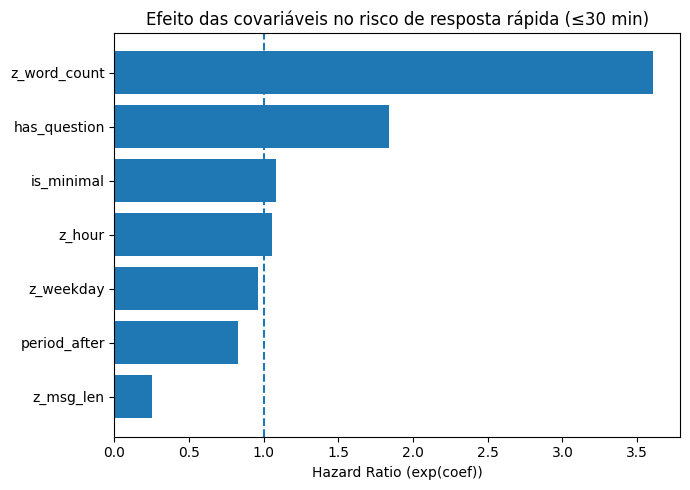

In [167]:
hr_sorted = hr.sort_values()
plt.figure(figsize=(7,5))
plt.barh(hr_sorted.index, hr_sorted.values)
plt.axvline(1.0, linestyle="--")
plt.xlabel("Hazard Ratio (exp(coef))")
plt.title("Efeito das covariáveis no risco de resposta rápida (≤30 min)")
plt.tight_layout()
plt.savefig("fig_cox_hazard_ratios.png", dpi=300)
plt.show()

In [168]:
import os
os.listdir("/mnt/data")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data'

In [169]:
import os

# lista tudo no diretório onde o notebook está
os.listdir(".")

['fig_logreg_coefs_before_after.png',
 'fig_rf_importances_30min.png',
 'fig_response_rates_cutoffs.png',
 'fig_hist_reply_minutes.png',
 'fig_box_reply_before_after.png',
 'fig_auc_before_after_30min.png',
 'fig_km_before_after_30min.png',
 '.ipynb_checkpoints',
 'fig_cox_hazard_ratios.png',
 'analise_conversas.ipynb',
 'fig_hist_reply_minutes_log.png']